In [739]:
import os
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import pearsonr
from flexitext import flexitext
import matplotlib.pyplot as plt
import statsmodels.api as sm


- Maybe sub-group affect data does forecast, but not neuro data. 
- Add total to aggregate heatmap.


# Homemade functions

In [740]:
def get_trailer_peak(timecourse, max_min):

    # Get the maximum peak of the timecourse.
    if(max_min == 'max'):
        peak_id = np.argmax(timecourse)
    elif(max_min == 'min'):
        peak_id = np.argmin(timecourse)
    else: 
        print("Incorrect max_min value. Please use 'max' or 'min'.")

    # Check if the peak is the first or last timepoint.
    # For the peak, I am getting the average for all time points 
    # one TR before and after the peak.
    if(peak_id == 0):
        peak = np.mean(timecourse[peak_id:peak_id+1])
    elif(peak_id == len(timecourse)-1):
        peak = np.mean(timecourse[peak_id-1:peak_id])
    else:
        peak = np.mean(timecourse[peak_id-1:peak_id+1])
    
    return peak, peak_id

In [741]:

def plot_correlations_bothTrailers(dataset_df, type, comedy_corr, horror_corr, title):
    
    # Define ROI labels. 
    NAcc_label = "NAcc_" + type
    AIns_label = "AIns_" + type
    MPFC_label = "MPFC_" + type

    whole_both_trailers_plot = sns.pairplot(
        dataset_df,
        kind="reg",
        x_vars=[NAcc_label, AIns_label, MPFC_label],
        y_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"], 
        hue="Type",
        palette="viridis", 
        #scatter_kws = {"s":3} try to change the size of the dots
        height=5,
        aspect=1.2)
    
    whole_both_trailers_plot.fig.suptitle(title, y=1.03, fontsize=20, fontweight ="bold")
    plt.rc('legend', fontsize=25, title_fontsize=28, markerscale=2)

    # Add annotations to the first plot. 
    comedy_cor_string = "C r= " + str(round(comedy_corr[0][0], 4)) + "; p-value: " + str(round(comedy_corr[0][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[0][0], 4)) + "; p-value: " + str(round(horror_corr[0][1], 5))
    whole_both_trailers_plot.axes[0, 0].text(s=horror_cor_string, x=.07, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[0, 0].text(s=comedy_cor_string, x=.07, y=-2.3, fontsize=12)

    # Add annotations to the second plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[1][0], 4)) + "; p-value: " + str(round(comedy_corr[1][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[1][0], 4)) + "; p-value: " + str(round(horror_corr[1][1], 5))
    whole_both_trailers_plot.axes[1, 0].text(s=horror_cor_string, x=.07, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[1, 0].text(s=comedy_cor_string, x=.07, y=-2.3, fontsize=12)

    # Add annotations to the third plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[3][0], 4)) + "; p-value: " + str(round(comedy_corr[3][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[3][0], 4)) + "; p-value: " + str(round(horror_corr[3][1], 5))
    whole_both_trailers_plot.axes[0, 1].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[0, 1].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)

    # Add annotations to the fourth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[4][0], 4)) + "; p-value: " + str(round(comedy_corr[4][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[4][0], 4)) + "; p-value: " + str(round(horror_corr[4][1], 5))
    whole_both_trailers_plot.axes[1, 1].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[1, 1].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)

    # Add annotations to the fifth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[6][0], 4)) + "; p-value: " + str(round(comedy_corr[6][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[6][0], 4)) + "; p-value: " + str(round(horror_corr[6][1], 5))
    whole_both_trailers_plot.axes[0, 2].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[0, 2].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)

    # Add annotations to the sixth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[7][0], 4)) + "; p-value: " + str(round(comedy_corr[7][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[7][0], 4)) + "; p-value: " + str(round(horror_corr[7][1], 5))
    whole_both_trailers_plot.axes[1, 2].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[1, 2].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)



In [742]:

def plot_correlations3_bothTrailers(dataset_df, type, comedy_corr, horror_corr, title):
    
    # Define ROI labels. 
    NAcc_label = "NAcc_" + type
    AIns_label = "AIns_" + type
    MPFC_label = "MPFC_" + type

    whole_both_trailers_plot = sns.pairplot(
        dataset_df,
        kind="reg",
        x_vars=[NAcc_label, AIns_label, MPFC_label],
        y_vars=["Pos_arousal_scaled", "Neg_arousal_scaled", "W_score_scaled"], 
        hue="Type",
        palette="viridis", 
        #scatter_kws = {"s":3} try to change the size of the dots
        height=5,
        aspect=1.2)
    
    whole_both_trailers_plot.fig.suptitle(title, y=1.03, fontsize=20, fontweight ="bold")
    plt.rc('legend', fontsize=25, title_fontsize=28, markerscale=2)

    # Calculate coordinates for plotting. 
    NAcc_x_coord = np.mean(dataset_df[NAcc_label].max() + np.abs(dataset_df[NAcc_label].min())) * -0.15
    AIns_x_coord = np.mean(dataset_df[AIns_label].max() + np.abs(dataset_df[AIns_label].min())) * -0.15
    MPFC_x_coord = np.mean(dataset_df[MPFC_label].max() + np.abs(dataset_df[MPFC_label].min())) * -0.15

    PA_y_coord = (dataset_df["Pos_arousal_scaled"].max() - dataset_df["Pos_arousal_scaled"].min()) * -0.35 
    NA_y_coord = (dataset_df["Neg_arousal_scaled"].max() - dataset_df["Neg_arousal_scaled"].min()) * -0.4 
    W_y_coord = (dataset_df["W_score_scaled"].max() - dataset_df["W_score_scaled"].min()) * -0.45

    # Add annotations to the first plot (NAcc-Pos_arousal_scaled). 
    comedy_cor_string = "C r= " + str(round(comedy_corr[0][0], 4)) + "; p-value: " + str(round(comedy_corr[0][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[0][0], 4)) + "; p-value: " + str(round(horror_corr[0][1], 5))
    whole_both_trailers_plot.axes[0, 0].text(s=horror_cor_string, x=NAcc_x_coord, y=PA_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 0].text(s=comedy_cor_string, x=NAcc_x_coord, y=PA_y_coord-0.1, fontsize=12,  weight='bold')
    whole_both_trailers_plot.axes[0, 0].set_ylabel('Positive arousal', fontsize = 12, weight='bold')

    # Add annotations to the second plot (NAcc-Neg_arousal_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[1][0], 4)) + "; p-value: " + str(round(comedy_corr[1][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[1][0], 4)) + "; p-value: " + str(round(horror_corr[1][1], 5))
    whole_both_trailers_plot.axes[1, 0].text(s=horror_cor_string, x=NAcc_x_coord, y=NA_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 0].text(s=comedy_cor_string, x=NAcc_x_coord, y=NA_y_coord-0.1, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 0].set_ylabel('Negative arousal', fontsize = 12, weight='bold')

    # Add annotations to the third plot (NAcc-W_score_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[2][0], 4)) + "; p-value: " + str(round(comedy_corr[2][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[2][0], 4)) + "; p-value: " + str(round(horror_corr[2][1], 5))
    whole_both_trailers_plot.axes[2, 0].text(s=horror_cor_string, x=NAcc_x_coord, y=W_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[2, 0].text(s=comedy_cor_string, x=NAcc_x_coord, y=W_y_coord-0.2, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[2, 0].set_xlabel('NAcc ' + type, fontsize = 12, weight='bold')
    whole_both_trailers_plot.axes[2, 0].set_ylabel('Watch scores', fontsize = 12, weight='bold')

    # Add annotations to the fourth plot (AIns-Pos_arousal_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[3][0], 4)) + "; p-value: " + str(round(comedy_corr[3][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[3][0], 4)) + "; p-value: " + str(round(horror_corr[3][1], 5))
    whole_both_trailers_plot.axes[0, 1].text(s=horror_cor_string, x=AIns_x_coord, y=PA_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 1].text(s=comedy_cor_string, x=AIns_x_coord, y=PA_y_coord-0.1, fontsize=12, weight='bold')

    # Add annotations to the fifth plot (AIns-Neg_arousal_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[4][0], 4)) + "; p-value: " + str(round(comedy_corr[4][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[4][0], 4)) + "; p-value: " + str(round(horror_corr[4][1], 5))
    whole_both_trailers_plot.axes[1, 1].text(s=horror_cor_string, x=AIns_x_coord, y=NA_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 1].text(s=comedy_cor_string, x=AIns_x_coord, y=NA_y_coord-0.1, fontsize=12, weight='bold')

    # Add annotations to the sixth plot (AIns-W_score_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[5][0], 4)) + "; p-value: " + str(round(comedy_corr[5][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[5][0], 4)) + "; p-value: " + str(round(horror_corr[5][1], 5))
    whole_both_trailers_plot.axes[2, 1].text(s=horror_cor_string, x=AIns_x_coord, y=W_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[2, 1].text(s=comedy_cor_string, x=AIns_x_coord, y=W_y_coord-0.2, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[2, 1].set_xlabel('AIns ' + type, fontsize = 12, weight='bold')

    # Add annotations to the seventh plot (MPFC-Pos_arousal_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[6][0], 4)) + "; p-value: " + str(round(comedy_corr[6][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[6][0], 4)) + "; p-value: " + str(round(horror_corr[6][1], 5))
    whole_both_trailers_plot.axes[0, 2].text(s=horror_cor_string, x=MPFC_x_coord, y=PA_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 2].text(s=comedy_cor_string, x=MPFC_x_coord, y=PA_y_coord-0.1, fontsize=12, weight='bold')

    # Add annotations to the eighth plot (MPFC-Neg_arousal_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[7][0], 4)) + "; p-value: " + str(round(comedy_corr[7][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[7][0], 4)) + "; p-value: " + str(round(horror_corr[7][1], 5))
    whole_both_trailers_plot.axes[1, 2].text(s=horror_cor_string, x=MPFC_x_coord, y=NA_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 2].text(s=comedy_cor_string, x=MPFC_x_coord, y=NA_y_coord-0.1, fontsize=12, weight='bold')

    # Add annotations to the ninth plot (MPFC-W_score_scaled).
    comedy_cor_string = "C r= " + str(round(comedy_corr[8][0], 4)) + "; p-value: " + str(round(comedy_corr[8][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[8][0], 4)) + "; p-value: " + str(round(horror_corr[8][1], 5))
    whole_both_trailers_plot.axes[2, 2].text(s=horror_cor_string, x=MPFC_x_coord, y=W_y_coord, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[2, 2].text(s=comedy_cor_string, x=MPFC_x_coord, y=W_y_coord-0.2, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[2, 2].set_xlabel('MPFC ' + type, fontsize = 12, weight='bold')


    # Path to save the plot.
    save_path = "/Users/luisalvarez/Documents/GitHub/RM_Thesis_Neuroforecasting/Figures/IndividualChoice/Correlations_" + type 
    whole_both_trailers_plot.savefig(save_path + ".png", dpi=300, bbox_inches="tight")



In [743]:
# Fuction to create scatter plots with corr.
def plot_correlations(data_df, correlations_list, type_of_signal, title_fig):

    fig, ax = plt.subplots(3, 3, figsize=(30, 30))

    NAcc_label = "NAcc_" + type_of_signal 
    AIns_label = "AIns_" + type_of_signal
    MPFC_label = "MPFC_" + type_of_signal

    # NAcc and positive arousal
    Nacc_pa_plot = sns.regplot(data=data_df, x=NAcc_label, y="Pos_arousal_scaled", ax=ax[0, 0])
    title1 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Positive arousal</>" 
    flexitext(0.2, 1.035, title1, va="top", ax=ax[0, 0])
    r_value1 = "<weight:bold, size:15>r=" + str(round(correlations_list[0][0], 5)) + "; p-value: "+ str(round(correlations_list[0][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value1, ha="center", ax=ax[0, 0])

    # NAcc and negative arousal
    NAcc_na_plot = sns.regplot(data=data_df, x=NAcc_label, y="Neg_arousal_scaled", ax=ax[1, 0])
    title2 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Negative arousal</>"
    flexitext(0.2, 1.035, title2, va="top", ax=ax[1, 0])
    r_value2 = "<weight:bold, size:15>r=" + str(round(correlations_list[1][0], 5)) + "; p-value: "+ str(round(correlations_list[1][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value2, ha="center", ax=ax[1, 0])

    # NAcc and watch score
    NAcc_wa_plot = sns.regplot(data=data_df, x=NAcc_label, y="W_score_scaled", ax=ax[2, 0])
    title3 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Watch score</>"
    flexitext(0.2, 1.035, title3, va="top", ax=ax[2, 0])
    r_value3 = "<weight:bold, size:15>r=" + str(round(correlations_list[2][0], 5)) + "; p-value: "+ str(round(correlations_list[2][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value3, ha="center", ax=ax[2, 0])

    # AIns and positive arousal
    AIns_pa_plot = sns.regplot(data=data_df, x=AIns_label, y="Pos_arousal_scaled", ax=ax[0, 1], color="red")
    title4 = "<size:15>Corr <color:red>AIns</> and Positive arousal</>"
    flexitext(0.2, 1.035, title4, va="top", ax=ax[0, 1])
    r_value4 = "<weight:bold, size:15>r=" + str(round(correlations_list[3][0], 5)) + "; p-value: "+str(round(correlations_list[3][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value4, ha="center", ax=ax[0, 1])

    # AIns and negative arousal
    AIns_na_plot = sns.regplot(data=data_df, x=AIns_label, y="Neg_arousal_scaled", ax=ax[1, 1], color="red")
    title5 = "<size:15>Corr <color:red>AIns</> and Negative arousal</>"
    flexitext(0.2, 1.035, title5, va="top", ax=ax[1, 1])
    r_value5 = "<weight:bold, size:15>r=" + str(round(correlations_list[4][0], 5)) + "; p-value: "+str(round(correlations_list[4][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value5, ha="center", ax=ax[1, 1])

    # AIns and watch score
    AIns_wa_plot = sns.regplot(data=data_df, x=AIns_label, y="W_score_scaled", ax=ax[2, 1], color="red")
    title6 = "<size:15>Corr <color:red>AIns</> and Watch score</>"
    flexitext(0.2, 1.035, title6, va="top", ax=ax[2, 1])
    r_value6 = "<weight:bold, size:15>r=" + str(round(correlations_list[5][0], 5)) + "; p-value: "+str(round(correlations_list[5][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value6, ha="center", ax=ax[2, 1])

    # MPFC and positive arousal
    MPFC_pa_plot = sns.regplot(data=data_df, x=MPFC_label, y="Pos_arousal_scaled", ax=ax[0, 2], color="green")
    title7 = "<size:15>Corr <color:green>MPFC</> and Positive arousal</>"
    flexitext(0.2, 1.035, title7, va="top", ax=ax[0, 2])
    r_value7 = "<weight:bold, size:15>r=" + str(round(correlations_list[6][0], 5)) + "; p-value: "+str(round(correlations_list[6][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value7, ha="center", ax=ax[0, 2])

    # MPFC and negative arousal
    MPFC_na_plot = sns.regplot(data=data_df, x=MPFC_label, y="Neg_arousal_scaled", ax=ax[1, 2], color="green")
    title8 = "<size:15>Corr <color:green>MPFC</> and Negative arousal</>"
    flexitext(0.2, 1.035, title8, va="top", ax=ax[1, 2])   
    r_value8 = "<weight:bold, size:15>r=" + str(round(correlations_list[7][0], 5)) + "; p-value: "+str(round(correlations_list[7][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value8, ha="center", ax=ax[1, 2])
    
    # MPFC and watch score
    MPFC_wa_plot = sns.regplot(data=data_df, x=MPFC_label, y="W_score_scaled", ax=ax[2, 2], color="green")
    title9 = "<size:15>Corr <color:green>MPFC</> and Watch score</>"
    flexitext(0.2, 1.035, title9, va="top", ax=ax[2, 2])
    r_value9 = "<weight:bold, size:15>r=" + str(round(correlations_list[8][0], 5)) + "; p-value: "+str(round(correlations_list[8][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value9, ha="center", ax=ax[2, 2])

    # Set the title of the figure
    #fig.suptitle(title_fig, fontsize=20, fontweight ="bold")
    fig_title = "<weight:bold, size:20>" + title_fig + "</>"
    flexitext(0.5, 1.1, fig_title, ha="center", va="top", ax=ax[0, 1])

    plt.show()

In [744]:
# Fuction to create scatter plots with corr.
def plot_correlations_2trailers(data_df, correlations_list, type_of_signal, title_fig):

    fig, ax = plt.subplots(3, 3, figsize=(30, 30))

    NAcc_label = "NAcc_" + type_of_signal 
    AIns_label = "AIns_" + type_of_signal
    MPFC_label = "MPFC_" + type_of_signal

    # NAcc and positive arousal
    Nacc_pa_plot = sns.relplot(data=data_df, x=NAcc_label, y="Pos_arousal_scaled", hue="Type", ax=ax[0, 0])
    title1 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Positive arousal</>" 
    flexitext(0.2, 1.035, title1, va="top", ax=ax[0, 0])
    r_value1 = "<weight:bold, size:15>r=" + str(round(correlations_list[0][0], 5)) + "; p-value: "+ str(round(correlations_list[0][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value1, ha="center", ax=ax[0, 0])

    # NAcc and negative arousal
    NAcc_na_plot = sns.regplot(data=data_df, x=NAcc_label, y="Neg_arousal_scaled", ax=ax[1, 0])
    title2 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Negative arousal</>"
    flexitext(0.2, 1.035, title2, va="top", ax=ax[1, 0])
    r_value2 = "<weight:bold, size:15>r=" + str(round(correlations_list[1][0], 5)) + "; p-value: "+ str(round(correlations_list[1][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value2, ha="center", ax=ax[1, 0])

    # NAcc and watch score
    NAcc_wa_plot = sns.regplot(data=data_df, x=NAcc_label, y="W_score_scaled", ax=ax[2, 0])
    title3 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Watch score</>"
    flexitext(0.2, 1.035, title3, va="top", ax=ax[2, 0])
    r_value3 = "<weight:bold, size:15>r=" + str(round(correlations_list[2][0], 5)) + "; p-value: "+ str(round(correlations_list[2][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value3, ha="center", ax=ax[2, 0])

    # AIns and positive arousal
    AIns_pa_plot = sns.regplot(data=data_df, x=AIns_label, y="Pos_arousal_scaled", ax=ax[0, 1], color="red")
    title4 = "<size:15>Corr <color:red>AIns</> and Positive arousal</>"
    flexitext(0.2, 1.035, title4, va="top", ax=ax[0, 1])
    r_value4 = "<weight:bold, size:15>r=" + str(round(correlations_list[3][0], 5)) + "; p-value: "+str(round(correlations_list[3][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value4, ha="center", ax=ax[0, 1])

    # AIns and negative arousal
    AIns_na_plot = sns.regplot(data=data_df, x=AIns_label, y="Neg_arousal_scaled", ax=ax[1, 1], color="red")
    title5 = "<size:15>Corr <color:red>AIns</> and Negative arousal</>"
    flexitext(0.2, 1.035, title5, va="top", ax=ax[1, 1])
    r_value5 = "<weight:bold, size:15>r=" + str(round(correlations_list[4][0], 5)) + "; p-value: "+str(round(correlations_list[4][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value5, ha="center", ax=ax[1, 1])

    # AIns and watch score
    AIns_wa_plot = sns.regplot(data=data_df, x=AIns_label, y="W_score_scaled", ax=ax[2, 1], color="red")
    title6 = "<size:15>Corr <color:red>AIns</> and Watch score</>"
    flexitext(0.2, 1.035, title6, va="top", ax=ax[2, 1])
    r_value6 = "<weight:bold, size:15>r=" + str(round(correlations_list[5][0], 5)) + "; p-value: "+str(round(correlations_list[5][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value6, ha="center", ax=ax[2, 1])

    # MPFC and positive arousal
    MPFC_pa_plot = sns.regplot(data=data_df, x=MPFC_label, y="Pos_arousal_scaled", ax=ax[0, 2], color="green")
    title7 = "<size:15>Corr <color:green>MPFC</> and Positive arousal</>"
    flexitext(0.2, 1.035, title7, va="top", ax=ax[0, 2])
    r_value7 = "<weight:bold, size:15>r=" + str(round(correlations_list[6][0], 5)) + "; p-value: "+str(round(correlations_list[6][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value7, ha="center", ax=ax[0, 2])

    # MPFC and negative arousal
    MPFC_na_plot = sns.regplot(data=data_df, x=MPFC_label, y="Neg_arousal_scaled", ax=ax[1, 2], color="green")
    title8 = "<size:15>Corr <color:green>MPFC</> and Negative arousal</>"
    flexitext(0.2, 1.035, title8, va="top", ax=ax[1, 2])   
    r_value8 = "<weight:bold, size:15>r=" + str(round(correlations_list[7][0], 5)) + "; p-value: "+str(round(correlations_list[7][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value8, ha="center", ax=ax[1, 2])
    
    # MPFC and watch score
    MPFC_wa_plot = sns.regplot(data=data_df, x=MPFC_label, y="W_score_scaled", ax=ax[2, 2], color="green", logistic=True)
    title9 = "<size:15>Corr <color:green>MPFC</> and Watch score</>"
    flexitext(0.2, 1.035, title9, va="top", ax=ax[2, 2])
    r_value9 = "<weight:bold, size:15>r=" + str(round(correlations_list[8][0], 5)) + "; p-value: "+str(round(correlations_list[8][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value9, ha="center", ax=ax[2, 2])

    # Set the title of the figure
    #fig.suptitle(title_fig, fontsize=20, fontweight ="bold")
    fig_title = "<weight:bold, size:20>" + title_fig + "</>"
    flexitext(0.5, 1.1, fig_title, ha="center", va="top", ax=ax[0, 1])

    plt.show()

In [745]:
def compute_and_plot_corrs(dataframe, signal, title):

    NAcc_key = "NAcc_" + signal
    AIns_key = "AIns_" + signal
    MPFC_key = "MPFC_" + signal

    PA_key = "Pos_arousal_scaled" 
    NA_key = "Neg_arousal_scaled" 
    W_key = "W_score_scaled" 

    #Compute PA correlations
    NAcc_PA_corr = pearsonr(dataframe[NAcc_key], dataframe[PA_key])
    AIns_PA_corr = pearsonr(dataframe[AIns_key], dataframe[PA_key])
    MPFC_PA_corr = pearsonr(dataframe[MPFC_key], dataframe[PA_key])

    #Compute NA correlations
    NAcc_NA_corr = pearsonr(dataframe[NAcc_key], dataframe[NA_key])
    AIns_NA_corr = pearsonr(dataframe[AIns_key], dataframe[NA_key])
    MPFC_NA_corr = pearsonr(dataframe[MPFC_key], dataframe[NA_key])

    #Compute W correlations
    NAcc_W_corr = pearsonr(dataframe[NAcc_key], dataframe[W_key])
    AIns_W_corr = pearsonr(dataframe[AIns_key], dataframe[W_key])
    MPFC_W_corr = pearsonr(dataframe[MPFC_key], dataframe[W_key])

    #Create a list with all the correlations
    corrs = [NAcc_PA_corr, NAcc_NA_corr, NAcc_W_corr, AIns_PA_corr, AIns_NA_corr, AIns_W_corr, MPFC_PA_corr, MPFC_NA_corr, MPFC_W_corr]

    # Print the correlations results.
    print("The correlation between " + str(NAcc_key) + " activation and positive arousal is: " + str(round(NAcc_PA_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and positive arousal is: " + str(round(AIns_PA_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and positive arousal is: " + str(round(MPFC_PA_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and negative arousal is: " + str(round(NAcc_NA_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and negative arousal is: " + str(round(AIns_NA_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and negative arousal is: " + str(round(MPFC_NA_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and watch scores is: " + str(round(NAcc_W_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and watch scores is: " + str(round(AIns_W_corr[0], 5)) + " with a p-value of: " + str((AIns_W_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and watch scores is: " + str(round(MPFC_W_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_corr[1])))

    plot_correlations(dataframe, corrs, signal, title)

In [746]:
def compute_and_plot_both_corrs(dataframe_main, dataframe_C, dataframe_H, signal, title):

    NAcc_key = "NAcc_" + signal
    AIns_key = "AIns_" + signal
    MPFC_key = "MPFC_" + signal

    PA_key = "Pos_arousal_scaled" 
    NA_key = "Neg_arousal_scaled" 
    W_key = "W_score_scaled" 

    # Compute PA correlations for Comedy trailers.
    NAcc_PA_comedy_corr = pearsonr(dataframe_C[NAcc_key], dataframe_C[PA_key])
    AIns_PA_comedy_corr = pearsonr(dataframe_C[AIns_key], dataframe_C[PA_key])
    MPFC_PA_comedy_corr = pearsonr(dataframe_C[MPFC_key], dataframe_C[PA_key])

    # Compute PA correlations for Horror trailers.
    NAcc_PA_horror_corr = pearsonr(dataframe_H[NAcc_key], dataframe_H[PA_key])
    AIns_PA_horror_corr = pearsonr(dataframe_H[AIns_key], dataframe_H[PA_key])
    MPFC_PA_horror_corr = pearsonr(dataframe_H[MPFC_key], dataframe_H[PA_key])

    # Compute NA correlations for Comedy trailers.
    NAcc_NA_comedy_corr = pearsonr(dataframe_C[NAcc_key], dataframe_C[NA_key])
    AIns_NA_comedy_corr = pearsonr(dataframe_C[AIns_key], dataframe_C[NA_key])
    MPFC_NA_comedy_corr = pearsonr(dataframe_C[MPFC_key], dataframe_C[NA_key])

    # Compute NA correlations for Horror trailers.
    NAcc_NA_horror_corr = pearsonr(dataframe_H[NAcc_key], dataframe_H[NA_key])
    AIns_NA_horror_corr = pearsonr(dataframe_H[AIns_key], dataframe_H[NA_key])
    MPFC_NA_horror_corr = pearsonr(dataframe_H[MPFC_key], dataframe_H[NA_key])

    # Compute W correlations for Comedy trailers.
    NAcc_W_comedy_corr = pearsonr(dataframe_C[NAcc_key], dataframe_C[W_key])
    AIns_W_comedy_corr = pearsonr(dataframe_C[AIns_key], dataframe_C[W_key])
    MPFC_W_comedy_corr = pearsonr(dataframe_C[MPFC_key], dataframe_C[W_key])

    # Compute W correlations for Horror trailers.
    NAcc_W_horror_corr = pearsonr(dataframe_H[NAcc_key], dataframe_H[W_key])
    AIns_W_horror_corr = pearsonr(dataframe_H[AIns_key], dataframe_H[W_key])
    MPFC_W_horror_corr = pearsonr(dataframe_H[MPFC_key], dataframe_H[W_key])

    # Create a list with all the correlations for Comedy trailers.
    corrs_comedy = [NAcc_PA_comedy_corr, NAcc_NA_comedy_corr, NAcc_W_comedy_corr, AIns_PA_comedy_corr, AIns_NA_comedy_corr, AIns_W_comedy_corr, MPFC_PA_comedy_corr, MPFC_NA_comedy_corr, MPFC_W_comedy_corr]

    # Create a list with all the correlations for Horror trailers.
    corrs_horror = [NAcc_PA_horror_corr, NAcc_NA_horror_corr, NAcc_W_horror_corr, AIns_PA_horror_corr, AIns_NA_horror_corr, AIns_W_horror_corr, MPFC_PA_horror_corr, MPFC_NA_horror_corr, MPFC_W_horror_corr]
    
    # Print the correlations results for Comedy trailers.
    print("The correlation between " + str(NAcc_key) + " activation and positive arousal for Comedy trailers is: " + str(round(NAcc_PA_comedy_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_comedy_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and positive arousal for Comedy trailers is: " + str(round(AIns_PA_comedy_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_comedy_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and positive arousal for Comedy trailers is: " + str(round(MPFC_PA_comedy_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_comedy_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and negative arousal for Comedy trailers is: " + str(round(NAcc_NA_comedy_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_comedy_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and negative arousal for Comedy trailers is: " + str(round(AIns_NA_comedy_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_comedy_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and negative arousal for Comedy trailers is: " + str(round(MPFC_NA_comedy_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_comedy_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and watch scores for Comedy trailers is: " + str(round(NAcc_W_comedy_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_comedy_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and watch scores for Comedy trailers is: " + str(round(AIns_W_comedy_corr[0], 5)) + " with a p-value of: " + str((AIns_W_comedy_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and watch scores for Comedy trailers is: " + str(round(MPFC_W_comedy_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_comedy_corr[1])))

    # Print the correlations results for Horror trailers.
    print("\n\nThe correlation between " + str(NAcc_key) + " activation and positive arousal for Horror trailers is: " + str(round(NAcc_PA_horror_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_horror_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and positive arousal for Horror trailers is: " + str(round(AIns_PA_horror_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_horror_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and positive arousal for Horror trailers is: " + str(round(MPFC_PA_horror_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_horror_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and negative arousal for Horror trailers is: " + str(round(NAcc_NA_horror_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_horror_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and negative arousal for Horror trailers is: " + str(round(AIns_NA_horror_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_horror_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and negative arousal for Horror trailers is: " + str(round(MPFC_NA_horror_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_horror_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and watch scores for Horror trailers is: " + str(round(NAcc_W_horror_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_horror_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and watch scores for Horror trailers is: " + str(round(AIns_W_horror_corr[0], 5)) + " with a p-value of: " + str((AIns_W_horror_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and watch scores for Horror trailers is: " + str(round(MPFC_W_horror_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_horror_corr[1])))

    # Plot the correlations for both types of trailers.
    plot_correlations3_bothTrailers(dataframe_main, signal, corrs_comedy, corrs_horror, title)

In [747]:
# def process_clean_df(path, filter_threshold):

#     # Load dataset. 
#     all_subs_events_df = pd.read_csv(path)

#     # Create dataframe to store cooks scores. 
#     all_cooks_df = pd.DataFrame()
#     participants_list = all_subs_events_df['Participant'].unique()

#     for sub_id in participants_list: 

#         # Get dataframe of current subject.
#         current_sub_df = all_subs_events_df[all_subs_events_df['Participant'] == sub_id]
#         current_sub_cooks_df = pd.DataFrame()

#         # Define response variable.
#         Y = current_sub_df['W_score_scaled']

#         # Define explanatory variables for each model.
#         X_affect = current_sub_df[['Pos_arousal_scaled', 'Neg_arousal_scaled']]
#         X_whole = current_sub_df[['NAcc_whole', 'AIns_whole', 'MPFC_whole']]
#         X_onset = current_sub_df[['NAcc_onset', 'AIns_onset', 'MPFC_onset']]
#         X_middle = current_sub_df[['NAcc_middle', 'AIns_middle', 'MPFC_middle']]
#         X_offset = current_sub_df[['NAcc_offset', 'AIns_offset', 'MPFC_offset']]
#         X_ind_peaks_pos = current_sub_df[['NAcc_ind_peaks_pos', 'AIns_ind_peaks_pos', 'MPFC_ind_peaks_pos']]
#         X_ind_peaks_neg = current_sub_df[['NAcc_ind_peaks_neg', 'AIns_ind_peaks_neg', 'MPFC_ind_peaks_neg']]

#         # Add constant to predictor variables.
#         X_affect = sm.add_constant(X_affect)
#         X_whole = sm.add_constant(X_whole)
#         X_onset = sm.add_constant(X_onset)
#         X_middle = sm.add_constant(X_middle)
#         X_offset = sm.add_constant(X_offset)
#         X_ind_peaks_pos = sm.add_constant(X_ind_peaks_pos)
#         X_ind_peaks_neg = sm.add_constant(X_ind_peaks_neg)

#         # Fit linear regression models
#         model_affect = sm.OLS(Y.astype(float), X_affect.astype(float)).fit()
#         model_whole = sm.OLS(Y.astype(float), X_whole.astype(float)).fit()
#         model_onset = sm.OLS(Y.astype(float), X_onset.astype(float)).fit()
#         model_middle = sm.OLS(Y.astype(float), X_middle.astype(float)).fit()
#         model_offset = sm.OLS(Y.astype(float), X_offset.astype(float)).fit()
#         model_ind_peaks_pos = sm.OLS(Y.astype(float), X_ind_peaks_pos.astype(float)).fit()
#         model_ind_peaks_neg = sm.OLS(Y.astype(float), X_ind_peaks_neg.astype(float)).fit()

#         # Create instance of influence for each model.
#         influence_affect = model_affect.get_influence()
#         influence_whole = model_whole.get_influence()
#         influence_onset = model_onset.get_influence()
#         influence_middle = model_middle.get_influence()
#         influence_offset = model_offset.get_influence()
#         influence_ind_peaks_pos = model_ind_peaks_pos.get_influence()
#         influence_ind_peaks_neg = model_ind_peaks_neg.get_influence()

#         # Obtain Cook's distance for each observation in each model.
#         affect_cooks_scores = influence_affect.cooks_distance
#         whole_cooks_scores = influence_whole.cooks_distance
#         onset_cooks_scores = influence_onset.cooks_distance
#         middle_cooks_scores = influence_middle.cooks_distance
#         offset_cooks_scores = influence_offset.cooks_distance
#         ind_peaks_pos_cooks_scores = influence_ind_peaks_pos.cooks_distance
#         ind_peaks_neg_cooks_scores = influence_ind_peaks_neg.cooks_distance

#         # Add Cook's distance to the dataframe.
#         current_sub_cooks_df["Participant_cooks"] = current_sub_df["Participant"]
#         current_sub_cooks_df["Affect_cooks"] = affect_cooks_scores[0]
#         current_sub_cooks_df["Whole_cooks"] = whole_cooks_scores[0]
#         current_sub_cooks_df["Onset_cooks"] = onset_cooks_scores[0]
#         current_sub_cooks_df["Middle_cooks"] = middle_cooks_scores[0]
#         current_sub_cooks_df["Offset_cooks"] = offset_cooks_scores[0]
#         current_sub_cooks_df["Ind_peaks_pos_cooks"] = ind_peaks_pos_cooks_scores[0]
#         current_sub_cooks_df["Ind_peaks_neg_cooks"] = ind_peaks_neg_cooks_scores[0]

#         # Append the current subject's Cook's distance to the main dataframe.
#         all_cooks_df = pd.concat([all_cooks_df, current_sub_cooks_df], ignore_index=True)

#         del current_sub_cooks_df

#     # Append cooks columns to main dataframe.
#     all_subs_events_df = pd.concat([all_subs_events_df, all_cooks_df], axis=1)

#     # Filter out the outliers.
#     # Drop rows with Cook's distance higher than the threshold.
#     all_subs_events_df = all_subs_events_df[all_subs_events_df['Whole_cooks'] < filter_threshold]
#     all_subs_events_df = all_subs_events_df[all_subs_events_df['Onset_cooks'] < filter_threshold]
#     #all_subs_events_df = all_subs_events_df[all_subs_events_df['Middle_cooks'] < filter_threshold]
#     all_subs_events_df = all_subs_events_df[all_subs_events_df['Offset_cooks'] < filter_threshold]
#     #all_subs_events_df = all_subs_events_df[all_subs_events_df['ISC_cooks'] < filter_threshold]
#     #all_subs_events_df = all_subs_events_df[all_subs_events_df['Ind_peaks_pos_cooks'] < filter_threshold]
#     #all_subs_events_df = all_subs_events_df[all_subs_events_df['Ind_peaks_neg_cooks'] < filter_threshold]
#     all_subs_events_df = all_subs_events_df[all_subs_events_df['Affect_cooks'] < filter_threshold]

#     return all_subs_events_df       

# Clean data

In [748]:
# Open a datasets directory. 
fd = os.open("/Users/la/Documents/GitHub", os.O_RDONLY)

# Use os.fchdir() method to change the current dir/folder.
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/la/Documents/GitHub


In [749]:
# Open csv file. 
all_subs_events_df = pd.read_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation.csv') #AllSubs_NeuralActivation_main
all_subs_ISC_df = pd.read_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralISC.csv')

# # Drop the first columns of the dataframe (repeated). 
# ISC_cols = ['NAcc_ISC', 'AIns_ISC', 'MPFC_ISC', "NAcc_LH_ISC", "AIns_LH_ISC", "MPFC_LH_ISC",
#            "NAcc_DH_ISC", "AIns_DH_ISC", "MPFC_DH_ISC", "NAcc_LC_ISC", "AIns_LC_ISC", "MPFC_LC_ISC",
#            "NAcc_DC_ISC", "AIns_DC_ISC", "MPFC_DC_ISC", 'NAcc_MPFC', 'AIns_MPFC', 'NAcc_AIns', 'NAcc_MPFC_ISFC', 
#            'AIns_MPFC_ISFC', 'NAcc_AIns_ISFC', 'AIns_NAcc_ISFC', 'MPFC_NAcc_ISFC', 'MPFC_AIns_ISFC']
# all_subs_ISC_df = all_subs_ISC_df[ISC_cols] 

# all_subs_events_df = pd.concat([all_subs_events_df, all_subs_ISC_df], axis=1)

print("The un-cleaned shape of the dataframe is: ", all_subs_events_df.shape)
all_subs_events_df.head()


The un-cleaned shape of the dataframe is:  (1008, 250)


Participant Trailer    Type  W_score  A_score  F_score  NAcc_onset  \
0      sub-01     rh6  Horror      3.0      3.0      2.0    0.097057   
1      sub-01     uh1  Horror      1.0      3.0      3.0    0.136744   
2      sub-01     rc2  Comedy      1.0      1.0      3.0    0.025366   
3      sub-01     rh2  Horror      3.0      2.0      2.0   -0.219204   
4      sub-01     rh1  Horror      4.0      3.0      2.0    0.184281   

   AIns_onset  MPFC_onset  NAcc_middle  ...  MPFC_avg_peak_yes_pos_z  \
0   -0.530090    0.501450    -0.176750  ...                 0.844838   
1   -0.212141    0.280942    -0.015685  ...                 0.687955   
2   -0.070534    0.346345     0.056091  ...                 1.485847   
3   -0.101140    0.085085    -0.241862  ...                 0.724291   
4    0.275782    0.324387     0.084075  ...                 1.246909   

   NAcc_long_avg_z  AIns_long_avg_z  MPFC_long_avg_z  \
0         0.081795        -0.815476         0.930914   
1        -0.251821        -0.713353         0.169352   
2        -0.546082        -0.289594         0.274028   
3        -0.290078        -0.200854         0.895719   
4         0.300280         0.189271         0.210433   

   NAcc_dem_peak_subgroup_z  AIns_dem_peak_subgroup_z  \
0                 -0.165261                 -0.535025   
1                  0.104304                 -0.029663   
2                 -0.044750                 -0.183849   
3                 -0.016387                  0.395274   
4                  0.941547                 -0.215202   

   MPFC_dem_peak_subgroup_z  NAcc_avg_peak_subgroup_z  \
0                  0.855550                 -0.165261   
1                  0.506487                  0.126601   
2                  1.485847                 -0.044750   
3                  0.724291                 -0.016387   
4                  1.044557                 -0.182517   

   AIns_avg_peak_subgroup_z  MPFC_avg_peak_subgroup_z  
0                 -1.497463                  0.844838  
1                 -1.144626                  0.687955  
2                  0.443515                  1.485847  
3                  0.453074                  0.724291  
4                 -0.215202                  1.044557  

[5 rows x 250 columns]

In [750]:
# all_subs_events_df = all_subs_events_df[relevant_cols2]

# print(all_subs_events_df.columns[all_subs_events_df.isnull().any().values])

# all_subs_events_df.loc[all_subs_events_df["NAcc_DP_subgroup"].isna()].head(30)



In [751]:


# relevant_cols = ['Participant', 'Trailer', 'Type', 'W_score', 'A_score', 'F_score', 'NAcc_onset', 'AIns_onset',
#        'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
#        'NAcc_offset', 'AIns_offset', 'MPFC_offset', 'Pos_arousal',
#        'Neg_arousal', 'Pos_arousal_scaled', 'Neg_arousal_scaled',
#        'W_score_scaled', 'NAcc_whole', 'AIns_whole', 'MPFC_whole',
#        'NAcc_ind_peaks_pos', 'AIns_ind_peaks_pos', 'MPFC_ind_peaks_pos',
#        'NAcc_ind_peaks_pos_id', 'AIns_ind_peaks_pos_id',
#        'MPFC_ind_peaks_pos_id', 'NAcc_ind_peaks_pos_id2',
#        'AIns_ind_peaks_pos_id2', 'MPFC_ind_peaks_pos_id2',
#        'NAcc_pos_peak', 'AIns_pos_peak', 'MPFC_pos_peak', 'NAcc_TR1', 'NAcc_TR2',
#        'NAcc_TR3', 'NAcc_TR4', 'NAcc_TR5', 'NAcc_TR6', 'NAcc_TR7', 'NAcc_TR8',
#        'NAcc_TR9', 'NAcc_TR10', 'NAcc_TR11', 'NAcc_TR12', 'NAcc_TR13',
#        'NAcc_TR14', 'NAcc_TR15', 'AIns_TR1', 'AIns_TR2',
#        'AIns_TR3', 'AIns_TR4', 'AIns_TR5', 'AIns_TR6', 'AIns_TR7', 'AIns_TR8',
#        'AIns_TR9', 'AIns_TR10', 'AIns_TR11', 'AIns_TR12', 'AIns_TR13',
#        'AIns_TR14', 'AIns_TR15', 'MPFC_TR1', 'MPFC_TR2', 'MPFC_TR3',
#        'MPFC_TR4', 'MPFC_TR5', 'MPFC_TR6', 'MPFC_TR7', 'MPFC_TR8', 'MPFC_TR9',
#        'MPFC_TR10', 'MPFC_TR11', 'MPFC_TR12', 'MPFC_TR13', 'MPFC_TR14',
#        'MPFC_TR15', 'NAcc_w', 'AIns_w', 'MPFC_w', 'NAcc_f', 'AIns_f', 'MPFC_f', 'NAcc_a',
#        'AIns_a', 'MPFC_a', 'F_score_scaled', 'A_score_scaled', 'NAcc_DP', 'AIns_DP', 'MPFC_DP', 
#        'NAcc_DPy', 'AIns_DPy', 'MPFC_DPy', 'NAcc_DP2', 'MPFC_DP2', 'NAcc_DPy2',
#        'NAcc_DP3', 'AIns_DP4', 'AIns_DP5',
#        'AIns_DP6', 'AIns_DP7', 'AIns_DP8', 'MPFC_DP3', 'MPFC_DP4', 'NAcc_AP',
#        'AIns_AP', 'MPFC_AP', 'AIns_AP4', 'AIns_AP5','AIns_AP6', 'AIns_AP7', 'AIns_AP8', 
#        'NAcc_APy', 'AIns_APy', 'MPFC_APy',  'NAcc_AP2', 'AIns_AP2', 'MPFC_AP2', 'NAcc_APy2', 'AIns_APy2',
#        'MPFC_APy2', 'NAcc_seg1', 'AIns_seg1', 'MPFC_seg1', 'NAcc_seg2',
#        'AIns_seg2', 'MPFC_seg2', 'NAcc_seg3', 'AIns_seg3', 'MPFC_seg3',
#        'NAcc_seg4', 'AIns_seg4', 'MPFC_seg4', 'NAcc_seg5', 'AIns_seg5',
#        'MPFC_seg5', 'NAcc_long_avg', 'AIns_long_avg', 'MPFC_long_avg',
#        'NAcc_DP_subgroup', 'AIns_DP_subgroup', 'MPFC_DP_subgroup',
#        'NAcc_AP_subgroup', 'AIns_AP_subgroup', 'MPFC_AP_subgroup', 'NAcc_DPy1',
#        'NAcc_DPy3']

# relevant_cols2 = ["Participant", 'Trailer', 'Type', 'Pos_arousal', 'Neg_arousal',
#         'Pos_arousal_scaled', 'Neg_arousal_scaled', 'W_score', 'W_score_scaled', "F_score", "A_score", #"F_score_scaled", "A_score_scaled",
#         'NAcc_onset', 'AIns_onset', 'MPFC_onset',
#         'NAcc_middle', 'AIns_middle', 'MPFC_middle', 'NAcc_offset',
#         'AIns_offset', 'MPFC_offset', 'NAcc_whole', 'AIns_whole', 'MPFC_whole',
#         #'NAcc_onset_z', 'AIns_onset_z', 'MPFC_onset_z', 'NAcc_middle_z',
#         #'AIns_middle_z', 'MPFC_middle_z', 'NAcc_offset_z', 'AIns_offset_z',
#         #'MPFC_offset_z',v'NAcc_whole_z', 'AIns_whole_z', 'MPFC_whole_z', 
#         "NAcc_ind_peaks_pos", "AIns_ind_peaks_pos", "MPFC_ind_peaks_pos",
#         #"NAcc_ind_peaks_neg", "AIns_ind_peaks_neg", "MPFC_ind_peaks_neg",

#         'NAcc_pos_peak','AIns_pos_peak', 'MPFC_pos_peak', 
#         #'NAcc_neg_peak','AIns_neg_peak', 'MPFC_neg_peak',
#         'NAcc_w', 'AIns_w', 'MPFC_w', 'NAcc_f', 'AIns_f', 'MPFC_f',
#         'NAcc_a', 'AIns_a', 'MPFC_a', 
  
#         "NAcc_DP", "AIns_DP", "MPFC_DP",
#         "NAcc_DP1", "NAcc_DP2", "NAcc_DP3",
#         "AIns_DP4", "AIns_DP5", "AIns_DP6", "AIns_DP7", "AIns_DP8",
#         "MPFC_DP2", "MPFC_DP3", "MPFC_DP4",
#         "NAcc_DPy", "AIns_DPy", "MPFC_DPy",
#         #"NAcc_DS", "AIns_DS", "MPFC_DS",
#         #"NAcc_DSy", "AIns_DSy", "MPFC_DSy",
#         "NAcc_AP", "AIns_AP", "MPFC_AP",
#         "NAcc_APy", "AIns_APy", "MPFC_APy",
#         "NAcc_AP2", "AIns_AP2", "MPFC_AP2",
#         "NAcc_APy2", "AIns_APy2", "MPFC_APy2",

#         "NAcc_DP_subgroup", "AIns_DP_subgroup", "MPFC_DP_subgroup",
#         "NAcc_AP_subgroup", "AIns_AP_subgroup", "MPFC_AP_subgroup",

#         "NAcc_seg1", "NAcc_seg2", "NAcc_seg3", "NAcc_seg4", "NAcc_seg5",
#         "AIns_seg1", "AIns_seg2", "AIns_seg3", "AIns_seg4", "AIns_seg5",
#         "MPFC_seg1", "MPFC_seg2", "MPFC_seg3", "MPFC_seg4", "MPFC_seg5",
#         # 'NAcc_slope_peak', 'AIns_slope_peak', 'MPFC_slope_peak', 
#         "NAcc_TR1" , "NAcc_TR2", "NAcc_TR3", "NAcc_TR4", "NAcc_TR5", "NAcc_TR6", "NAcc_TR7", "NAcc_TR8",
#         "NAcc_TR9", "NAcc_TR10", "NAcc_TR11", "NAcc_TR12", "NAcc_TR13", "NAcc_TR14", "NAcc_TR15",
#         "AIns_TR1" , "AIns_TR2", "AIns_TR3", "AIns_TR4", "AIns_TR5", "AIns_TR6", "AIns_TR7", "AIns_TR8",
#         "AIns_TR9", "AIns_TR10", "AIns_TR11", "AIns_TR12", "AIns_TR13", "AIns_TR14", "AIns_TR15",
#         "MPFC_TR1" , "MPFC_TR2", "MPFC_TR3", "MPFC_TR4", "MPFC_TR5", "MPFC_TR6", "MPFC_TR7", "MPFC_TR8",
#         "MPFC_TR9", "MPFC_TR10", "MPFC_TR11", "MPFC_TR12", "MPFC_TR13", "MPFC_TR14", "MPFC_TR15",]

print( "The un-cleaned shape of the dataframe is: ", all_subs_events_df.shape)

# all_subs_events_df = all_subs_events_df[relevant_cols2]



# # Drop rows with missing values.
all_subs_events_df = all_subs_events_df.dropna()

print("The shape of the dataframe after dropping missing values is: ", all_subs_events_df.shape)


The un-cleaned shape of the dataframe is:  (1008, 250)
The shape of the dataframe after dropping missing values is:  (1007, 250)


In [752]:
# Getting Horror and Comedy Like-Dislike subgroups.

# Sepatare the dataframe into Horror and Comedy trials.
all_subs_events_horror = all_subs_events_df[all_subs_events_df["Type"] == "Horror"]
all_subs_events_horror.reset_index(drop=True, inplace=True)

all_subs_events_comedy = all_subs_events_df[all_subs_events_df["Type"] == "Comedy"]
all_subs_events_comedy.reset_index(drop=True, inplace=True)

# Get the mean and std of the W_score_scaled for each participant.
numeric_cols = all_subs_events_comedy.select_dtypes(include=['number']).columns


Individuals_mean_comedy_df = all_subs_events_comedy.groupby("Participant", as_index=False, dropna=False)[numeric_cols].mean()
Individuals_std_comedy_df = all_subs_events_comedy.groupby("Participant", as_index=False, dropna=False)[numeric_cols].std()
Individuals_mean_comedy_df["W_score_scaled_std"] = Individuals_std_comedy_df["W_score_scaled"]
Individuals_mean_comedy_df["Type"] = "Comedy"

Individuals_mean_horror_df = all_subs_events_horror.groupby("Participant", as_index=False, dropna=False)[numeric_cols].mean()
Individuals_std_horror_df = all_subs_events_horror.groupby("Participant", as_index=False, dropna=False)[numeric_cols].std()
Individuals_mean_horror_df["W_score_scaled_std"] = Individuals_std_horror_df["W_score_scaled"]
Individuals_mean_horror_df["Type"] = "Horror"

# Get threshold for participants to exclude because the just don't like horror movies. 
Horror_w_threshold = Individuals_mean_horror_df["W_score_scaled"].describe()["50%"]
Comedy_w_threshold = Individuals_mean_comedy_df["W_score_scaled"].describe()["50%"]

# Get the list of participants who like and dislike horror and comedy movies.
Dislike_horror_list = []
Like_horror_list = []

Dislike_comedy_list = []
Like_comedy_list = []

participants_list = all_subs_events_df['Participant'].unique()

for participant_id in range(len(participants_list)):

    if Individuals_mean_horror_df.loc[participant_id, "W_score_scaled"] < Horror_w_threshold: #0:
        Dislike_horror_list.append(participants_list[participant_id])
    else: 
        Like_horror_list.append(participants_list[participant_id])

    if Individuals_mean_comedy_df.loc[participant_id, "W_score_scaled"] < Comedy_w_threshold: #0:
        Dislike_comedy_list.append(participants_list[participant_id])
    else:
        Like_comedy_list.append(participants_list[participant_id])

print("Participants who dislike horror movies: ", Dislike_horror_list)
print("Participants who like horror movies: ", Like_horror_list)

print("\nParticipants who dislike comedy movies: ", Dislike_comedy_list)
print("Participants who like comedy movies: ", Like_comedy_list)

# Add the preference column to the dataframes.
all_subs_events_df["H_preference"] = "Like"
all_subs_events_df["C_preference"] = "Like"

for participant_id in range(len(participants_list)):

    if participants_list[participant_id] in Dislike_horror_list:
        all_subs_events_df.loc[all_subs_events_df["Participant"] == participants_list[participant_id], "H_preference"] = "Dislike"

    if participants_list[participant_id] in Dislike_comedy_list:
        all_subs_events_df.loc[all_subs_events_df["Participant"] == participants_list[participant_id], "C_preference"] = "Dislike"


Participants who dislike horror movies:  ['sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-09', 'sub-14', 'sub-18', 'sub-21', 'sub-26', 'sub-27', 'sub-28', 'sub-30', 'sub-33', 'sub-35', 'sub-36', 'sub-37']
Participants who like horror movies:  ['sub-01', 'sub-08', 'sub-10', 'sub-11', 'sub-12', 'sub-13', 'sub-15', 'sub-16', 'sub-17', 'sub-19', 'sub-22', 'sub-23', 'sub-29', 'sub-31', 'sub-32', 'sub-34']

Participants who dislike comedy movies:  ['sub-01', 'sub-08', 'sub-11', 'sub-12', 'sub-13', 'sub-14', 'sub-15', 'sub-16', 'sub-17', 'sub-19', 'sub-22', 'sub-23', 'sub-29', 'sub-31', 'sub-32', 'sub-34']
Participants who like comedy movies:  ['sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-09', 'sub-10', 'sub-18', 'sub-21', 'sub-26', 'sub-27', 'sub-28', 'sub-30', 'sub-33', 'sub-35', 'sub-36', 'sub-37']


In [753]:
# # Calculate Cook's distance for each observation.

# all_cooks_df = pd.DataFrame()
# participants_list = all_subs_events_df['Participant'].unique()

# for sub_id in participants_list: 

#     print("Calculating cooks distance for subject: ", sub_id)

#     # Get dataframe of current subject.
#     current_sub_df = all_subs_events_df[all_subs_events_df['Participant'] == sub_id]
#     current_sub_cooks_df = pd.DataFrame()

#     # Define response variable.
#     Y = current_sub_df['W_score_scaled']

#     # Define explanatory variables for each model.
#     X_affect = current_sub_df[['Pos_arousal_scaled', 'Neg_arousal_scaled']]
#     X_whole = current_sub_df[['NAcc_whole', 'AIns_whole', 'MPFC_whole']]
#     X_onset = current_sub_df[['NAcc_onset', 'AIns_onset', 'MPFC_onset']]
#     X_middle = current_sub_df[['NAcc_middle', 'AIns_middle', 'MPFC_middle']]
#     X_offset = current_sub_df[['NAcc_offset', 'AIns_offset', 'MPFC_offset']]
#     X_ISC = current_sub_df[['NAcc_ISC', 'AIns_ISC', 'MPFC_ISC']]
#     X_ind_peaks_pos = current_sub_df[['NAcc_ind_peaks_pos', 'AIns_ind_peaks_pos', 'MPFC_ind_peaks_pos']]
#     #X_ind_peaks_neg = current_sub_df[['NAcc_ind_peaks_neg', 'AIns_ind_peaks_neg', 'MPFC_ind_peaks_neg']]
#     X_dem_peaks_pos = current_sub_df[['NAcc_dem_peak_pos', 'AIns_dem_peak_pos', 'MPFC_dem_peak_pos']]
#     X_dem_peaks_pos_yes = current_sub_df[["NAcc_dem_peak_pos_yes" , "AIns_dem_peak_pos_yes", "MPFC_dem_peak_pos_yes"]]
#     #X_dem_peaks_neg = current_sub_df[['NAcc_dem_peak_neg', 'AIns_dem_peak_neg', 'MPFC_dem_peak_neg']]
#     X_avg_peaks_pos = current_sub_df[["NAcc_avg_peak_pos", "AIns_avg_peak_pos", "MPFC_avg_peak_pos"]]
#     X_avg_peaks_pos_yes = current_sub_df[["NAcc_avg_peak_yes_pos", "AIns_avg_peak_yes_pos", "MPFC_avg_peak_yes_pos"]]
#     X_dem_peaks_pos2 = current_sub_df[['NAcc_dem_peak_pos', 'AIns_dem_peak_pos', 'MPFC_dem_peak_pos', 'AIns_dem_peak_pos6']]

#     # Add constant to predictor variables.
#     X_affect = sm.add_constant(X_affect)
#     X_whole = sm.add_constant(X_whole)
#     X_onset = sm.add_constant(X_onset)
#     X_middle = sm.add_constant(X_middle)
#     X_offset = sm.add_constant(X_offset)
#     X_ISC = sm.add_constant(X_ISC)
#     X_ind_peaks_pos = sm.add_constant(X_ind_peaks_pos)
#     #X_ind_peaks_neg = sm.add_constant(X_ind_peaks_neg)
#     X_dem_peaks_pos = sm.add_constant(X_dem_peaks_pos)
#     X_dem_peaks_pos_yes = sm.add_constant(X_dem_peaks_pos_yes)
#     #X_dem_peaks_neg = sm.add_constant(X_dem_peaks_neg)
#     X_avg_peaks_pos = sm.add_constant(X_avg_peaks_pos)
#     X_avg_peaks_pos_yes = sm.add_constant(X_avg_peaks_pos_yes)
#     X_dem_peaks_pos2 = sm.add_constant(X_dem_peaks_pos2)

#     # Fit linear regression models
#     model_affect = sm.OLS(Y.astype(float), X_affect.astype(float)).fit()
#     model_whole = sm.OLS(Y.astype(float), X_whole.astype(float)).fit()
#     model_onset = sm.OLS(Y.astype(float), X_onset.astype(float)).fit()
#     model_middle = sm.OLS(Y.astype(float), X_middle.astype(float)).fit()
#     model_offset = sm.OLS(Y.astype(float), X_offset.astype(float)).fit()
#     model_ISC = sm.OLS(Y.astype(float), X_ISC.astype(float)).fit()
#     model_ind_peaks_pos = sm.OLS(Y.astype(float), X_ind_peaks_pos.astype(float)).fit()
#     #model_ind_peaks_neg = sm.OLS(Y.astype(float), X_ind_peaks_neg.astype(float)).fit()
#     model_dem_peaks_pos = sm.OLS(Y.astype(float), X_dem_peaks_pos.astype(float)).fit()
#     model_dem_peaks_pos_yes = sm.OLS(Y.astype(float), X_dem_peaks_pos_yes.astype(float)).fit()
#     #model_dem_peaks_neg = sm.OLS(Y.astype(float), X_dem_peaks_neg.astype(float)).fit()
#     model_avg_peaks_pos = sm.OLS(Y.astype(float), X_avg_peaks_pos.astype(float)).fit()
#     model_avg_peaks_pos_yes = sm.OLS(Y.astype(float), X_avg_peaks_pos_yes.astype(float)).fit()
#     model_dem_peaks_pos2 = sm.OLS(Y.astype(float), X_dem_peaks_pos2.astype(float)).fit()

#     # Create instance of influence for each model.
#     influence_affect = model_affect.get_influence()
#     influence_whole = model_whole.get_influence()
#     influence_onset = model_onset.get_influence()
#     influence_middle = model_middle.get_influence()
#     influence_offset = model_offset.get_influence()
#     influence_ISC = model_ISC.get_influence()
#     influence_ind_peaks_pos = model_ind_peaks_pos.get_influence()
#     #influence_ind_peaks_neg = model_ind_peaks_neg.get_influence()
#     influence_dem_peaks_pos = model_dem_peaks_pos.get_influence()
#     influence_dem_peaks_pos_yes = model_dem_peaks_pos_yes.get_influence()
#     #influence_dem_peaks_neg = model_dem_peaks_neg.get_influence()
#     influence_avg_peaks_pos = model_avg_peaks_pos.get_influence()
#     influence_avg_peaks_pos_yes = model_avg_peaks_pos_yes.get_influence()
#     influence_dem_peaks_pos2 = model_dem_peaks_pos2.get_influence()

#     # Obtain Cook's distance for each observation in each model.
#     affect_cooks_scores = influence_affect.cooks_distance
#     whole_cooks_scores = influence_whole.cooks_distance
#     onset_cooks_scores = influence_onset.cooks_distance
#     middle_cooks_scores = influence_middle.cooks_distance
#     offset_cooks_scores = influence_offset.cooks_distance
#     ISC_cooks_scores = influence_ISC.cooks_distance
#     ind_peaks_pos_cooks_scores = influence_ind_peaks_pos.cooks_distance
#     #ind_peaks_neg_cooks_scores = influence_ind_peaks_neg.cooks_distance
#     dem_peaks_pos_cooks_scores = influence_dem_peaks_pos.cooks_distance
#     dem_peaks_pos_yes_cooks_scores = influence_dem_peaks_pos_yes.cooks_distance
#     #dem_peaks_neg_cooks_scores = influence_dem_peaks_neg.cooks_distance
#     avg_peaks_pos_cooks_scores = influence_avg_peaks_pos.cooks_distance
#     avg_peaks_pos_yes_cooks_scores = influence_avg_peaks_pos_yes.cooks_distance
#     dem_peaks_pos_cooks_scores2 = influence_dem_peaks_pos2.cooks_distance

#     # Add Cook's distance to the dataframe.
#     current_sub_cooks_df["Participant_cooks"] = current_sub_df["Participant"]
#     current_sub_cooks_df["Affect_cooks"] = affect_cooks_scores[0]
#     current_sub_cooks_df["Whole_cooks"] = whole_cooks_scores[0]
#     current_sub_cooks_df["Onset_cooks"] = onset_cooks_scores[0]
#     current_sub_cooks_df["Middle_cooks"] = middle_cooks_scores[0]
#     current_sub_cooks_df["Offset_cooks"] = offset_cooks_scores[0]
#     current_sub_cooks_df["ISC_cooks"] = ISC_cooks_scores[0]
#     current_sub_cooks_df["Ind_peaks_pos_cooks"] = ind_peaks_pos_cooks_scores[0]
#     #current_sub_cooks_df["Ind_peaks_neg_cooks"] = ind_peaks_neg_cooks_scores[0]
#     current_sub_cooks_df["Dem_peaks_pos_cooks"] = dem_peaks_pos_cooks_scores[0]
#     current_sub_cooks_df["Dem_peaks_pos_yes_cooks"] = dem_peaks_pos_yes_cooks_scores[0]
#     #current_sub_cooks_df["Dem_peaks_neg_cooks"] = dem_peaks_neg_cooks_scores[0]
#     current_sub_cooks_df["Avg_peaks_pos_cooks"] = avg_peaks_pos_cooks_scores[0]
#     current_sub_cooks_df["Avg_peaks_pos_yes_cooks"] = avg_peaks_pos_yes_cooks_scores[0]
#     current_sub_cooks_df["Dem_peaks_pos_cooks2"] = dem_peaks_pos_cooks_scores2[0]

#     # Append the current subject's Cook's distance to the main dataframe.
#     all_cooks_df = pd.concat([all_cooks_df, current_sub_cooks_df], ignore_index=True)

#     del current_sub_cooks_df

# print("The shape of the Cook's distance dataframe is: ", all_cooks_df.shape)

In [754]:
# # Add Cook's distance to the main dataframe.
# all_subs_events_df = pd.concat([all_subs_events_df, all_cooks_df], axis=1)
# all_subs_events_df

In [755]:
# Visualize cooks distance for each model.

# fig, axs = plt.subplots(8, 1, figsize=(35, 40), sharex=False) 

# time_points = np.arange(all_subs_events_df.shape[0])

# sns.lineplot(data=all_subs_events_df, x=time_points, y='Whole_cooks', ax=axs[0])
# axs[0].set_title("Whole TRs Cook's distance")
# axs[0].set_xlabel("Time points")

# sns.lineplot(data=all_subs_events_df, x=time_points, y='Onset_cooks', ax=axs[1])
# axs[1].set_title("Onset TRs Cook's distance")
# axs[1].set_xlabel("Time points")

# sns.lineplot(data=all_subs_events_df, x=time_points, y='Middle_cooks', ax=axs[2])
# axs[2].set_title("Middle TRs Cook's distance")
# axs[2].set_xlabel("Time points")

# sns.lineplot(data=all_subs_events_df, x=time_points, y='Offset_cooks', ax=axs[3])
# axs[3].set_title("Offset TRs Cook's distance")
# axs[3].set_xlabel("Time points")

# sns.lineplot(data=all_subs_events_df, x=time_points, y='ISC_cooks', ax=axs[4])
# axs[4].set_title("ISC TRs Cook's distance")
# axs[4].set_xlabel("Time points")

# sns.lineplot(data=all_subs_events_df, x=time_points, y='Dem_peaks_pos_cooks', ax=axs[5])
# axs[5].set_title("Dem_peaks_pos TRs Cook's distance")
# axs[5].set_xlabel("Time points")

# # sns.lineplot(data=all_subs_events_df, x=time_points, y='Dem_peaks_neg_cooks', ax=axs[6])
# # axs[6].set_title("Dem_peaks_neg TRs Cook's distance")
# # axs[6].set_xlabel("Time points")

# sns.lineplot(data=all_subs_events_df, x=time_points, y='Affect_cooks', ax=axs[7])
# axs[7].set_title("Affect TRs Cook's distance")
# axs[7].set_xlabel("Time points")



In [756]:
# print(all_subs_events_df[all_subs_events_df['Ind_peaks_pos_cooks'] > 1].shape)
# print("The maximum Cook's distance for the whole model is: ", all_subs_events_df['Whole_cooks'].max())
# print("The maximum Cook's distance for the onset model is: ", all_subs_events_df['Onset_cooks'].max())
# print("The maximum Cook's distance for the middle model is: ", all_subs_events_df['Middle_cooks'].max())
# print("The maximum Cook's distance for the offset model is: ", all_subs_events_df['Offset_cooks'].max())
# print("The maximum Cook's distance for the ISC model is: ", all_subs_events_df['ISC_cooks'].max())
# print("The maximum Cook's distance for the ind_peaks_pos model is: ", all_subs_events_df['Ind_peaks_pos_cooks'].max())
# #print("The maximum Cook's distance for the ind_peaks_neg model is: ", all_subs_events_df['Ind_peaks_neg_cooks'].max())
# print("The maximum Cook's distance for the affect model is: ", all_subs_events_df['Affect_cooks'].max())
# print("The maximum Cook's distance for the dem_peaks_pos model is: ", all_subs_events_df['Dem_peaks_pos_cooks'].max())
# #print("The maximum Cook's distance for the dem_peaks_neg model is: ", all_subs_events_df['Dem_peaks_neg_cooks'].max())
# print("The maximum Cook's distance for the avg_peaks_pos model is: ", all_subs_events_df['Avg_peaks_pos_cooks'].max())
# print("The maximum Cook's distance for the avg_peaks_pos_yes model is: ", all_subs_events_df['Avg_peaks_pos_yes_cooks'].max())





In [757]:
""" 
#Preliminary results filtering: 

drop_threshold = .15

# Drop rows with Cook's distance higher than the threshold.
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Whole_cooks'] < drop_threshold]
all_subs_events_df = all_subs_events_df[all_subs_events_df['Onset_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Middle_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Offset_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['ISC_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_pos_cooks'] < drop_threshold] #0.1 -> good for aggregate.
all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_pos_yes_cooks'] < drop_threshold] 
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_neg_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Affect_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Ind_peaks_pos_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Ind_peaks_neg_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Avg_peaks_pos_cooks'] < drop_threshold]
all_subs_events_df = all_subs_events_df[all_subs_events_df['Avg_peaks_pos_yes_cooks'] < drop_threshold] # 0.1 -> Best for individual choice.
"""




" \n#Preliminary results filtering: \n\ndrop_threshold = .15\n\n# Drop rows with Cook's distance higher than the threshold.\n#all_subs_events_df = all_subs_events_df[all_subs_events_df['Whole_cooks'] < drop_threshold]\nall_subs_events_df = all_subs_events_df[all_subs_events_df['Onset_cooks'] < drop_threshold]\n#all_subs_events_df = all_subs_events_df[all_subs_events_df['Middle_cooks'] < drop_threshold]\n#all_subs_events_df = all_subs_events_df[all_subs_events_df['Offset_cooks'] < drop_threshold]\n#all_subs_events_df = all_subs_events_df[all_subs_events_df['ISC_cooks'] < drop_threshold]\n#all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_pos_cooks'] < drop_threshold] #0.1 -> good for aggregate.\nall_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_pos_yes_cooks'] < drop_threshold] \n#all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_neg_cooks'] < drop_threshold]\n#all_subs_events_df = all_subs_events_df[all_subs_events_df['Affect_

In [758]:

"""
drop_threshold = .15

# Drop rows with Cook's distance higher than the threshold.
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Whole_cooks'] < drop_threshold]
all_subs_events_df = all_subs_events_df[all_subs_events_df['Onset_cooks'] < drop_threshold]
all_subs_events_df = all_subs_events_df[all_subs_events_df['Middle_cooks'] < drop_threshold]
all_subs_events_df = all_subs_events_df[all_subs_events_df['Offset_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['ISC_cooks'] < drop_threshold]
all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_pos_cooks'] < drop_threshold] 
all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_pos_yes_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_pos_cooks2'] < drop_threshold] 
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Dem_peaks_neg_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Affect_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Ind_peaks_pos_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Ind_peaks_neg_cooks'] < drop_threshold]
#all_subs_events_df = all_subs_events_df[all_subs_events_df['Avg_peaks_pos_cooks'] < drop_threshold]
all_subs_events_df = all_subs_events_df[all_subs_events_df['Avg_peaks_pos_yes_cooks'] < drop_threshold] # 0.1 -> Best for individual choice.

print("The shape of the dataframe after dropping rows is: ", all_subs_events_df.shape)
"""




'\ndrop_threshold = .15\n\n# Drop rows with Cook\'s distance higher than the threshold.\n#all_subs_events_df = all_subs_events_df[all_subs_events_df[\'Whole_cooks\'] < drop_threshold]\nall_subs_events_df = all_subs_events_df[all_subs_events_df[\'Onset_cooks\'] < drop_threshold]\nall_subs_events_df = all_subs_events_df[all_subs_events_df[\'Middle_cooks\'] < drop_threshold]\nall_subs_events_df = all_subs_events_df[all_subs_events_df[\'Offset_cooks\'] < drop_threshold]\n#all_subs_events_df = all_subs_events_df[all_subs_events_df[\'ISC_cooks\'] < drop_threshold]\nall_subs_events_df = all_subs_events_df[all_subs_events_df[\'Dem_peaks_pos_cooks\'] < drop_threshold] \nall_subs_events_df = all_subs_events_df[all_subs_events_df[\'Dem_peaks_pos_yes_cooks\'] < drop_threshold]\n#all_subs_events_df = all_subs_events_df[all_subs_events_df[\'Dem_peaks_pos_cooks2\'] < drop_threshold] \n#all_subs_events_df = all_subs_events_df[all_subs_events_df[\'Dem_peaks_neg_cooks\'] < drop_threshold]\n#all_subs_eve

In [759]:


# # New filtering based on z-scores. 
# # Any value that is equal or higher than 3 sd gets filtered.
# drop_threshold1 = 3 #1.25 #2.5
# drop_threshold2 = -3 #-1.25 #-2.5

# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_onset_z'] < drop_threshold1) | (all_subs_events_df['NAcc_onset_z'] < drop_threshold2) | 
#                                         (all_subs_events_df['AIns_onset_z'] < drop_threshold1) | (all_subs_events_df['AIns_onset_z'] < drop_threshold2) | 
#                                         (all_subs_events_df['MPFC_onset_z'] < drop_threshold1) | (all_subs_events_df['MPFC_onset_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_middle_z'] < drop_threshold1) | (all_subs_events_df['NAcc_middle_z'] < drop_threshold2) | 
#                                         (all_subs_events_df['AIns_middle_z'] < drop_threshold1) | (all_subs_events_df['AIns_middle_z'] < drop_threshold2) | 
#                                         (all_subs_events_df['MPFC_middle_z'] < drop_threshold1) | (all_subs_events_df['MPFC_middle_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_offset_z'] < drop_threshold1) | (all_subs_events_df['NAcc_offset_z'] < drop_threshold2) |
#                                         (all_subs_events_df['AIns_offset_z'] < drop_threshold1) | (all_subs_events_df['AIns_offset_z'] < drop_threshold2) |
#                                         (all_subs_events_df['MPFC_offset_z'] < drop_threshold1) | (all_subs_events_df['MPFC_offset_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_whole_z'] < drop_threshold1) | (all_subs_events_df['NAcc_whole_z'] < drop_threshold2) |
#                                         (all_subs_events_df['AIns_whole_z'] < drop_threshold1) | (all_subs_events_df['AIns_whole_z'] < drop_threshold2) |
#                                         (all_subs_events_df['MPFC_whole_z'] < drop_threshold1) | (all_subs_events_df['MPFC_whole_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_ind_peaks_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_ind_peaks_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['AIns_ind_peaks_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_ind_peaks_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['MPFC_ind_peaks_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_ind_peaks_pos_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_dem_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_dem_peak_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['AIns_dem_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_dem_peak_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['MPFC_dem_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_dem_peak_pos_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_dem_peak_pos_yes_z'] < drop_threshold1) | (all_subs_events_df['NAcc_dem_peak_pos_yes_z'] < drop_threshold2) |
#                                         (all_subs_events_df['AIns_dem_peak_pos_yes_z'] < drop_threshold1) | (all_subs_events_df['AIns_dem_peak_pos_yes_z'] < drop_threshold2) |
#                                         (all_subs_events_df['MPFC_dem_peak_pos_yes_z'] < drop_threshold1) | (all_subs_events_df['MPFC_dem_peak_pos_yes_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_avg_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_avg_peak_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['AIns_avg_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_avg_peak_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['MPFC_avg_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_avg_peak_pos_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_avg_peak_yes_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_avg_peak_yes_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['AIns_avg_peak_yes_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_avg_peak_yes_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['MPFC_avg_peak_yes_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_avg_peak_yes_pos_z'] < drop_threshold2)]

# print("The shape of the dataframe after dropping rows is: ", all_subs_events_df.shape)




In [760]:
# Separate files based on type of trailer. 
all_subs_events_df.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_ISC.csv')

all_subs_events_horror = all_subs_events_df[all_subs_events_df["Type"] == "Horror"]
all_subs_events_horror.reset_index(drop=True, inplace=True)
all_subs_events_horror.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_ISC_Horror.csv')

all_subs_events_comedy = all_subs_events_df[all_subs_events_df["Type"] == "Comedy"]
all_subs_events_comedy.reset_index(drop=True, inplace=True)
all_subs_events_comedy.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_ISC_Comedy.csv')


# Visualize data 

## Behavioral Associations. 

The correlation between W_score and Pos_arousal is: 0.5543 with a p-value of: 3.4527672553125196e-82
The correlation between W_score and Neg_arousal is: -0.1344 with a p-value of: 1.883652855063972e-05


Text(-1, -2, 'r= -0.1344; p-value: 1.883652855063972e-05')

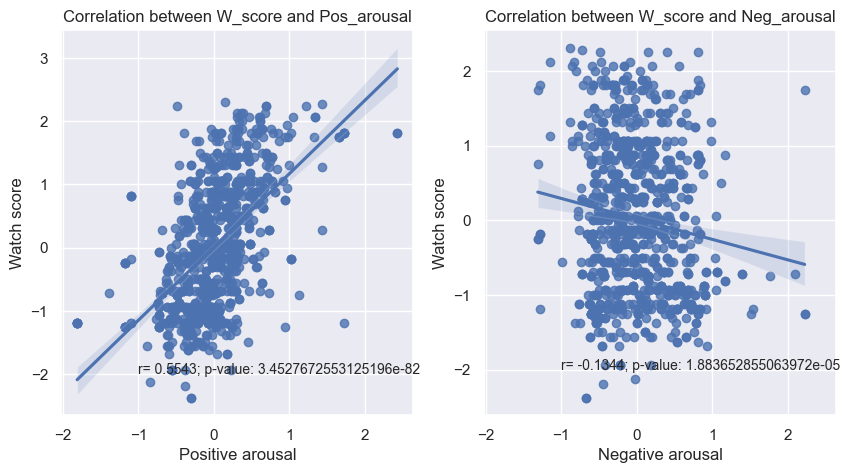

In [761]:
# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for both types of trailers. 

W_PA_All_corr = pearsonr(all_subs_events_df["W_score_scaled"], all_subs_events_df["Pos_arousal_scaled"])
W_NA_All_corr = pearsonr(all_subs_events_df["W_score_scaled"], all_subs_events_df["Neg_arousal_scaled"])

print("The correlation between W_score and Pos_arousal is: " + str(round(W_PA_All_corr[0], 4)) + " with a p-value of: " + str((W_PA_All_corr[1])))
print("The correlation between W_score and Neg_arousal is: " + str(round(W_NA_All_corr[0], 4)) + " with a p-value of: " + str((W_NA_All_corr[1])))

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

# Plot the correlation between W_score and Pos_arousal.
W_PA_plot = sns.regplot(data=all_subs_events_df, x="Pos_arousal_scaled", y="W_score_scaled", ax=axs[0])
W_PA_plot.set_title("Correlation between W_score and Pos_arousal")
W_PA_plot.set_xlabel("Positive arousal")
W_PA_plot.set_ylabel("Watch score")

# Plot the correlation between W_score and Neg_arousal.
W_NA_plot = sns.regplot(data=all_subs_events_df, x="Neg_arousal_scaled", y="W_score_scaled", ax=axs[1])
W_NA_plot.set_title("Correlation between W_score and Neg_arousal")
W_NA_plot.set_xlabel("Negative arousal")
W_NA_plot.set_ylabel("Watch score")

# Add annotation to the plot. 
W_PA_string = "r= " + str(round(W_PA_All_corr[0], 4)) + "; p-value: " + str((W_PA_All_corr[1]))
axs[0].text(s=W_PA_string, x=-1, y=-2, fontsize=10)
W_NA_string = "r= " + str(round(W_NA_All_corr[0], 4)) + "; p-value: " + str((W_NA_All_corr[1]))
axs[1].text(s=W_NA_string, x=-1, y=-2, fontsize=10)


In [762]:
# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for comedy trailers.
W_PA_comedy_corr = pearsonr(all_subs_events_comedy["W_score_scaled"], all_subs_events_comedy["Pos_arousal_scaled"])
W_NA_comedy_corr = pearsonr(all_subs_events_comedy["W_score_scaled"], all_subs_events_comedy["Neg_arousal_scaled"])

print("The correlation between W_score and Pos_arousal for comedy trailers is: " + str(round(W_PA_comedy_corr[0], 4)) + " with a p-value of: " + str((W_PA_comedy_corr[1])))
print("The correlation between W_score and Neg_arousal for comedy trailers is: " + str(round(W_NA_comedy_corr[0], 4)) + " with a p-value of: " + str((W_NA_comedy_corr[1])))

# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for horror trailers.
W_PA_horror_corr = pearsonr(all_subs_events_horror["W_score_scaled"], all_subs_events_horror["Pos_arousal_scaled"])
W_NA_horror_corr = pearsonr(all_subs_events_horror["W_score_scaled"], all_subs_events_horror["Neg_arousal_scaled"])

print("\nThe correlation between W_score and Pos_arousal for horror trailers is: " + str(round(W_PA_horror_corr[0], 4)) + " with a p-value of: " + str((W_PA_horror_corr[1])))
print("The correlation between W_score and Neg_arousal for horror trailers is: " + str(round(W_NA_horror_corr[0], 4)) + " with a p-value of: " + str((W_NA_horror_corr[1])))


The correlation between W_score and Pos_arousal for comedy trailers is: 0.606 with a p-value of: 4.723316086369779e-52
The correlation between W_score and Neg_arousal for comedy trailers is: 0.0151 with a p-value of: 0.7341828469058447

The correlation between W_score and Pos_arousal for horror trailers is: 0.4534 with a p-value of: 9.160786962074108e-27
The correlation between W_score and Neg_arousal for horror trailers is: -0.0944 with a p-value of: 0.034622545300534636


Text(-0.8, -2.5, 'H r= 0.4534; p-value: 9.160786962074108e-27')

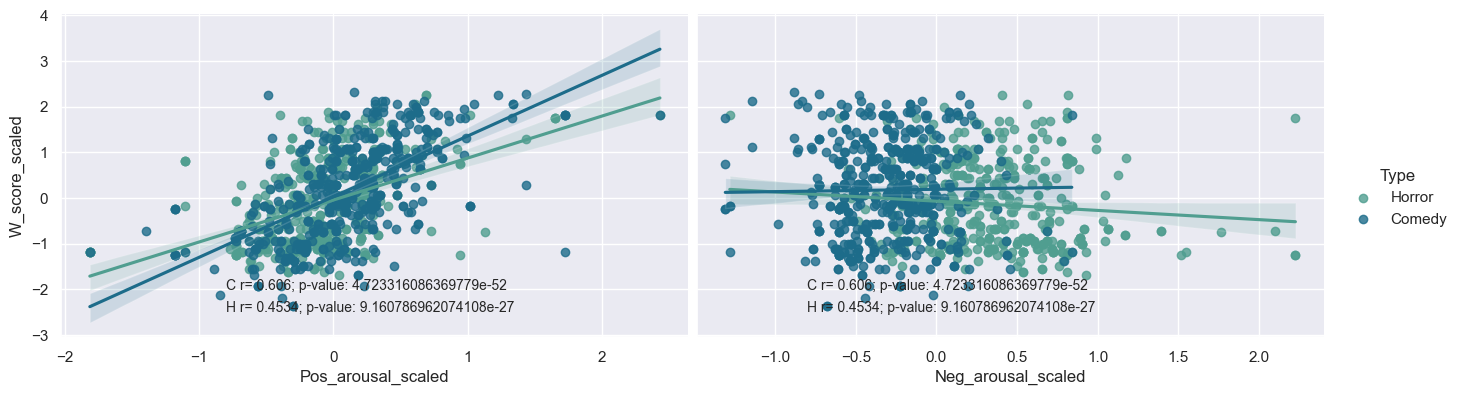

In [763]:

all_participants_cleaned_df = pd.read_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_ISC.csv')


all_participants_cleaned_df["Watch_choice"] = np.where(all_participants_cleaned_df["W_score"] < 3, "No", "Yes")

W_PA_NA_bothTrailers_behavioral_plot = sns.pairplot(
     all_participants_cleaned_df,
     kind="reg",
     x_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"],
     y_vars=["W_score_scaled"], 
     palette="crest",
     hue="Type",
     height=4,
     aspect=1.7)

W_comedy_PA_string = "C r= " + str(round(W_PA_comedy_corr[0], 4)) + "; p-value: " + str((W_PA_comedy_corr[1]))
W_horror_PA_string = "H r= " + str(round(W_PA_horror_corr[0], 4)) + "; p-value: " + str((W_PA_horror_corr[1]))
W_PA_NA_bothTrailers_behavioral_plot.axes[0, 0].text(s=W_comedy_PA_string, x=-.8, y=-2, fontsize=10)
W_PA_NA_bothTrailers_behavioral_plot.axes[0, 0].text(s=W_horror_PA_string, x=-.8, y=-2.5, fontsize=10)

W_comedy_NA_string = "C r= " + str(round(W_PA_comedy_corr[0], 4)) + "; p-value: " + str((W_PA_comedy_corr[1]))
W_horror_NA_string = "H r= " + str(round(W_PA_horror_corr[0], 4)) + "; p-value: " + str((W_PA_horror_corr[1]))
W_PA_NA_bothTrailers_behavioral_plot.axes[0, 1].text(s=W_comedy_NA_string, x=-.8, y=-2, fontsize=10)
W_PA_NA_bothTrailers_behavioral_plot.axes[0, 1].text(s=W_horror_NA_string, x=-.8, y=-2.5, fontsize=10)

Text(0.5, 1.0, 'Standard deviation of watch score for each participant')

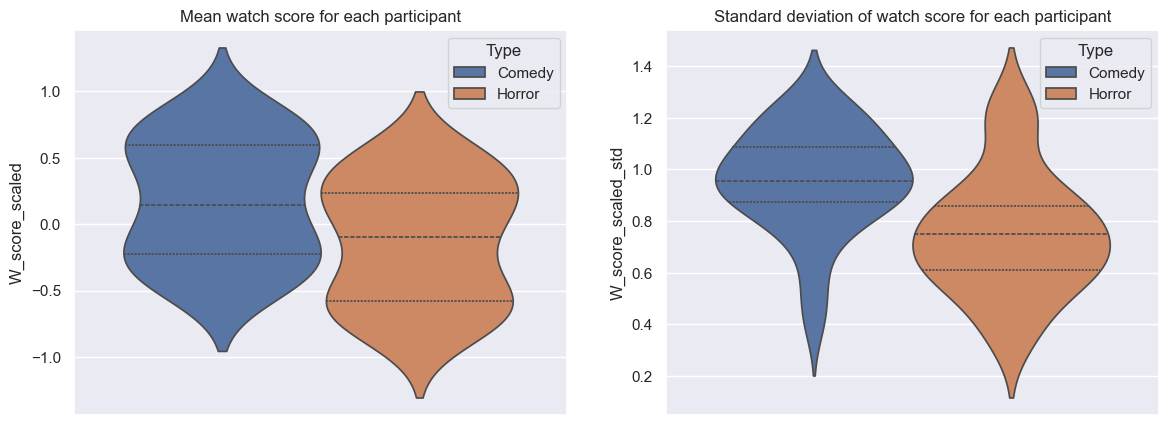

In [764]:
# Catching participants who consistently disliked horror/comedy movies. 
Individuals_mean_comedy_df = all_subs_events_comedy.groupby("Participant", as_index=False, dropna=False)[numeric_cols].mean()
Individuals_std_comedy_df = all_subs_events_comedy.groupby("Participant", as_index=False, dropna=False)[numeric_cols].std()
Individuals_mean_comedy_df["W_score_scaled_std"] = Individuals_std_comedy_df["W_score_scaled"]
Individuals_mean_comedy_df["Type"] = "Comedy"

Individuals_mean_horror_df = all_subs_events_horror.groupby("Participant", as_index=False, dropna=False)[numeric_cols].mean()
Individuals_std_horror_df = all_subs_events_horror.groupby("Participant", as_index=False, dropna=False)[numeric_cols].std()
Individuals_mean_horror_df["W_score_scaled_std"] = Individuals_std_horror_df["W_score_scaled"]
Individuals_mean_horror_df["Type"] = "Horror"

all_participants_means_df = pd.concat([Individuals_mean_comedy_df, Individuals_mean_horror_df], ignore_index=True)

sns.set(font_scale=1)

fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

sns.violinplot(data=all_participants_means_df, y="W_score_scaled", hue="Type", inner="quart", ax=axs[0])
axs[0].set_title("Mean watch score for each participant")

sns.violinplot(data=all_participants_means_df, y="W_score_scaled_std", hue="Type", inner="quart", ax=axs[1])
axs[1].set_title("Standard deviation of watch score for each participant")



In [765]:
# Get threshold for participants to exclude because the just don't like horror movies. 
Horror_w_threshold = Individuals_mean_horror_df["W_score_scaled"].describe()["50%"]
Comedy_w_threshold = Individuals_mean_comedy_df["W_score_scaled"].describe()["50%"]

#print("The threshold for the watch score for horror movies is: ", Horror_w_threshold)

Dislike_horror_list = []
Like_horror_list = []

Dislike_comedy_list = []
Like_comedy_list = []

for participant_id in range(len(participants_list)):

    if Individuals_mean_horror_df.loc[participant_id, "W_score_scaled"] < Horror_w_threshold: #0:
        Dislike_horror_list.append(participants_list[participant_id])
    else: 
        Like_horror_list.append(participants_list[participant_id])

    if Individuals_mean_comedy_df.loc[participant_id, "W_score_scaled"] < Comedy_w_threshold: #0:
        Dislike_comedy_list.append(participants_list[participant_id])
    else:
        Like_comedy_list.append(participants_list[participant_id])

print("Participants who dislike horror movies: ", Dislike_horror_list)
print("Participants who like horror movies: ", Like_horror_list)

print("\nParticipants who dislike comedy movies: ", Dislike_comedy_list)
print("Participants who like comedy movies: ", Like_comedy_list)


Participants who dislike horror movies:  ['sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-09', 'sub-14', 'sub-18', 'sub-21', 'sub-26', 'sub-27', 'sub-28', 'sub-30', 'sub-33', 'sub-35', 'sub-36', 'sub-37']
Participants who like horror movies:  ['sub-01', 'sub-08', 'sub-10', 'sub-11', 'sub-12', 'sub-13', 'sub-15', 'sub-16', 'sub-17', 'sub-19', 'sub-22', 'sub-23', 'sub-29', 'sub-31', 'sub-32', 'sub-34']

Participants who dislike comedy movies:  ['sub-01', 'sub-08', 'sub-11', 'sub-12', 'sub-13', 'sub-14', 'sub-15', 'sub-16', 'sub-17', 'sub-19', 'sub-22', 'sub-23', 'sub-29', 'sub-31', 'sub-32', 'sub-34']
Participants who like comedy movies:  ['sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-09', 'sub-10', 'sub-18', 'sub-21', 'sub-26', 'sub-27', 'sub-28', 'sub-30', 'sub-33', 'sub-35', 'sub-36', 'sub-37']


In [766]:
# Create separate dataframes for participants that like and dislike horror movies. 
Like_horror_df = pd.DataFrame()
Dislike_horror_df = pd.DataFrame()

for participant_id in range(len(participants_list)):

    if participants_list[participant_id] in Like_horror_list:
        Like_horror_df = pd.concat([Like_horror_df, all_subs_events_horror[all_subs_events_horror["Participant"] == participants_list[participant_id]]], ignore_index=True)

    if participants_list[participant_id] in Dislike_horror_list:
        Dislike_horror_df = pd.concat([Dislike_horror_df, all_subs_events_horror[all_subs_events_horror["Participant"] == participants_list[participant_id]]], ignore_index=True)

# Add column to main dataframe to distinguish participants that like and dislike horror movies. 
#all_subs_events_df["H_preference"] = "Like"
all_participants_means_df["H_preference"] = "Like"

#all_subs_events_df["C_preference"] = "Like"
all_participants_means_df["C_preference"] = "Like"

for participant_id in range(len(participants_list)):

    if participants_list[participant_id] in Dislike_horror_list:
        #all_subs_events_df.loc[all_subs_events_df["Participant"] == participants_list[participant_id], "H_preference"] = "Dislike"
        all_participants_means_df.loc[all_participants_means_df["Participant"] == participants_list[participant_id], "H_preference"] = "Dislike"

    if participants_list[participant_id] in Dislike_comedy_list:
        #all_subs_events_df.loc[all_subs_events_df["Participant"] == participants_list[participant_id], "C_preference"] = "Dislike"
        all_participants_means_df.loc[all_participants_means_df["Participant"] == participants_list[participant_id], "C_preference"] = "Dislike"



In [767]:
# Create separate dataframes for participants that like and dislike horror movies. 
Like_horror_df = pd.DataFrame()
Dislike_horror_df = pd.DataFrame()

for participant_id in range(len(participants_list)):

    if participants_list[participant_id] in Like_horror_list:
        Like_horror_df = pd.concat([Like_horror_df, all_subs_events_horror[all_subs_events_horror["Participant"] == participants_list[participant_id]]], ignore_index=True)

    if participants_list[participant_id] in Dislike_horror_list:
        Dislike_horror_df = pd.concat([Dislike_horror_df, all_subs_events_horror[all_subs_events_horror["Participant"] == participants_list[participant_id]]], ignore_index=True)

# Add column to main dataframe to distinguish participants that like and dislike horror movies. 
#all_subs_events_df["H_preference"] = "Like"
all_participants_means_df["H_preference"] = "Like"

#all_subs_events_df["C_preference"] = "Like"
all_participants_means_df["C_preference"] = "Like"

for participant_id in range(len(participants_list)):

    if participants_list[participant_id] in Dislike_horror_list:
        #all_subs_events_df.loc[all_subs_events_df["Participant"] == participants_list[participant_id], "H_preference"] = "Dislike"
        all_participants_means_df.loc[all_participants_means_df["Participant"] == participants_list[participant_id], "H_preference"] = "Dislike"

    if participants_list[participant_id] in Dislike_comedy_list:
        #all_subs_events_df.loc[all_subs_events_df["Participant"] == participants_list[participant_id], "C_preference"] = "Dislike"
        all_participants_means_df.loc[all_participants_means_df["Participant"] == participants_list[participant_id], "C_preference"] = "Dislike"



/var/folders/6h/j6h8_h1d0sx06cyf77m5wmg40000gn/T/ipykernel_62418/2937040998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_subs_events_df, y="Pos_arousal_scaled", x="Type", palette="viridis", ax=axs[0])
/var/folders/6h/j6h8_h1d0sx06cyf77m5wmg40000gn/T/ipykernel_62418/2937040998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_subs_events_df, y="Neg_arousal_scaled", x="Type", palette="viridis", ax=axs[1])
/var/folders/6h/j6h8_h1d0sx06cyf77m5wmg40000gn/T/ipykernel_62418/2937040998.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<Axes: xlabel='Type', ylabel='W_score_scaled'>

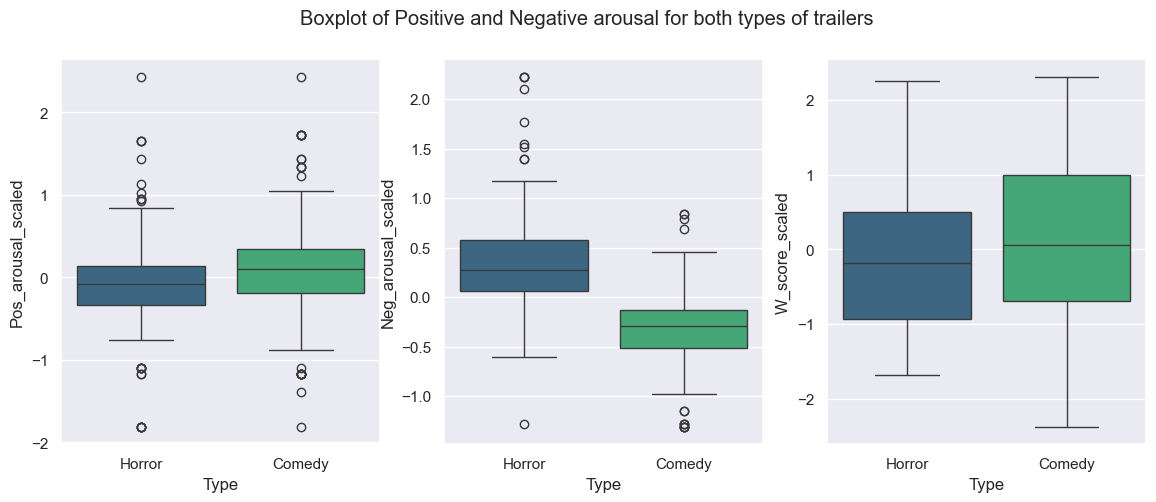

In [768]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharex=True)
fig.suptitle("Boxplot of Positive and Negative arousal for both types of trailers")
sns.boxplot(data=all_subs_events_df, y="Pos_arousal_scaled", x="Type", palette="viridis", ax=axs[0])
sns.boxplot(data=all_subs_events_df, y="Neg_arousal_scaled", x="Type", palette="viridis", ax=axs[1])
sns.boxplot(data=all_subs_events_df, y="W_score_scaled", x="Type", palette="viridis", ax=axs[2])


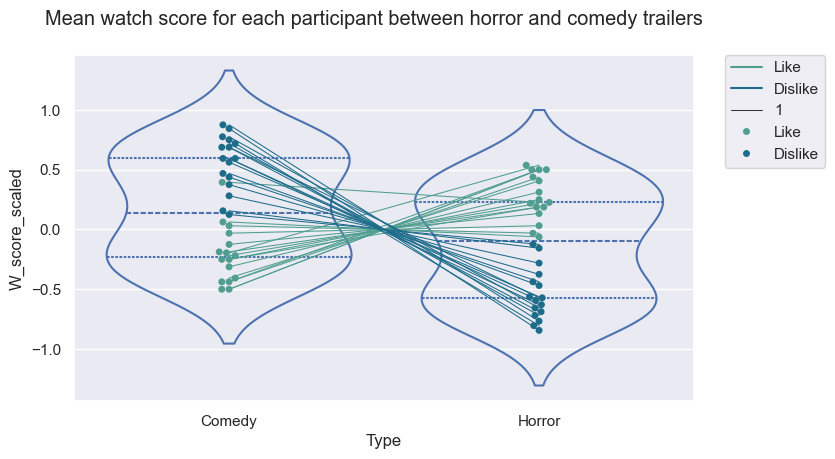

In [769]:
fig, axs = plt.subplots(figsize=(8, 4.5), sharex=True)

sns.violinplot(data=all_participants_means_df, y="W_score_scaled", x="Type", inner="quart", fill=False, palette=None, ax=axs)

sns.lineplot(data=all_participants_means_df, y="W_score_scaled", x="Type", hue="H_preference",
                 estimator=None, 
                 units="Participant",  
                 markers=True, 
                 size=1,
                 palette="crest",
                 ax=axs)

sns.swarmplot(data=all_participants_means_df, y="W_score_scaled", x="Type", hue="H_preference", palette="crest", 
              dodge=False, ax=axs) 

fig.suptitle("Mean watch score for each participant between horror and comedy trailers")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #labels=["Like", "Dislike"], ,  

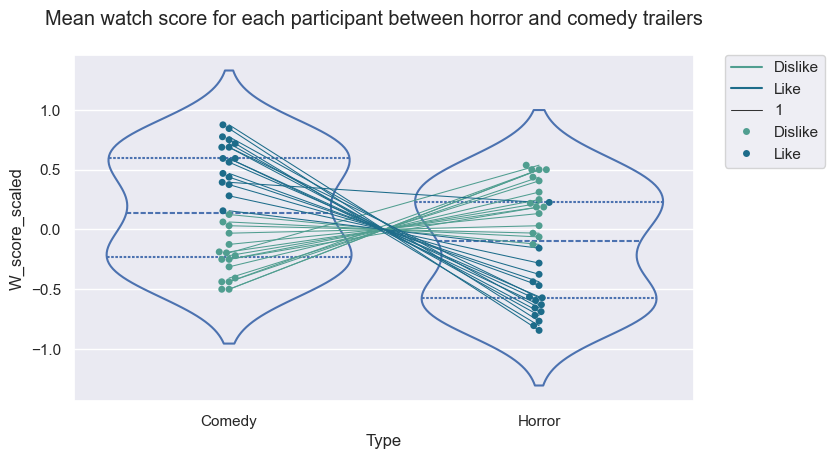

In [770]:
fig, axs = plt.subplots(figsize=(8, 4.5), sharex=True)

sns.violinplot(data=all_participants_means_df, y="W_score_scaled", x="Type", inner="quart", fill=False, palette=None, ax=axs)

sns.lineplot(data=all_participants_means_df, y="W_score_scaled", x="Type", hue="C_preference",
                 estimator=None, 
                 units="Participant",  
                 markers=True, 
                 size=1,
                 palette="crest",
                 ax=axs)

sns.swarmplot(data=all_participants_means_df, y="W_score_scaled", x="Type", hue="C_preference", palette="crest", 
              dodge=False, ax=axs) 

fig.suptitle("Mean watch score for each participant between horror and comedy trailers")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


The correlation between W_score and Pos_arousal for Like horror group is: 0.4727 with a p-value of: 2.5368491501257444e-15
The correlation between W_score and Neg_arousal for Like horror group is: 0.1207 with a p-value of: 0.05669649915490319

The correlation between W_score and Pos_arousal for Dislike horror group is: 0.4077 with a p-value of: 1.8091701597383982e-11
The correlation between W_score and Neg_arousal for Dislike horror group is: -0.3016 with a p-value of: 1.1254372794113032e-06


Text(-0.5, 1.2, 'DH r= -0.3016; p-value: 1.1254372794113032e-06')

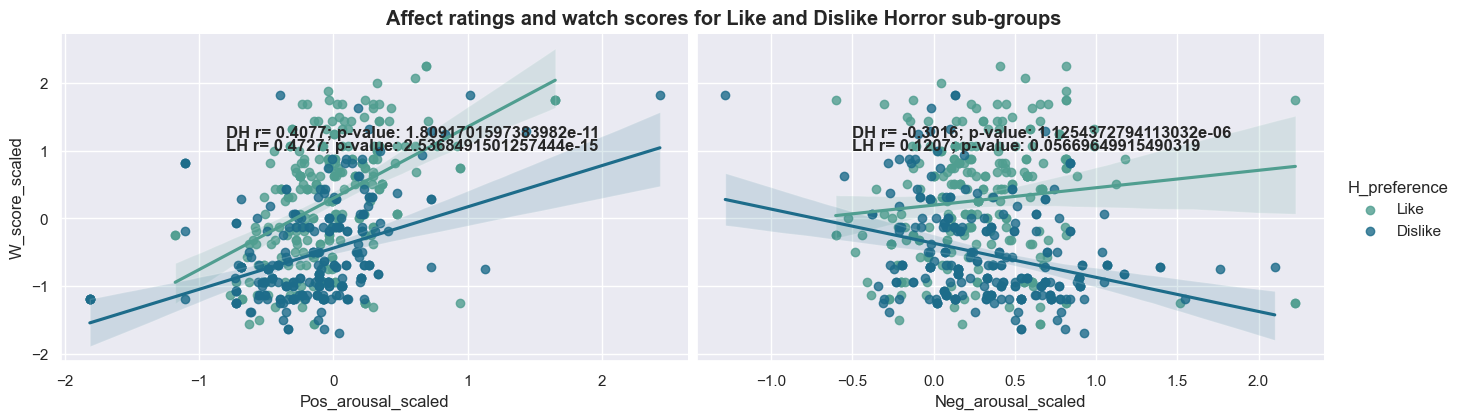

In [771]:
all_subs_events_horror = all_subs_events_df[all_subs_events_df["Type"] == "Horror"]
all_subs_events_horror.reset_index(drop=True, inplace=True)

# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for Like horror group.
W_PA_LH_corr = pearsonr(all_subs_events_horror[all_subs_events_horror["H_preference"] == "Like"]["W_score_scaled"], all_subs_events_horror[all_subs_events_horror["H_preference"] == "Like"]["Pos_arousal_scaled"])
W_NA_LH_corr = pearsonr(all_subs_events_horror[all_subs_events_horror["H_preference"] == "Like"]["W_score_scaled"], all_subs_events_horror[all_subs_events_horror["H_preference"] == "Like"]["Neg_arousal_scaled"])

print("The correlation between W_score and Pos_arousal for Like horror group is: " + str(round(W_PA_LH_corr[0], 4)) + " with a p-value of: " + str((W_PA_LH_corr[1])))
print("The correlation between W_score and Neg_arousal for Like horror group is: " + str(round(W_NA_LH_corr[0], 4)) + " with a p-value of: " + str((W_NA_LH_corr[1])))

# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for Dislike horror group.
W_PA_DH_corr = pearsonr(all_subs_events_horror[all_subs_events_horror["H_preference"] == "Dislike"]["W_score_scaled"], all_subs_events_horror[all_subs_events_horror["H_preference"] == "Dislike"]["Pos_arousal_scaled"])
W_NA_DH_corr = pearsonr(all_subs_events_horror[all_subs_events_horror["H_preference"] == "Dislike"]["W_score_scaled"], all_subs_events_horror[all_subs_events_horror["H_preference"] == "Dislike"]["Neg_arousal_scaled"])

print("\nThe correlation between W_score and Pos_arousal for Dislike horror group is: " + str(round(W_PA_DH_corr[0], 4)) + " with a p-value of: " + str((W_PA_DH_corr[1])))
print("The correlation between W_score and Neg_arousal for Dislike horror group is: " + str(round(W_NA_DH_corr[0], 4)) + " with a p-value of: " + str((W_NA_DH_corr[1])))

W_PA_NA_HorrorTrailers_plot = sns.pairplot(
     all_subs_events_horror,
     kind="reg",
     x_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"],
     y_vars=["W_score_scaled"], 
     palette="crest",
     hue="H_preference",
     height=4,
     aspect=1.7)
W_PA_NA_HorrorTrailers_plot.fig.suptitle("Affect ratings and watch scores for Like and Dislike Horror sub-groups", va="top", fontweight='bold', y=1.03)

W_LH_PA_string = "LH r= " + str(round(W_PA_LH_corr[0], 4)) + "; p-value: " + str((W_PA_LH_corr[1]))
W_DH_PA_string = "DH r= " + str(round(W_PA_DH_corr[0], 4)) + "; p-value: " + str((W_PA_DH_corr[1]))
W_PA_NA_HorrorTrailers_plot.axes[0, 0].text(s=W_LH_PA_string, x=-.8, y=1, fontsize=12, weight='bold')
W_PA_NA_HorrorTrailers_plot.axes[0, 0].text(s=W_DH_PA_string, x=-.8, y=1.2, fontsize=12, weight='bold')

W_LH_NA_string = "LH r= " + str(round(W_NA_LH_corr[0], 4)) + "; p-value: " + str((W_NA_LH_corr[1]))
W_DH_NA_string = "DH r= " + str(round(W_NA_DH_corr[0], 4)) + "; p-value: " + str((W_NA_DH_corr[1]))
W_PA_NA_HorrorTrailers_plot.axes[0, 1].text(s=W_LH_NA_string, x=-.5, y=1, fontsize=12, weight='bold')
W_PA_NA_HorrorTrailers_plot.axes[0, 1].text(s=W_DH_NA_string, x=-.5, y=1.2, fontsize=12, weight='bold')


The correlation between W_score and Pos_arousal for Like comedy group is: 0.6358 with a p-value of: 6.0719501669401024e-30
The correlation between W_score and Neg_arousal for Like comedy group is: -0.0401 with a p-value of: 0.5263630006102484

The correlation between W_score and Pos_arousal for Dislike comedy group is: 0.6223 with a p-value of: 1.2485019887886453e-28
The correlation between W_score and Neg_arousal for Dislike comedy group is: 0.1068 with a p-value of: 0.08943944473315477


Text(-0.5, 2.3, 'DC r= 0.1068; p-value: 0.08943944473315477')

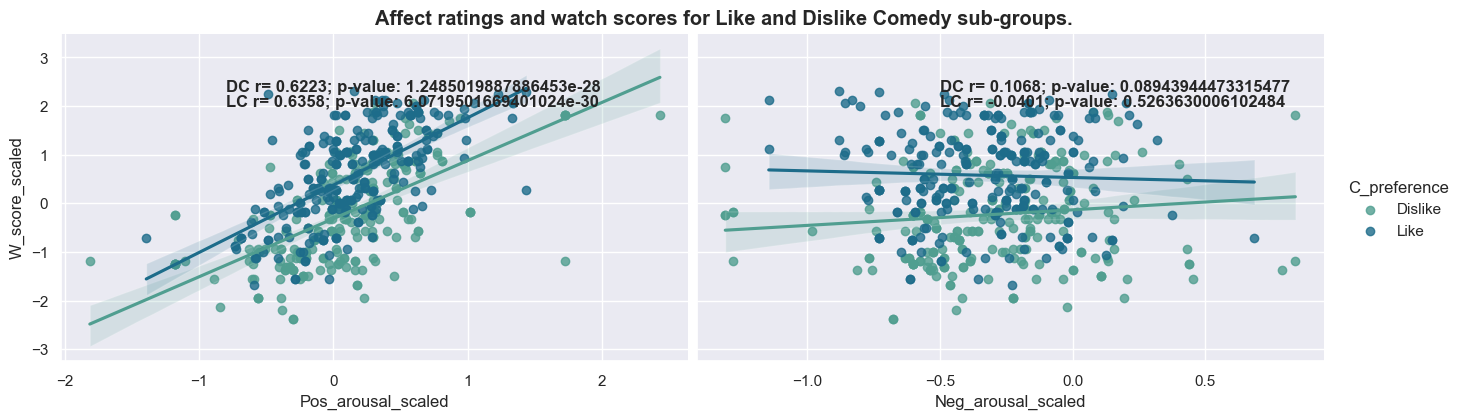

In [772]:
all_subs_events_comedy = all_subs_events_df[all_subs_events_df["Type"] == "Comedy"]
all_subs_events_comedy.reset_index(drop=True, inplace=True)

# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for Like comedy group.
W_PA_LC_corr = pearsonr(all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Like"]["W_score_scaled"], all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Like"]["Pos_arousal_scaled"])
W_NA_LC_corr = pearsonr(all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Like"]["W_score_scaled"], all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Like"]["Neg_arousal_scaled"])

print("The correlation between W_score and Pos_arousal for Like comedy group is: " + str(round(W_PA_LC_corr[0], 4)) + " with a p-value of: " + str((W_PA_LC_corr[1])))
print("The correlation between W_score and Neg_arousal for Like comedy group is: " + str(round(W_NA_LC_corr[0], 4)) + " with a p-value of: " + str((W_NA_LC_corr[1])))
      
# Correlation between W_score and Pos_arousal and A_score and Pos_arousal for Dislike comedy group.
W_PA_DC_corr = pearsonr(all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Dislike"]["W_score_scaled"], all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Dislike"]["Pos_arousal_scaled"])
W_NA_DC_corr = pearsonr(all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Dislike"]["W_score_scaled"], all_subs_events_comedy[all_subs_events_comedy["C_preference"] == "Dislike"]["Neg_arousal_scaled"])

print("\nThe correlation between W_score and Pos_arousal for Dislike comedy group is: " + str(round(W_PA_DC_corr[0], 4)) + " with a p-value of: " + str((W_PA_DC_corr[1])))
print("The correlation between W_score and Neg_arousal for Dislike comedy group is: " + str(round(W_NA_DC_corr[0], 4)) + " with a p-value of: " + str((W_NA_DC_corr[1])))

W_PA_NA_ComedyTrailers_plot = sns.pairplot(
     all_subs_events_comedy,
     kind="reg",
     x_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"],
     y_vars=["W_score_scaled"], 
     palette="crest",
     hue="C_preference",
     height=4,
     aspect=1.7)
W_PA_NA_ComedyTrailers_plot.fig.suptitle("Affect ratings and watch scores for Like and Dislike Comedy sub-groups.", va="top", fontweight='bold', y=1.03)

W_LC_PA_string = "LC r= " + str(round(W_PA_LC_corr[0], 4)) + "; p-value: " + str((W_PA_LC_corr[1]))
W_DC_PA_string = "DC r= " + str(round(W_PA_DC_corr[0], 4)) + "; p-value: " + str((W_PA_DC_corr[1]))

W_PA_NA_ComedyTrailers_plot.axes[0, 0].text(s=W_LC_PA_string, x=-.8, y=2, fontsize=12, weight='bold')
W_PA_NA_ComedyTrailers_plot.axes[0, 0].text(s=W_DC_PA_string, x=-.8, y=2.3, fontsize=12, weight='bold')

W_LC_NA_string = "LC r= " + str(round(W_NA_LC_corr[0], 4)) + "; p-value: " + str((W_NA_LC_corr[1]))
W_DC_NA_string = "DC r= " + str(round(W_NA_DC_corr[0], 4)) + "; p-value: " + str((W_NA_DC_corr[1]))

W_PA_NA_ComedyTrailers_plot.axes[0, 1].text(s=W_LC_NA_string, x=-.5, y=2, fontsize=12, weight='bold')
W_PA_NA_ComedyTrailers_plot.axes[0, 1].text(s=W_DC_NA_string, x=-.5, y=2.3, fontsize=12, weight='bold')

In [773]:
all_subs_events_df["F_score_scaled"] = 0

for sub_id in participants_list: 

    # Calculate mean feel score for current subject. 
    current_sub_mean_f = all_subs_events_df[all_subs_events_df["Participant"] == sub_id]["F_score"].mean()


    # Calculate std feel score for current subject. 
    current_sub_std_f = all_subs_events_df[all_subs_events_df["Participant"] == sub_id]["F_score"].std()

    # Mean center F score for current participant.
    all_subs_events_df.loc[all_subs_events_df["Participant"] == sub_id, "F_score_scaled"] = (all_subs_events_df[all_subs_events_df["Participant"] == sub_id]["F_score"] - current_sub_mean_f)/current_sub_std_f


/var/folders/6h/j6h8_h1d0sx06cyf77m5wmg40000gn/T/ipykernel_62418/3547229117.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.41046103  0.41046103  0.41046103 -0.41046103 -0.41046103  1.2313831
  1.2313831  -0.41046103 -1.2313831   0.41046103 -0.41046103  0.41046103
  0.41046103 -1.2313831   1.2313831   1.2313831   1.2313831  -1.2313831
  0.41046103 -1.2313831   1.2313831   0.41046103 -1.2313831   1.2313831
 -1.2313831   0.41046103 -1.2313831  -1.2313831   1.2313831  -1.2313831
  1.2313831  -1.2313831 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  all_subs_events_df.loc[all_subs_events_df["Participant"] == sub_id, "F_score_scaled"] = (all_subs_events_df[all_subs_events_df["Participant"] == sub_id]["F_score"] - current_sub_mean_f)/current_sub_std_f


In [774]:
all_participants_means_df.columns[50]

'AIns_seg3_z'

In [775]:
# Plot..
# sub_group_means_horror = all_participants_means_df.groupby(['H_preference']).mean()
# sub_group_means_comedy = all_participants_means_df.groupby(['C_preference']).mean()

# sub_group_means_horror["kind"] = ["Dislike_H", "Like_H"]
# sub_group_means_comedy["kind"] = ["Dislike_C", "Like_C"]

# # concat 
# sub_group_means = pd.concat([sub_group_means_horror, sub_group_means_comedy], axis=0)

# sns.scatterplot(sub_group_means, x="Neg_arousal_scaled", y="Pos_arousal_scaled", hue="kind")




## Neural Activation Whole Average 

In [776]:
#test_title = "Correlations for whole activation for both types of trailers"
#compute_and_plot_corrs(all_participants_cleaned_df, "whole", test_title)

In [777]:

#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "whole", "Correlations for whole activation for both types of trailers")


## Neural Activation Offset 

In [778]:
#offset_title = "Correlations for offset activation for both types of trailers"
#compute_and_plot_corrs(all_participants_cleaned_df, "offset", offset_title)

In [779]:
#offset_title = 'Offset time course activation for both types of trailers'
#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "offset", offset_title)


# Neural activation middle

In [780]:
#middle_title = "Correlations for middle activation for both types of trailers"
#compute_and_plot_corrs(all_participants_cleaned_df, "middle", middle_title)

In [781]:
#middle_title = 'Middle time course activation for both types of trailers'
#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "middle", middle_title)

## Neural activation onset

In [782]:
#onset_title = "Correlations for onset activation for both types of trailers"
#compute_and_plot_corrs(all_participants_cleaned_df, "onset", onset_title)

In [783]:
#onset_title = 'Onset time course activation for both types of trailers'
#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "onset", onset_title)

## Individual peak (max)

In [784]:
#pos_peak_title = "Correlations for individuals positive peak activation for both types of trailers"
#compute_and_plot_corrs(all_participants_cleaned_df, "ind_peaks_pos", pos_peak_title)

In [785]:
#pos_peak_title = 'Individual positive peak time course activation for both types of trailers'
#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "ind_peaks_pos", pos_peak_title)

## Individual peaks (min)

In [786]:
# neg_peak_title = "Correlations for individual negative peak activation for both types of trailers"
# compute_and_plot_corrs(all_participants_cleaned_df, "ind_peaks_neg", neg_peak_title)

In [787]:
#neg_peak_title = 'Individuals negative peak time course activation for both types of trailers'
#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "ind_peaks_neg", neg_peak_title)

In [788]:
#collective_peak_title = 'Individuals collective positive peak time course activation for both types of trailers'
#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "dem_peak_pos", collective_peak_title)

In [789]:
#collective_peak_title = 'Individuals avg positive peak time course activation for both types of trailers'
#compute_and_plot_both_corrs(all_participants_cleaned_df, all_subs_events_comedy, all_subs_events_horror, "avg_peak_yes_pos", collective_peak_title)

## Neural ISC

# Correlation Matrix for all variables.

In [790]:
relevant_cols = ['Pos_arousal_scaled', 'Neg_arousal_scaled', 'W_score_scaled',
       'NAcc_onset', 'AIns_onset', 'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
       'NAcc_offset', 'AIns_offset', 'MPFC_offset', 
       #'NAcc_ISC', 'AIns_ISC', 'MPFC_ISC',

       "NAcc_TR3",

       "NAcc_DP", "AIns_DP", "MPFC_DP",
       "NAcc_DP1", "NAcc_DP2", "NAcc_DP3",
       "AIns_DP4", "AIns_DP5", "AIns_DP6", "AIns_DP7", "AIns_DP8", 
       "MPFC_DP2", "MPFC_DP3", "MPFC_DP4",
       "NAcc_DPy", "AIns_DPy", "MPFC_DPy",
        #"NAcc_DS", "AIns_DS", "MPFC_DS",
        #"NAcc_DSy", "AIns_DSy", "MPFC_DSy",
        "NAcc_AP", "AIns_AP", "MPFC_AP",
       # AIns_AP4,AIns_AP5,AIns_AP6,AIns_AP7,AIns_AP8,
        "NAcc_APy", "AIns_APy", "MPFC_APy",
        "NAcc_AP2", "AIns_AP2", "MPFC_AP2", 
        "NAcc_APy2", "AIns_APy2", "MPFC_APy2",
        "NAcc_DP_subgroup", "AIns_DP_subgroup", "MPFC_DP_subgroup",
        "NAcc_AP_subgroup", "AIns_AP_subgroup", "MPFC_AP_subgroup",
        #NAcc_dem_peak_pos_no,AIns_dem_peak_pos_no,MPFC_dem_peak_pos_no,MPFC_APy,NAcc_avg_peak_yes_pos_z,AIns_avg_peak_yes_pos_z,MPFC_avg_peak_yes_pos_z,NAcc_dem_peak_subgroup_z,AIns_dem_peak_subgroup_z,MPFC_dem_peak_subgroup_z,NAcc_avg_peak_subgroup_z,AIns_avg_peak_subgroup_z,MPFC_avg_peak_subgroup_z

       #'NAcc_ind_peaks_pos', 'AIns_ind_peaks_pos', 'MPFC_ind_peaks_pos',
       #'NAcc_ind_peaks_neg', 'AIns_ind_peaks_neg', 'MPFC_ind_peaks_neg', 

       
       #'AIns_dem_peak_pos7','AIns_dem_peak_pos8', 
       #'AIns_avg_peak_pos4', 'AIns_avg_peak_pos5', 'AIns_avg_peak_pos6', 'AIns_avg_peak_pos7', 'AIns_avg_peak_pos8',
       #'MPFC_dem_peak_pos2', 'MPFC_dem_peak_pos3', 'MPFC_dem_peak_pos4',
       "NAcc_seg1", "NAcc_seg2", "NAcc_seg3", "NAcc_seg4", "NAcc_seg5",
       "AIns_seg1", "AIns_seg2", "AIns_seg3", "AIns_seg4", "AIns_seg5",
       "MPFC_seg1", "MPFC_seg2", "MPFC_seg3", "MPFC_seg4", "MPFC_seg5"
       #'NAcc_w', 'AIns_w', 'MPFC_w', 'NAcc_f', 'AIns_f', 'MPFC_f', 'NAcc_a', 'AIns_a', 'MPFC_a',
       #'NAcc_MPFC', 'AIns_MPFC', 'NAcc_AIns', 'NAcc_MPFC_ISFC', 'AIns_MPFC_ISFC', 'NAcc_AIns_ISFC', 'AIns_NAcc_ISFC',
       #'MPFC_NAcc_ISFC', 'MPFC_AIns_ISFC'
       ]

all_subs_events_matrix = all_subs_events_df[relevant_cols]
all_subs_events_comedy_matrix = all_subs_events_comedy[relevant_cols]
all_subs_events_horror_matrix = all_subs_events_horror[relevant_cols]
Like_horror_matrix = Like_horror_df[relevant_cols]
Dislike_horror_matrix = Dislike_horror_df[relevant_cols]

all_subs_events_matrix = all_subs_events_matrix.dropna()
all_subs_events_comedy_matrix = all_subs_events_comedy_matrix.dropna()
all_subs_events_horror_matrix = all_subs_events_horror_matrix.dropna()
Like_horror_matrix = Like_horror_matrix.dropna()
Dislike_horror_matrix = Dislike_horror_matrix.dropna()

all_subs_events_corr = all_subs_events_matrix.corr()
all_subs_events_comedy_corr = all_subs_events_comedy_matrix.corr()
all_subs_events_horror_corr = all_subs_events_horror_matrix.corr()
Like_horror_corr = Like_horror_matrix.corr()
Dislike_horror_corr = Dislike_horror_matrix.corr()



In [791]:

# sub01_df = all_subs_events_df.loc[all_subs_events_df["Participant"] == "sub-01"]
# print(sub01_df["Onset"].values)

# sub01_df = all_subs_events_df.loc[all_subs_events_df["Participant"] == "sub-37"] #sub-10 missing self-report data from a lot of trials.
# print(sub01_df["Onset"].values)

<Axes: >

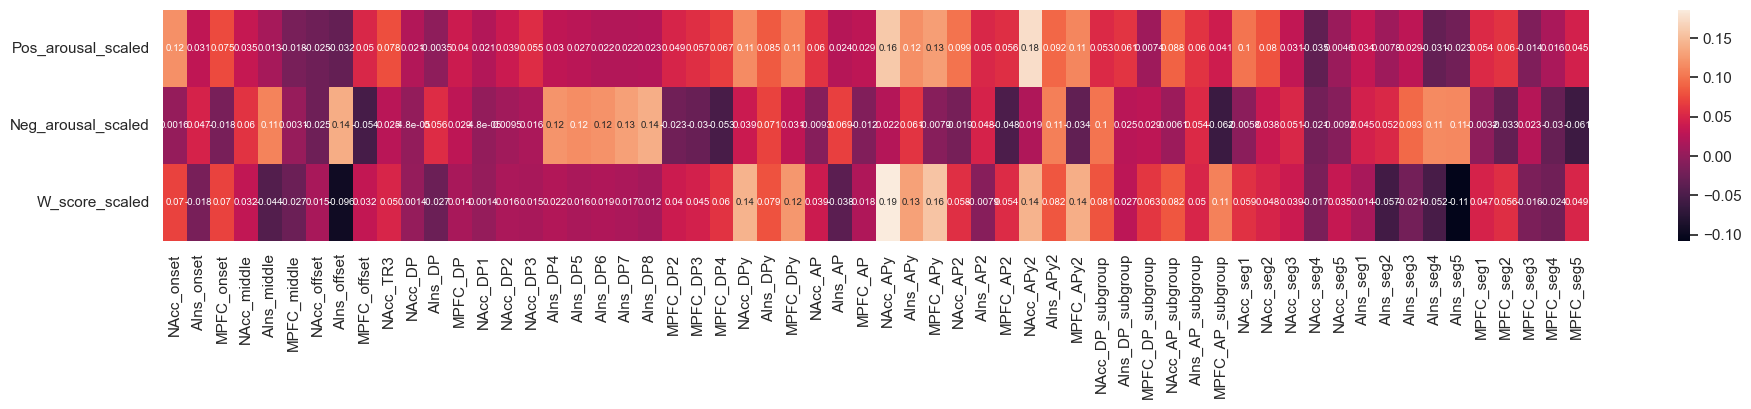

In [792]:
fig, axs = plt.subplots(1, 1, figsize=(23, 3), sharex=False) 

sns.heatmap(all_subs_events_corr.iloc[0:3, 3:], ax=axs, annot=True, annot_kws={'size':7})

<Axes: >

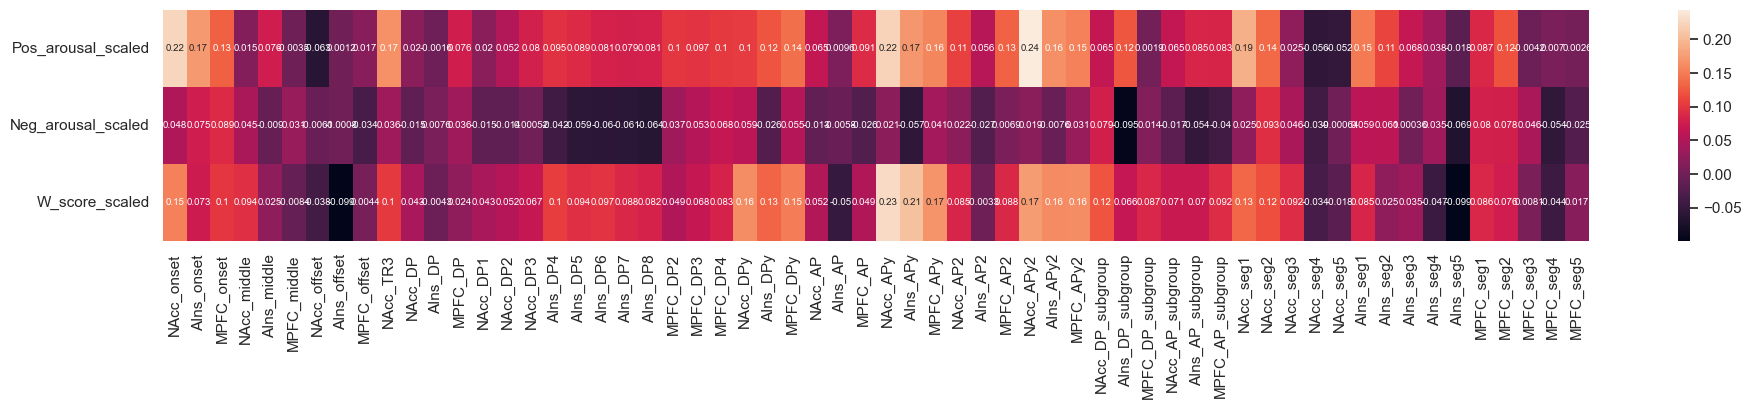

In [793]:
fig, axs = plt.subplots(1, 1, figsize=(23, 3), sharex=False) 

sns.heatmap(all_subs_events_comedy_corr.iloc[0:3, 3:], ax=axs, annot=True, annot_kws={'size':7})

<Axes: >

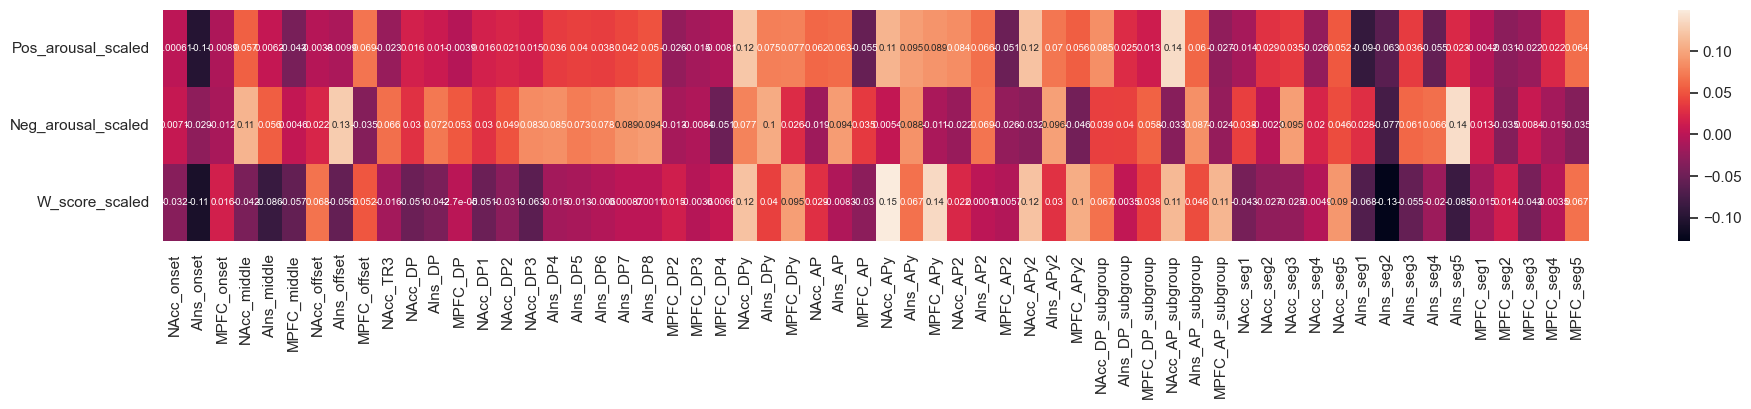

In [794]:
fig, axs = plt.subplots(1, 1, figsize=(23, 3), sharex=False) 

sns.heatmap(all_subs_events_horror_corr.iloc[0:3, 3:], ax=axs, annot=True, annot_kws={'size':7})

### Look at Genre preference sub-groups.

<Axes: >

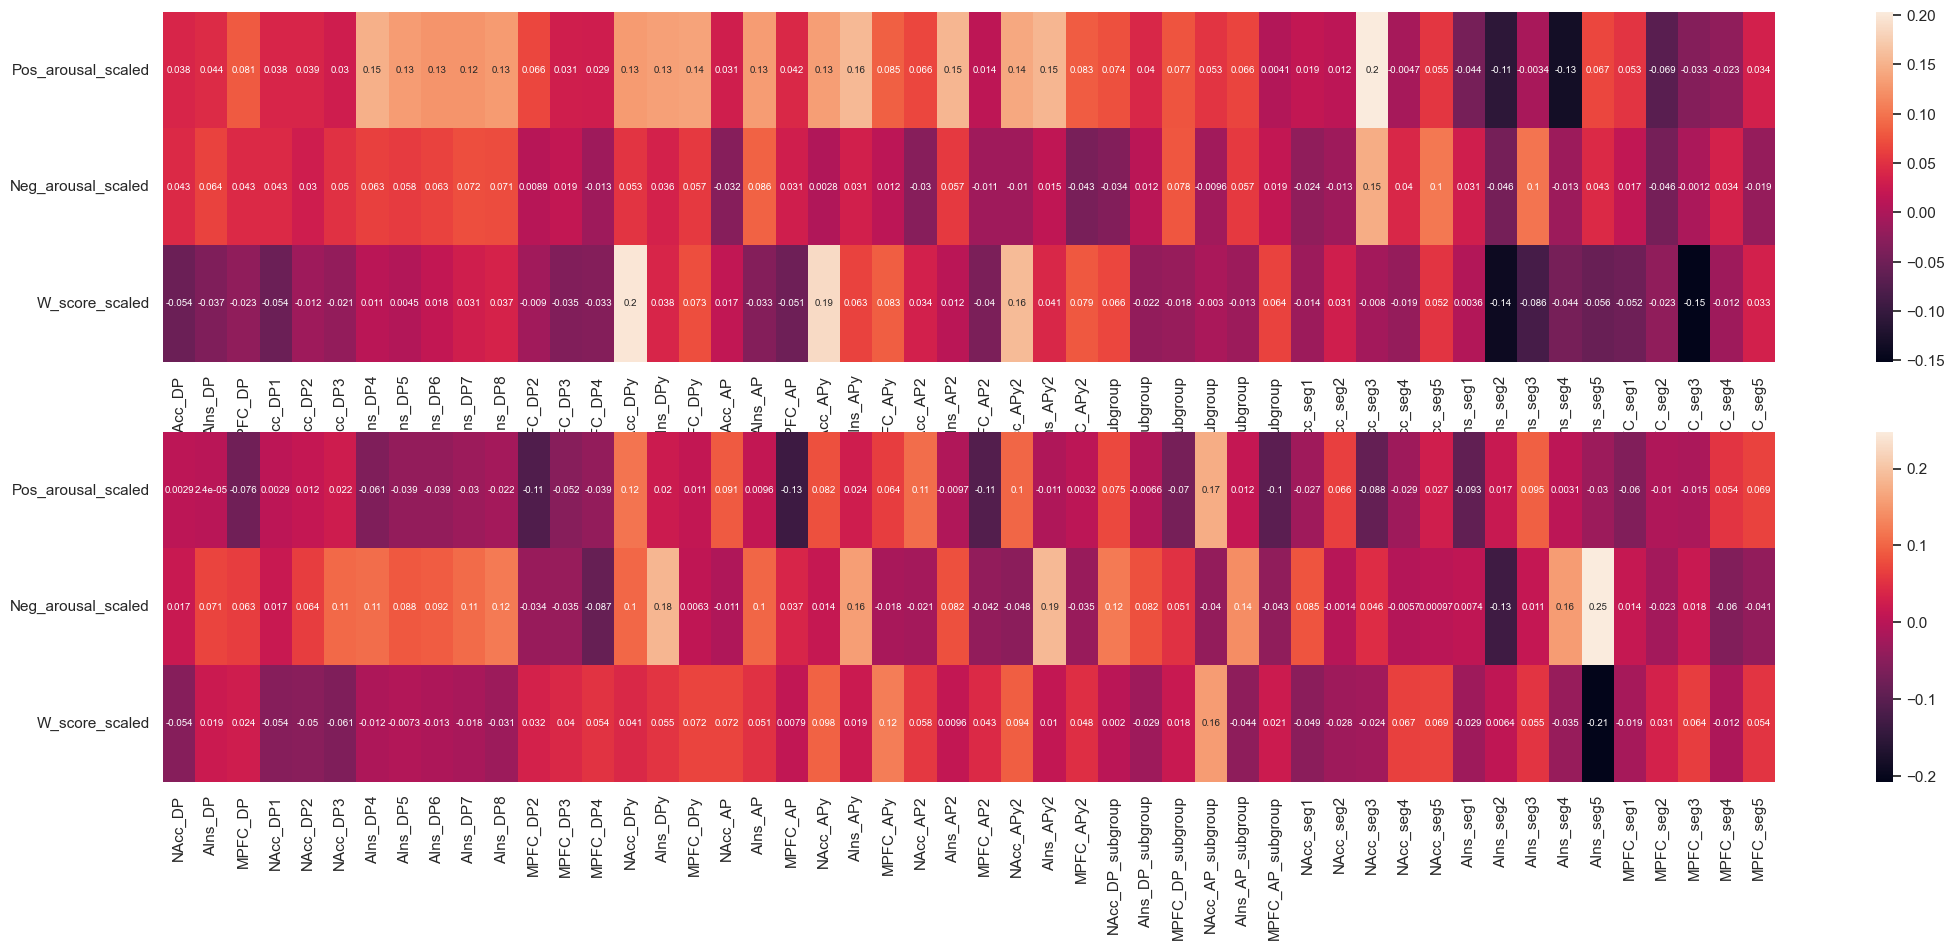

In [795]:
LH_df = all_subs_events_df[(all_subs_events_df["H_preference"] == "Like") & (all_subs_events_df["Type"] == "Horror")]
DH_df = all_subs_events_df[(all_subs_events_df["H_preference"] == "Dislike") & (all_subs_events_df["Type"] == "Horror")]

relevant_cols = ['Pos_arousal_scaled', 'Neg_arousal_scaled', 'W_score_scaled',
       
       #'NAcc_onset', 'AIns_onset', 'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
       #'NAcc_offset', 'AIns_offset', 'MPFC_offset',
       #"NAcc_ISC", "AIns_ISC", "MPFC_ISC",
       #"NAcc_LH_ISC", "AIns_LH_ISC", "MPFC_LH_ISC",
       #"NAcc_DH_ISC", "AIns_DH_ISC", "MPFC_DH_ISC",
       #"NAcc_LH_ISC", "AIns_LH_ISC", "MPFC_LH_ISC", "NAcc_DH_ISC", "AIns_DH_ISC", "MPFC_DH_ISC",
       #"NAcc_w", "AIns_w", #"MPFC_w", "NAcc_f", "AIns_f", "MPFC_f", "NAcc_a", "AIns_a", "MPFC_a", 

       "NAcc_DP", "AIns_DP", "MPFC_DP",
       "NAcc_DP1", "NAcc_DP2", "NAcc_DP3",
       "AIns_DP4", "AIns_DP5", "AIns_DP6", "AIns_DP7", "AIns_DP8", 
       "MPFC_DP2", "MPFC_DP3", "MPFC_DP4",
       "NAcc_DPy", "AIns_DPy", "MPFC_DPy",
        #"NAcc_DS", "AIns_DS", "MPFC_DS",
        #"NAcc_DSy", "AIns_DSy", "MPFC_DSy",
        "NAcc_AP", "AIns_AP", "MPFC_AP",
       # AIns_AP4,AIns_AP5,AIns_AP6,AIns_AP7,AIns_AP8,
        "NAcc_APy", "AIns_APy", "MPFC_APy",
        "NAcc_AP2", "AIns_AP2", "MPFC_AP2", 
        "NAcc_APy2", "AIns_APy2", "MPFC_APy2",

       "NAcc_DP_subgroup", "AIns_DP_subgroup", "MPFC_DP_subgroup",
        "NAcc_AP_subgroup", "AIns_AP_subgroup", "MPFC_AP_subgroup",

       "NAcc_seg1", "NAcc_seg2", "NAcc_seg3", "NAcc_seg4", "NAcc_seg5",
       "AIns_seg1", "AIns_seg2", "AIns_seg3", "AIns_seg4", "AIns_seg5",
       "MPFC_seg1", "MPFC_seg2", "MPFC_seg3", "MPFC_seg4", "MPFC_seg5"]

LH_df = LH_df[relevant_cols]
DH_df = DH_df[relevant_cols]

#LH_df["Neuro_NA"] = (LH_df["AIns_avg_peak_pos6"] - (LH_df["NAcc_avg_peak_yes_pos"]/np.sqrt(2)))
#DH_df["Neuro_NA"] = (DH_df["AIns_avg_peak_pos6"] - (DH_df["NAcc_avg_peak_yes_pos"]/np.sqrt(2)))

# LH_df["Neuro_NA2"] = (LH_df["AIns_offset"] - (LH_df["NAcc_dem_peak_pos"]/np.sqrt(2)))
# DH_df["Neuro_NA2"] = (DH_df["AIns_offset"] - (DH_df["NAcc_dem_peak_pos"]/np.sqrt(2)))

# LH_df["Neuro_NA3"] = (-LH_df["AIns_offset"] + (LH_df["NAcc_dem_peak_pos"]/np.sqrt(2)))
# DH_df["Neuro_NA3"] = (-DH_df["AIns_offset"] + (DH_df["NAcc_dem_peak_pos"]/np.sqrt(2)))

# LH_df["Neuro_NA4"] =  (LH_df["AIns_offset"] - (LH_df["NAcc_dem_peak_pos"]/-np.sqrt(3)))
# DH_df["Neuro_NA4"] =  (DH_df["AIns_offset"] - (DH_df["NAcc_dem_peak_pos"]/-np.sqrt(3)))

# LH_df["Neuro_NA5"] = (LH_df["AIns_offset"] - (LH_df["NAcc_dem_peak_pos_yes"]/np.sqrt(2)))
# DH_df["Neuro_NA5"] = (DH_df["AIns_offset"] - (DH_df["NAcc_dem_peak_pos_yes"]/np.sqrt(2)))

#LH_df["Neuro_NA5"] = (LH_df["NAcc_w"]*9) + (LH_df["AIns_w"]*10)
#DH_df["Neuro_NA5"] = (DH_df["AIns_dem_peak_pos"]/np.sqrt(2)) - (DH_df["NAcc_dem_peak_pos"])

#LH_df["Neuro_NA6"] = (LH_df["AIns_dem_peak_neg"]) + (LH_df["NAcc_dem_peak_pos"]/np.sqrt(2))
#DH_df["Neuro_NA6"] = (DH_df["AIns_dem_peak_neg"]) + (DH_df["NAcc_dem_peak_pos"]/np.sqrt(2))


LH_df = LH_df.dropna()
DH_df = DH_df.dropna()

LH_corr = LH_df.corr()
DH_corr = DH_df.corr()

fig, axs = plt.subplots(2, 1, figsize=(26, 10), sharex=False) 

sns.heatmap(LH_corr.iloc[:3, 3:], ax=axs[0], annot=True, annot_kws={'size':7})

sns.heatmap(DH_corr.iloc[:3, 3:], ax=axs[1], annot=True, annot_kws={'size':7})


<Axes: >

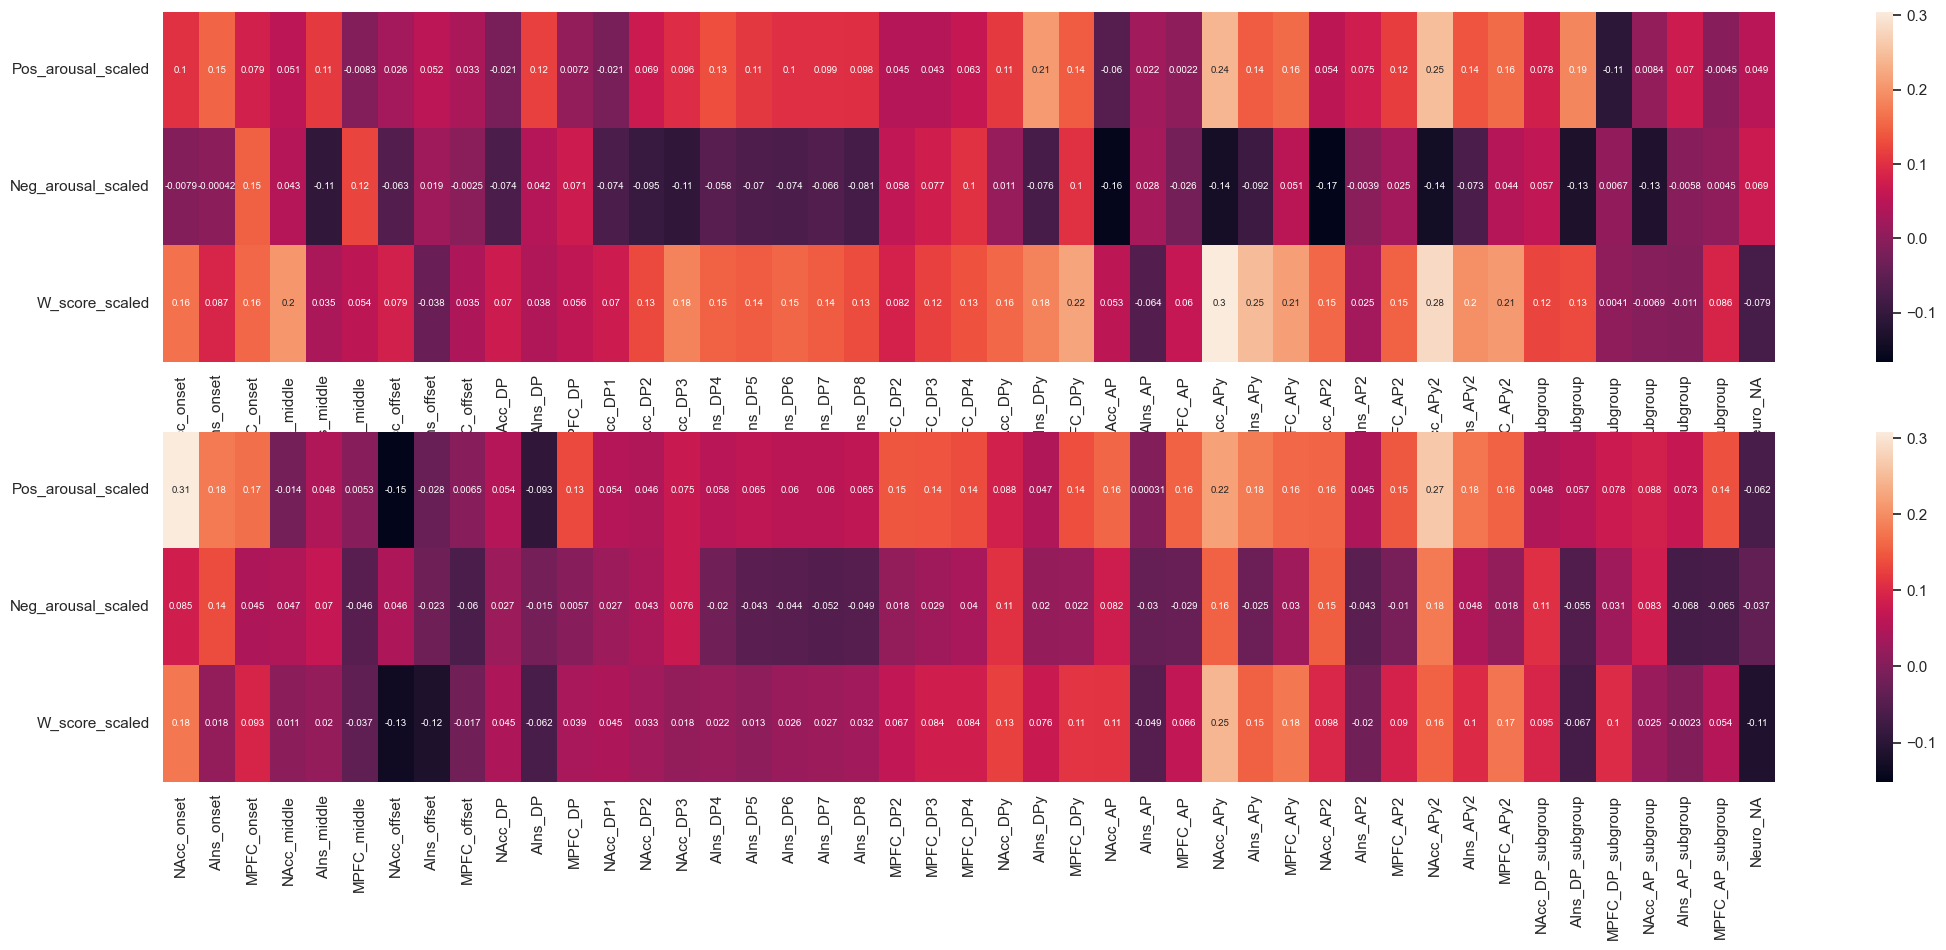

In [796]:
LC_df = all_subs_events_df[(all_subs_events_df["C_preference"] == "Like") & (all_subs_events_df["Type"] == "Comedy")]
DC_df = all_subs_events_df[(all_subs_events_df["C_preference"] == "Dislike") & (all_subs_events_df["Type"] == "Comedy")]

relevant_cols = ['Pos_arousal_scaled', 'Neg_arousal_scaled', 'W_score_scaled',
         'NAcc_onset', 'AIns_onset', 'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
         'NAcc_offset', 'AIns_offset', 'MPFC_offset', 
         #"NAcc_ISC", "AIns_ISC", "MPFC_ISC",
         #"NAcc_LC_ISC", "AIns_LC_ISC", "MPFC_LC_ISC", "NAcc_DC_ISC", "AIns_DC_ISC", "MPFC_DC_ISC",
        "NAcc_DP", "AIns_DP", "MPFC_DP",
        "NAcc_DP1", "NAcc_DP2", "NAcc_DP3",
        "AIns_DP4", "AIns_DP5", "AIns_DP6", "AIns_DP7", "AIns_DP8", 
        "MPFC_DP2", "MPFC_DP3", "MPFC_DP4",
        "NAcc_DPy", "AIns_DPy", "MPFC_DPy",
        #"NAcc_DS", "AIns_DS", "MPFC_DS",
        #"NAcc_DSy", "AIns_DSy", "MPFC_DSy",
        "NAcc_AP", "AIns_AP", "MPFC_AP",
       # AIns_AP4,AIns_AP5,AIns_AP6,AIns_AP7,AIns_AP8,
        "NAcc_APy", "AIns_APy", "MPFC_APy",
        "NAcc_AP2", "AIns_AP2", "MPFC_AP2", 
        "NAcc_APy2", "AIns_APy2", "MPFC_APy2",

        "NAcc_DP_subgroup", "AIns_DP_subgroup", "MPFC_DP_subgroup",
        "NAcc_AP_subgroup", "AIns_AP_subgroup", "MPFC_AP_subgroup",
         # "NAcc_avg_peak_pos2", "AIns_avg_peak_pos2", "MPFC_avg_peak_pos2",
         # "NAcc_avg_peak_yes_pos2" , 'AIns_avg_peak_yes_pos2', 'MPFC_avg_peak_yes_pos2', 
         # 'AIns_dem_peak_pos4', 'AIns_dem_peak_pos5', 'AIns_dem_peak_pos6', 'AIns_dem_peak_pos7',
         # 'AIns_avg_peak_pos4', 'AIns_avg_peak_pos5', 'AIns_avg_peak_pos6', 'AIns_avg_peak_pos7', 'AIns_avg_peak_pos8',
         # 'MPFC_dem_peak_pos2', 'MPFC_dem_peak_pos3', 'MPFC_dem_peak_pos4'
         ]

LC_df = LC_df[relevant_cols]
DC_df = DC_df[relevant_cols]

LC_df["Neuro_NA"] = (LC_df["AIns_offset"] - (LC_df["NAcc_DP"]/np.sqrt(2)))
DC_df["Neuro_NA"] = (DC_df["AIns_offset"] - (DC_df["NAcc_DP"]/np.sqrt(2)))

LC_df = LC_df.dropna()
DC_df = DC_df.dropna()

LC_corr = LC_df.corr()
DC_corr = DC_df.corr()

fig, axs = plt.subplots(2, 1, figsize=(26, 10), sharex=False)

sns.heatmap(LC_corr.iloc[:3, 3:], ax=axs[0], annot=True, annot_kws={'size':7})

sns.heatmap(DC_corr.iloc[:3, 3:], ax=axs[1], annot=True, annot_kws={'size':7})

# Format data for LMM analysis.

In [797]:
# Save data from individual choice analysis. 
all_subs_events_df.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_ISC.csv')
all_subs_events_comedy.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_ISC_Comedy.csv')
all_subs_events_horror.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_ISC_Horror.csv')

In [798]:
# Open a datasets directory. 
fd = os.open("/Users/la/Documents/GitHub/RM_Thesis_Neuroforecasting/ProcessedData", os.O_RDONLY)

# Use os.fchdir() method to change the current dir/folder.
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

root_path = os.getcwd()

Current working dir : /Users/la/Documents/GitHub/RM_Thesis_Neuroforecasting/ProcessedData


In [799]:
# # Filter some noise before calculating neural mean activation (for aggregate prediciton).

# drop_threshold1 = 3#2.5#1.25 #3 #1.25 #2.5
# drop_threshold2 = -3#-2.5#-1.25 #-3 #-1.25 #-2.5

# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_onset_z'] < drop_threshold1) | (all_subs_events_df['NAcc_onset_z'] < drop_threshold2) | 
#                                         (all_subs_events_df['AIns_onset_z'] < drop_threshold1) | (all_subs_events_df['AIns_onset_z'] < drop_threshold2) | 
#                                         (all_subs_events_df['MPFC_onset_z'] < drop_threshold1) | (all_subs_events_df['MPFC_onset_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_middle_z'] < drop_threshold1) | (all_subs_events_df['NAcc_middle_z'] < drop_threshold2) | 
#                                         (all_subs_events_df['AIns_middle_z'] < drop_threshold1) | (all_subs_events_df['AIns_middle_z'] < drop_threshold2) | 
#                                         (all_subs_events_df['MPFC_middle_z'] < drop_threshold1) | (all_subs_events_df['MPFC_middle_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_offset_z'] < drop_threshold1) | (all_subs_events_df['NAcc_offset_z'] < drop_threshold2) |
#                                         (all_subs_events_df['AIns_offset_z'] < drop_threshold1) | (all_subs_events_df['AIns_offset_z'] < drop_threshold2) |
#                                         (all_subs_events_df['MPFC_offset_z'] < drop_threshold1) | (all_subs_events_df['MPFC_offset_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_whole_z'] < drop_threshold1) | (all_subs_events_df['NAcc_whole_z'] < drop_threshold2) |
#                                         (all_subs_events_df['AIns_whole_z'] < drop_threshold1) | (all_subs_events_df['AIns_whole_z'] < drop_threshold2) |
#                                         (all_subs_events_df['MPFC_whole_z'] < drop_threshold1) | (all_subs_events_df['MPFC_whole_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_ind_peaks_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_ind_peaks_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['AIns_ind_peaks_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_ind_peaks_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['MPFC_ind_peaks_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_ind_peaks_pos_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_dem_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_dem_peak_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['AIns_dem_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_dem_peak_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['MPFC_dem_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_dem_peak_pos_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_dem_peak_pos_yes_z'] < drop_threshold1) | (all_subs_events_df['NAcc_dem_peak_pos_yes_z'] < drop_threshold2) |
#                                         (all_subs_events_df['AIns_dem_peak_pos_yes_z'] < drop_threshold1) | (all_subs_events_df['AIns_dem_peak_pos_yes_z'] < drop_threshold2) |
#                                         (all_subs_events_df['MPFC_dem_peak_pos_yes_z'] < drop_threshold1) | (all_subs_events_df['MPFC_dem_peak_pos_yes_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_avg_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_avg_peak_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['AIns_avg_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_avg_peak_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['MPFC_avg_peak_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_avg_peak_pos_z'] < drop_threshold2)]
# all_subs_events_df = all_subs_events_df[(all_subs_events_df['NAcc_avg_peak_yes_pos_z'] < drop_threshold1) | (all_subs_events_df['NAcc_avg_peak_yes_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['AIns_avg_peak_yes_pos_z'] < drop_threshold1) | (all_subs_events_df['AIns_avg_peak_yes_pos_z'] < drop_threshold2) |
#                                         (all_subs_events_df['MPFC_avg_peak_yes_pos_z'] < drop_threshold1) | (all_subs_events_df['MPFC_avg_peak_yes_pos_z'] < drop_threshold2)]

# print("The shape of the dataframe after dropping rows is: ", all_subs_events_df.shape)

In [800]:

# Add watch choice. 

all_subs_events_df["Watch_choice"] = np.where(all_subs_events_df["W_score"] < 3, "No", "Yes")



In [801]:
# Get average neural signals for each trailer. 
numeric_cols_agg = all_subs_events_df.select_dtypes(include=['number']).columns
aggregate_df = all_subs_events_df.groupby("Trailer", as_index=False, dropna=False)[numeric_cols_agg].mean()
aggregate_df.reset_index(inplace=True)

# Aggregate std 
aggregate_std_df = all_subs_events_df.groupby("Trailer", as_index=False, dropna=False)[numeric_cols_agg].std()
aggregate_std_df.reset_index(inplace=True)

# Create df with only people that said 'yes' to Watch questions. 
all_participants_cleaned_yes_df = all_participants_cleaned_df[all_participants_cleaned_df["Watch_choice"] == "Yes"]

numeric_cols_agg2 = all_participants_cleaned_yes_df.select_dtypes(include=['number']).columns
aggregate_yes_df = all_participants_cleaned_yes_df.groupby("Trailer", as_index=False, dropna=False)[numeric_cols_agg2].mean()
aggregate_yes_df.reset_index(inplace=True)

numeric_cols_agg3 = Like_horror_df.select_dtypes(include=['number']).columns
Like_horror_aggreate_df = Like_horror_df.groupby("Trailer", as_index=False, dropna=False)[numeric_cols_agg3].mean()
Like_horror_aggreate_df.reset_index(inplace=True)
Like_horror_aggreate_df["Type"] = "horror"

# Get average for Like-Comedy (LC).
LC_df = all_subs_events_df[(all_subs_events_df["C_preference"] == "Like") & (all_subs_events_df["Type"] == "Comedy")]
LC_aggregate_df = LC_df.groupby("Trailer", as_index=False, dropna=False)[numeric_cols_agg3].mean()
LC_aggregate_df.reset_index(inplace=True)
LC_aggregate_df["Type"] = "comedy"

LC_yes_df = all_subs_events_df[(all_participants_cleaned_df["Watch_choice"] == "Yes") & (all_subs_events_df["Type"] == "Comedy")]
LC_aggregate_yes_df = LC_yes_df.groupby("Trailer", as_index=False, dropna=False)[numeric_cols_agg3].mean()
LC_aggregate_yes_df.reset_index(inplace=True)
LC_aggregate_yes_df["Type"] = "comedy"

# Get average for Like-Horror (LH).
LH_df = all_subs_events_df[(all_subs_events_df["H_preference"] == "Like") & (all_subs_events_df["Type"] == "Horror")]
LH_aggregate_df = LH_df.groupby("Trailer", as_index=False, dropna=False)[numeric_cols_agg3].mean()
LH_aggregate_df.reset_index(inplace=True)
LH_aggregate_df["Type"] = "horror"

LH_yes_df = all_subs_events_df[(all_participants_cleaned_df["Watch_choice"] == "Yes") & (all_subs_events_df["Type"] == "Horror")]
LH_aggregate_yes_df = LH_yes_df.groupby("Trailer", as_index=False, dropna=False)[numeric_cols_agg3].mean()
LH_aggregate_yes_df.reset_index(inplace=True)
LH_aggregate_yes_df["Type"] = "horror"






/var/folders/6h/j6h8_h1d0sx06cyf77m5wmg40000gn/T/ipykernel_62418/3974993544.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LC_yes_df = all_subs_events_df[(all_participants_cleaned_df["Watch_choice"] == "Yes") & (all_subs_events_df["Type"] == "Comedy")]
/var/folders/6h/j6h8_h1d0sx06cyf77m5wmg40000gn/T/ipykernel_62418/3974993544.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LH_yes_df = all_subs_events_df[(all_participants_cleaned_df["Watch_choice"] == "Yes") & (all_subs_events_df["Type"] == "Horror")]


In [802]:
# Create lists to store values. 
NAcc_trailer_peak_pos = []
AIns_trailer_peak_pos = []
MPFC_trailer_peak_pos = []

NAcc_trailer_peak_pos_id = []
AIns_trailer_peak_pos_id = []
MPFC_trailer_peak_pos_id = []

NAcc_trailer_peak_pos_yes = []
AIns_trailer_peak_pos_yes = []
MPFC_trailer_peak_pos_yes = []

# Define keys. 
NAcc_TRs_keys = ['NAcc_TR1', 'NAcc_TR2', 'NAcc_TR3', 'NAcc_TR4', 'NAcc_TR5', 
                'NAcc_TR6', 'NAcc_TR7', 'NAcc_TR8', 'NAcc_TR9', 'NAcc_TR10',
                'NAcc_TR11', 'NAcc_TR12', 'NAcc_TR13', 'NAcc_TR14', 'NAcc_TR15']

AIns_TRs_keys = ['AIns_TR1', 'AIns_TR2', 'AIns_TR3', 'AIns_TR4', 'AIns_TR5',
                'AIns_TR6', 'AIns_TR7', 'AIns_TR8', 'AIns_TR9', 'AIns_TR10',
                'AIns_TR11', 'AIns_TR12', 'AIns_TR13', 'AIns_TR14', 'AIns_TR15']

MPFC_TRs_keys = ['MPFC_TR1', 'MPFC_TR2', 'MPFC_TR3', 'MPFC_TR4', 'MPFC_TR5',
                'MPFC_TR6', 'MPFC_TR7', 'MPFC_TR8', 'MPFC_TR9', 'MPFC_TR10',
                'MPFC_TR11', 'MPFC_TR12', 'MPFC_TR13', 'MPFC_TR14', 'MPFC_TR15']

# Calculate each trailer peak activation.
for trailer_id in range(aggregate_df.shape[0]):
    
    # Get time course for each region.
    NAcc_time_course = np.array(aggregate_df.iloc[trailer_id][NAcc_TRs_keys]).flatten()
    AIns_time_course = np.array(aggregate_df.iloc[trailer_id][AIns_TRs_keys]).flatten()
    MPFC_time_course = np.array(aggregate_df.iloc[trailer_id][MPFC_TRs_keys]).flatten()

    NAcc_time_course_yes = np.array(aggregate_yes_df.iloc[trailer_id][NAcc_TRs_keys]).flatten()
    AIns_time_course_yes = np.array(aggregate_yes_df.iloc[trailer_id][AIns_TRs_keys]).flatten()
    MPFC_time_course_yes = np.array(aggregate_yes_df.iloc[trailer_id][MPFC_TRs_keys]).flatten()

    # Get peak activation for each region.
    NAcc_peak_pos, NAcc_peak_pos_id = get_trailer_peak(NAcc_time_course, "max")
    AIns_peak_pos, AIns_peak_pos_id = get_trailer_peak(AIns_time_course, "max")
    MPFC_peak_pos, MPFC_peak_pos_id = get_trailer_peak(MPFC_time_course, "max")

    # NAcc_peak_neg = get_trailer_peak(NAcc_time_course, "min")
    # AIns_peak_neg = get_trailer_peak(AIns_time_course, "min")
    # MPFC_peak_neg = get_trailer_peak(MPFC_time_course, "min")

    NAcc_peak_pos_yes, _ = get_trailer_peak(NAcc_time_course_yes, "max")
    AIns_peak_pos_yes, _ = get_trailer_peak(AIns_time_course_yes, "max")
    MPFC_peak_pos_yes, _ = get_trailer_peak(MPFC_time_course_yes, "max")

    # Append values to lists.
    NAcc_trailer_peak_pos.append(NAcc_peak_pos)
    AIns_trailer_peak_pos.append(AIns_peak_pos)
    MPFC_trailer_peak_pos.append(MPFC_peak_pos)

    NAcc_trailer_peak_pos_id.append(NAcc_peak_pos_id)
    AIns_trailer_peak_pos_id.append(AIns_peak_pos_id)
    MPFC_trailer_peak_pos_id.append(MPFC_peak_pos_id)

    # NAcc_trailer_peak_neg.append(NAcc_peak_neg)
    # AIns_trailer_peak_neg.append(AIns_peak_neg)
    # MPFC_trailer_peak_neg.append(MPFC_peak_neg)

    NAcc_trailer_peak_pos_yes.append(NAcc_peak_pos_yes)
    AIns_trailer_peak_pos_yes.append(AIns_peak_pos_yes)
    MPFC_trailer_peak_pos_yes.append(MPFC_peak_pos_yes)

# Add values to dataframe.
aggregate_df["NAcc_trailer_peak_pos"] = NAcc_trailer_peak_pos
aggregate_df["AIns_trailer_peak_pos"] = AIns_trailer_peak_pos
aggregate_df["MPFC_trailer_peak_pos"] = MPFC_trailer_peak_pos

aggregate_df["NAcc_trailer_peak_pos_id"] = NAcc_trailer_peak_pos_id
aggregate_df["AIns_trailer_peak_pos_id"] = AIns_trailer_peak_pos_id
aggregate_df["MPFC_trailer_peak_pos_id"] = MPFC_trailer_peak_pos_id

# aggregate_df["NAcc_trailer_peak_neg"] = NAcc_trailer_peak_neg
# aggregate_df["AIns_trailer_peak_neg"] = AIns_trailer_peak_neg
# aggregate_df["MPFC_trailer_peak_neg"] = MPFC_trailer_peak_neg

aggregate_df["NAcc_trailer_peak_pos_yes"] = NAcc_trailer_peak_pos_yes
aggregate_df["AIns_trailer_peak_pos_yes"] = AIns_trailer_peak_pos_yes
aggregate_df["MPFC_trailer_peak_pos_yes"] = MPFC_trailer_peak_pos_yes

aggregate_df.head()

index Trailer  W_score   A_score  F_score  NAcc_onset  AIns_onset  \
0      0     rc1  2.96875  2.437500  3.50000    0.091758   -0.047190   
1      1    rc10  2.20000  2.000000  3.00000    0.021055   -0.071408   
2      2    rc11  2.03125  1.750000  3.28125   -0.000283    0.030399   
3      3    rc12  1.83871  1.677419  2.83871   -0.036675   -0.038851   
4      4     rc2  1.93750  1.718750  2.90625    0.031891   -0.017787   

   MPFC_onset  NAcc_middle  AIns_middle  ...  MPFC_avg_peak_subgroup_z  \
0   -0.004631     0.001545    -0.086272  ...                  0.715591   
1    0.156915     0.022117    -0.041039  ...                  0.142787   
2    0.094751    -0.020650    -0.041286  ...                  0.273660   
3   -0.101854     0.029841    -0.019466  ...                  0.594365   
4    0.108850    -0.033260    -0.080499  ...                  0.423318   

   NAcc_trailer_peak_pos  AIns_trailer_peak_pos  MPFC_trailer_peak_pos  \
0               0.087230               0.031106               0.157673   
1               0.052958               0.012481               0.340816   
2               0.057067               0.041309               0.127522   
3               0.059800               0.100309               0.148752   
4               0.048327               0.035780               0.236499   

   NAcc_trailer_peak_pos_id  AIns_trailer_peak_pos_id  \
0                         3                        14   
1                        11                        14   
2                        13                         2   
3                         9                         0   
4                         1                         0   

   MPFC_trailer_peak_pos_id  NAcc_trailer_peak_pos_yes  \
0                        11                   0.115278   
1                        11                   0.112936   
2                         2                   0.084314   
3                         9                   0.169802   
4                         0                   0.065927   

   AIns_trailer_peak_pos_yes  MPFC_trailer_peak_pos_yes  
0                   0.044016                   0.202797  
1                   0.075656                   0.367871  
2                   0.091204                   0.222316  
3                   0.147217                   0.418064  
4                   0.084663                   0.362022  

[5 rows x 257 columns]

In [803]:
# Get list of trailers in dataframe.
all_trailer_list = aggregate_df["Trailer"].unique().tolist()
horror_trailer_list = aggregate_df["Trailer"].unique().tolist()
comedy_trailer_list = LC_df["Trailer"].unique().tolist()

# Calculate trailer peak for horror sub-group. 
NAcc_trailer_peak_pos_LH = []
AIns_trailer_peak_pos_LH = []
MPFC_trailer_peak_pos_LH = []

NAcc_trailer_peak_yes_LH = []
AIns_trailer_peak_yes_LH = []
MPFC_trailer_peak_yes_LH = []

# Calculate each trailer peak activation.
for num_id in range(LH_aggregate_df.shape[0]):

    NAcc_time_course_LH = np.array(LH_aggregate_df.iloc[num_id][NAcc_TRs_keys]).flatten()
    AIns_time_course_LH = np.array(LH_aggregate_df.iloc[num_id][AIns_TRs_keys]).flatten()
    MPFC_time_course_LH = np.array(LH_aggregate_df.iloc[num_id][MPFC_TRs_keys]).flatten()

    NAcc_time_course_yes_LH = np.array(LH_aggregate_yes_df.iloc[num_id][NAcc_TRs_keys]).flatten()
    AIns_time_course_yes_LH = np.array(LH_aggregate_yes_df.iloc[num_id][AIns_TRs_keys]).flatten()
    MPFC_time_course_yes_LH = np.array(LH_aggregate_yes_df.iloc[num_id][MPFC_TRs_keys]).flatten()

    NAcc_peak_pos_LH, _ = get_trailer_peak(NAcc_time_course_LH, "max")
    AIns_peak_pos_LH, _ = get_trailer_peak(AIns_time_course_LH, "max")
    MPFC_peak_pos_LH, _ = get_trailer_peak(MPFC_time_course_LH, "max")

    NAcc_peak_pos_yes_LH, _ = get_trailer_peak(NAcc_time_course_yes_LH, "max")
    AIns_peak_pos_yes_LH, _ = get_trailer_peak(AIns_time_course_yes_LH, "max")
    MPFC_peak_pos_yes_LH, _ = get_trailer_peak(MPFC_time_course_yes_LH, "max")

    NAcc_trailer_peak_pos_LH.append(NAcc_peak_pos_LH)
    AIns_trailer_peak_pos_LH.append(AIns_peak_pos_LH)
    MPFC_trailer_peak_pos_LH.append(MPFC_peak_pos_LH)

    NAcc_trailer_peak_yes_LH.append(NAcc_peak_pos_yes_LH)
    AIns_trailer_peak_yes_LH.append(AIns_peak_pos_yes_LH)
    MPFC_trailer_peak_yes_LH.append(MPFC_peak_pos_yes_LH)

LH_aggregate_df["NAcc_trailer_peak_pos"] = NAcc_trailer_peak_pos_LH
LH_aggregate_df["AIns_trailer_peak_pos"] = AIns_trailer_peak_pos_LH
LH_aggregate_df["MPFC_trailer_peak_pos"] = MPFC_trailer_peak_pos_LH

LH_aggregate_df["NAcc_trailer_peak_pos_yes"] = NAcc_trailer_peak_yes_LH 
LH_aggregate_df["AIns_trailer_peak_pos_yes"] = AIns_trailer_peak_yes_LH
LH_aggregate_df["MPFC_trailer_peak_pos_yes"] = MPFC_trailer_peak_yes_LH



In [804]:
# Calculate trailer peak for comedy sub-group. 
NAcc_trailer_peak_pos_LC = []
AIns_trailer_peak_pos_LC = []
MPFC_trailer_peak_pos_LC = []

NAcc_trailer_peak_yes_LC = []
AIns_trailer_peak_yes_LC = []
MPFC_trailer_peak_yes_LC = []

# Calculate each trailer peak activation.
for trailer_id in range(LC_df["Trailer"].unique().shape[0]):

    NAcc_time_course_LC = np.array(LC_aggregate_df.iloc[trailer_id][NAcc_TRs_keys]).flatten()
    AIns_time_course_LC = np.array(LC_aggregate_df.iloc[trailer_id][AIns_TRs_keys]).flatten()
    MPFC_time_course_LC = np.array(LC_aggregate_df.iloc[trailer_id][MPFC_TRs_keys]).flatten()

    NAcc_time_course_yes_LC = np.array(LC_aggregate_yes_df.iloc[trailer_id][NAcc_TRs_keys]).flatten()
    AIns_time_course_yes_LC = np.array(LC_aggregate_yes_df.iloc[trailer_id][AIns_TRs_keys]).flatten()
    MPFC_time_course_yes_LC = np.array(LC_aggregate_yes_df.iloc[trailer_id][MPFC_TRs_keys]).flatten()

    NAcc_peak_pos_LC, _ = get_trailer_peak(NAcc_time_course_LC, "max")
    AIns_peak_pos_LC, _ = get_trailer_peak(AIns_time_course_LC, "max")
    MPFC_peak_pos_LC, _ = get_trailer_peak(MPFC_time_course_LC, "max")

    NAcc_peak_pos_yes_LC, _ = get_trailer_peak(NAcc_time_course_yes_LC, "max")
    AIns_peak_pos_yes_LC, _ = get_trailer_peak(AIns_time_course_yes_LC, "max")
    MPFC_peak_pos_yes_LC, _ = get_trailer_peak(MPFC_time_course_yes_LC, "max")

    NAcc_trailer_peak_pos_LC.append(NAcc_peak_pos_LC)
    AIns_trailer_peak_pos_LC.append(AIns_peak_pos_LC)
    MPFC_trailer_peak_pos_LC.append(MPFC_peak_pos_LC)

    NAcc_trailer_peak_yes_LC.append(NAcc_peak_pos_yes_LC)
    AIns_trailer_peak_yes_LC.append(AIns_peak_pos_yes_LC)
    MPFC_trailer_peak_yes_LC.append(MPFC_peak_pos_yes_LC)

LC_aggregate_df["NAcc_trailer_peak_pos"] = NAcc_trailer_peak_pos_LC
LC_aggregate_df["AIns_trailer_peak_pos"] = AIns_trailer_peak_pos_LC
LC_aggregate_df["MPFC_trailer_peak_pos"] = MPFC_trailer_peak_pos_LC

LC_aggregate_df["NAcc_trailer_peak_pos_yes"] = NAcc_trailer_peak_yes_LC
LC_aggregate_df["AIns_trailer_peak_pos_yes"] = AIns_trailer_peak_yes_LC
LC_aggregate_df["MPFC_trailer_peak_pos_yes"] = MPFC_trailer_peak_yes_LC



In [805]:
# After dropping outliers from the neural activation data, save the new dataframe to a csv file.
# Calculate the mean measures for each trailer accross participants.
#aggregate_df = all_participants_cleaned_df.groupby("Trailer", as_index=False, dropna=False).mean()
#aggregate_df.reset_index(inplace=True)

type_list = []
for id_trailer in range(len(aggregate_df)):
    if "c" in aggregate_df["Trailer"][id_trailer]:
        type_list.append("comedy")
    else:
        type_list.append("horror")

aggregate_df["Type"] = type_list

# I'm not sure why, but I am loosing the 'W_score' column. 
# I will add it back to the dataframe.
w_scores_dict = {}
for trailer_id in all_subs_events_df["Trailer"].unique():
    current_trailer_mean_w_score = all_subs_events_df[all_subs_events_df["Trailer"] == trailer_id]["W_score"].mean()
    w_scores_dict[trailer_id] = current_trailer_mean_w_score

w_scores_list = []
for trailer_id in aggregate_df["Trailer"].unique():
    w_scores_list.append(w_scores_dict[trailer_id])

aggregate_df["W_score"] = w_scores_list


# Re-order columns.
cols_ordered = ['Trailer', 'Type', #'Onset', 'Offset', 
                'Pos_arousal', 'Neg_arousal',
        'Pos_arousal_scaled', 'Neg_arousal_scaled', 'W_score', 'W_score_scaled',
        'NAcc_onset', 'AIns_onset', 'MPFC_onset',
        'NAcc_middle', 'AIns_middle', 'MPFC_middle', 'NAcc_offset',
        'AIns_offset', 'MPFC_offset', 'NAcc_whole', 'AIns_whole', 'MPFC_whole',
        #'NAcc_onset_z', 'AIns_onset_z', 'MPFC_onset_z', 'NAcc_middle_z',
        #'AIns_middle_z', 'MPFC_middle_z', 'NAcc_offset_z', 'AIns_offset_z',
        #'MPFC_offset_z',v'NAcc_whole_z', 'AIns_whole_z', 'MPFC_whole_z', 
        "NAcc_ind_peaks_pos", "AIns_ind_peaks_pos", "MPFC_ind_peaks_pos",
        #"NAcc_ind_peaks_neg", "AIns_ind_peaks_neg", "MPFC_ind_peaks_neg",
        "NAcc_trailer_peak_pos", "AIns_trailer_peak_pos", "MPFC_trailer_peak_pos",
        #"NAcc_trailer_peak_pos_id", "AIns_trailer_peak_pos_id", "MPFC_trailer_peak_pos_id",
        #"NAcc_trailer_peak_neg", "AIns_trailer_peak_neg", "MPFC_trailer_peak_neg",
        "NAcc_trailer_peak_pos_yes", "AIns_trailer_peak_pos_yes", "MPFC_trailer_peak_pos_yes",
        #'NAcc_pos_peak','AIns_pos_peak', 'MPFC_pos_peak', 
        #'NAcc_neg_peak','AIns_neg_peak', 'MPFC_neg_peak',
        #'NAcc_w', 'AIns_w', 'MPFC_w', 'NAcc_f', 'AIns_f', 'MPFC_f',
        #'NAcc_a', 'AIns_a', 'MPFC_a', 
  
        "NAcc_DP", "AIns_DP", "MPFC_DP",
        "NAcc_DP1", "NAcc_DP2", "NAcc_DP3",
        "AIns_DP4", "AIns_DP5", "AIns_DP6", "AIns_DP7", "AIns_DP8",
        "MPFC_DP2", "MPFC_DP3", "MPFC_DP4",
        "NAcc_DPy", "AIns_DPy", "MPFC_DPy",
        #"NAcc_DS", "AIns_DS", "MPFC_DS",
        #"NAcc_DSy", "AIns_DSy", "MPFC_DSy",
        "NAcc_AP", "AIns_AP", "MPFC_AP",
        "NAcc_APy", "AIns_APy", "MPFC_APy",
        "NAcc_AP2", "AIns_AP2", "MPFC_AP2",
        "NAcc_APy2", "AIns_APy2", "MPFC_APy2",

        "NAcc_DP_subgroup", "AIns_DP_subgroup", "MPFC_DP_subgroup",
        "NAcc_AP_subgroup", "AIns_AP_subgroup", "MPFC_AP_subgroup",

        "NAcc_seg1", "NAcc_seg2", "NAcc_seg3", "NAcc_seg4", "NAcc_seg5",
        "AIns_seg1", "AIns_seg2", "AIns_seg3", "AIns_seg4", "AIns_seg5",
        "MPFC_seg1", "MPFC_seg2", "MPFC_seg3", "MPFC_seg4", "MPFC_seg5",
        # 'NAcc_slope_peak', 'AIns_slope_peak', 'MPFC_slope_peak', 
        "NAcc_TR1" , "NAcc_TR2", "NAcc_TR3", "NAcc_TR4", "NAcc_TR5", "NAcc_TR6", "NAcc_TR7", "NAcc_TR8",
        "NAcc_TR9", "NAcc_TR10", "NAcc_TR11", "NAcc_TR12", "NAcc_TR13", "NAcc_TR14", "NAcc_TR15",
        "AIns_TR1" , "AIns_TR2", "AIns_TR3", "AIns_TR4", "AIns_TR5", "AIns_TR6", "AIns_TR7", "AIns_TR8",
        "AIns_TR9", "AIns_TR10", "AIns_TR11", "AIns_TR12", "AIns_TR13", "AIns_TR14", "AIns_TR15",
        "MPFC_TR1" , "MPFC_TR2", "MPFC_TR3", "MPFC_TR4", "MPFC_TR5", "MPFC_TR6", "MPFC_TR7", "MPFC_TR8",
        "MPFC_TR9", "MPFC_TR10", "MPFC_TR11", "MPFC_TR12", "MPFC_TR13", "MPFC_TR14", "MPFC_TR15",
        #'NAcc_slope_peak_avg', 'AIns_slope_peak_avg', 'MPFC_slope_peak_avg', 
        #'NAcc_narrow_slope_peak',
        #'AIns_narrow_slope_peak', 'MPFC_narrow_slope_peak',
        #'NAcc_narrow_slope_peak_avg', 'AIns_narrow_slope_peak_avg',
        #'MPFC_narrow_slope_peak_avg', 
        #'NAcc_delta_peak', 'AIns_delta_peak',
        #'MPFC_delta_peak', 'NAcc_delta_peak_avg', 'AIns_delta_peak_avg',
        #'MPFC_delta_peak_avg', 
        #'NAcc_narrow_delta_peak',
        #'AIns_narrow_delta_peak', 'MPFC_narrow_delta_peak',
        #'NAcc_narrow_delta_peak_avg', 'AIns_narrow_delta_peak_avg',
        #'MPFC_narrow_delta_peak_avg', 
        #'NAcc_ISC', 'AIns_ISC', 'MPFC_ISC'
        ]

aggregate_df = aggregate_df[cols_ordered]
LH_aggregate_df = LH_aggregate_df[cols_ordered]
LC_aggregate_df = LC_aggregate_df[cols_ordered]

root_path = os.getcwd()

aggregate_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_clean.csv", index=True)
aggregate_df

Trailer    Type  Pos_arousal  Neg_arousal  Pos_arousal_scaled  \
0      rc1  comedy     1.905857    -0.389718            0.332642   
1     rc10  comedy     1.605912    -0.342208            0.022097   
2     rc11  comedy     1.600590    -0.413022            0.027375   
3     rc12  comedy     1.405379    -0.273674           -0.172965   
4      rc2  comedy     1.510031    -0.329841           -0.063184   
5      rc3  comedy     1.655792    -0.363043            0.077448   
6      rc4  comedy     2.054176    -0.413643            0.480961   
7      rc5  comedy     1.581153    -0.176747            0.063582   
8      rc6  comedy     1.542624    -0.303607           -0.030590   
9      rc7  comedy     1.576731    -0.541659            0.003517   
10     rc8  comedy     1.585585    -0.319234            0.012371   
11     rc9  comedy     1.770584    -0.275913            0.197370   
12     rh1  horror     1.557148     0.353781           -0.021196   
13    rh10  horror     1.503353     0.227396           -0.069861   
14    rh11  horror     1.568686     0.590103           -0.004528   
15    rh12  horror     1.610872     0.485818            0.037657   
16     rh2  horror     1.498356     0.193290           -0.074858   
17     rh3  horror     1.421192     0.237125           -0.157152   
18     rh4  horror     1.253721     0.282699           -0.319493   
19     rh5  horror     1.345273     0.117970           -0.227941   
20     rh6  horror     1.443646     0.043328           -0.140169   
21     rh7  horror     1.419246     0.500936           -0.170417   
22     rh8  horror     1.465167     0.609390           -0.113177   
23     rh9  horror     1.464446     0.009012           -0.108769   
24     uc1  comedy     1.720345    -0.224995            0.147131   
25     uc2  comedy     1.613467    -0.375962            0.035123   
26     uc3  comedy     1.826267    -0.365852            0.253052   
27     uc4  comedy     1.928499    -0.343809            0.355284   
28     uh1  horror     1.580468     0.415690            0.002125   
29     uh2  horror     1.595347     0.100807            0.017004   
30     uh3  horror     1.542299     0.303392           -0.036044   
31     uh4  horror     1.403384     0.152574           -0.169830   

    Neg_arousal_scaled   W_score  W_score_scaled  NAcc_onset  AIns_onset  ...  \
0            -0.360894  2.968750        0.745117    0.091758   -0.047190  ...   
1            -0.311462  2.200000       -0.021875    0.021055   -0.071408  ...   
2            -0.384198  2.031250       -0.233398   -0.000283    0.030399  ...   
3            -0.243920  1.838710       -0.442540   -0.036675   -0.038851  ...   
4            -0.301017  1.937500       -0.327148    0.031891   -0.017787  ...   
5            -0.333289  2.548387        0.321573    0.016355   -0.009674  ...   
6            -0.384819  3.218750        0.995117    0.033141    0.001490  ...   
7            -0.150373  2.451613        0.186492    0.037035    0.055559  ...   
8            -0.274783  2.187500       -0.077148    0.010618    0.040946  ...   
9            -0.512834  1.937500       -0.286133    0.033238    0.033037  ...   
10           -0.290409  2.281250        0.057617   -0.017708   -0.025386  ...   
11           -0.247089  2.375000        0.110352    0.008628    0.014509  ...   
12            0.383535  2.612903        0.337702   -0.020469    0.008357  ...   
13            0.256221  1.812500       -0.411133    0.024823   -0.001927  ...   
14            0.618927  2.125000       -0.139648    0.036881   -0.015145  ...   
15            0.514642  2.218750       -0.004883    0.076283   -0.036706  ...   
16            0.222114  2.437500        0.172852    0.049856   -0.002819  ...   
17            0.266879  2.161290       -0.107863    0.024033    0.017399  ...   
18            0.311523  1.812500       -0.411133   -0.028758    0.000982  ...   
19            0.146794  1.843750       -0.379883    0.008456   -0.009922  ...   
20            0.074074  2.000000       -0.263542    0.095

In [806]:
# Read aggregate metrics dataframe. 
aggregate_metricts_path = "/Users/la/Documents/SpanLab/Aggregate_metrics_final.csv"
aggregate_metricts_path2 = "/Users/la/Documents/SpanLab/Aggregate_metrics3.csv"
aggregate_metricts_path3 = "/Users/la/Documents/SpanLab/fmrimatch_aggregate_updated.csv"

#aggregate_metrics_df = pd.read_csv(aggregate_metricts_path)#.dropna(subset=['Gross_World_num'], inplace=True)
#aggregate_metrics_df2 = pd.read_csv(aggregate_metricts_path2)
aggregate_metrics_df3 = pd.read_csv(aggregate_metricts_path3)

# Remove nan.
#aggregate_metrics_df.dropna(subset=['Gross_World_num'], inplace=True)
#aggregate_metrics_df2.dropna(subset=['NumT_WK2'], inplace=True)
aggregate_metrics_df3.dropna(subset=['NumT_WK2_U'], inplace=True)

#print(aggregate_metrics_df.shape)
#print(aggregate_metrics_df2.shape)
print(aggregate_metrics_df3.shape)

#aggregate_metrics_df.reset_index(inplace=True)
#aggregate_metrics_df2.reset_index(inplace=True)
#aggregate_metrics_df=aggregate_metrics_df.join(aggregate_metrics_df2.set_index('label'), on='label', rsuffix='2')
#aggregate_metrics_df=aggregate_metrics_df.join(aggregate_metrics_df3.set_index('label'), on='label', rsuffix='3')
#print(aggregate_metrics_df.shape)
#aggregate_metrics_df.head(30)
aggregate_metrics_df3.head()

(30, 19)


title label    year Release_date genre  released  \
0                      Joy Ride   rc1  2023.0        7-Jul     c       1.0   
2                  80 For Brady   rc2  2023.0        3-Feb     c       1.0   
4             A Man Called Otto   rc3  2022.0       30-Dec     c       1.0   
6  Puss in Boots: The Last Wish   rc4  2022.0       21-Dec     c       1.0   
8                        Strays   rc5  2023.0       18-Aug     c       1.0   

                                                url  Domestic_Gross  \
0  https://youtu.be/UCtE8zur6CM?si=-GWf51SuzzcGCwgH      12897789.0   
2  https://youtu.be/-UeGXB2NjR8?si=JU3SbpBjbO05o2xl      39330588.0   
4                      https://youtu.be/eFYUX9l-m5I      64267657.0   
6  https://youtu.be/RqrXhwS33yc?si=jhP7bbiB2SUukjNb     185535345.0   
8  https://youtu.be/26Xq6_g2r6Q?si=W1w0lLc7rlqiJ8TI      23988885.0   

   Worldwide_Gross  Domestic_Openning  Theaters_Num    DG_WK1_U  NumT_WK1_U  \
0       15518636.0          2611969.0        2820.0   8041997.0      2820.0   
2       40266090.0          4625369.0        3912.0  18969658.0      3912.0   
4      108641148.0          1555761.0           4.0     85480.0         4.0   
6      484643149.0          3200250.0        4099.0   6102855.0      4099.0   
8       35316418.0          3427540.0        3223.0  11476230.0      3223.0   

     DG_WK2_U  NumT_WK2_U    DG_WK3_U  NumT_WK3_U    DG_WK4_U  NumT_WK4_U  
0   4126183.0      2820.0    590993.0       335.0    138616.0        66.0  
2   9678153.0      3939.0   5969470.0      3119.0   2856102.0      2397.0  
4   6137646.0       637.0  20123123.0      3802.0  12956615.0      3802.0  
6  38304475.0      4115.0  20436665.0      3977.0  22381420.0      3919.0  
8   6734995.0      3232.0   3833775.0      2486.0   1191435.0      1500.0

In [807]:
# Join both dataframes.
aggregate_combined_df = aggregate_df.set_index('Trailer').join(aggregate_metrics_df3.set_index('label'), on='Trailer')   
#aggregate_combined_df = aggregate_df.merge(aggregate_metrics_df, left_on='Trailer', right_on='Trailer', how='outer')

aggregate_combined_df.dropna(subset=['DG_WK1_U'], inplace=True)

aggregate_combined_df.reset_index(inplace=True)

aggregate_combined_col = aggregate_combined_df.columns

print("The shape of the combined dataframe is: ", aggregate_combined_df.shape)

columns_to_drop = ["Onset", "Offset", 
                   #'NAcc_pos_peak','AIns_pos_peak', 'MPFC_pos_peak',
       #'NAcc_neg_peak', 'AIns_neg_peak',
       #'MPFC_neg_peak', #'NAcc_slope_peak', 'AIns_slope_peak',
       #'MPFC_slope_peak', 'NAcc_slope_peak_avg', 'AIns_slope_peak_avg', 'MPFC_slope_peak_avg', 
       #'NAcc_narrow_slope_peak', 'AIns_narrow_slope_peak', 'MPFC_narrow_slope_peak',
       #'NAcc_narrow_slope_peak_avg', 'AIns_narrow_slope_peak_avg', 'MPFC_narrow_slope_peak_avg', 
       #'NAcc_delta_peak', 'AIns_delta_peak',
       #'MPFC_delta_peak', 'NAcc_delta_peak_avg', 'AIns_delta_peak_avg','MPFC_delta_peak_avg', 
       #'NAcc_narrow_delta_peak', 'AIns_narrow_delta_peak', 'MPFC_narrow_delta_peak',
       #'NAcc_narrow_delta_peak_avg', 'AIns_narrow_delta_peak_avg', 'MPFC_narrow_delta_peak_avg', 
       'year', 'Release time', 'genre',
       'released (1 = yes, 0 = no)', 'url to trailer', #'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 39', 'Unnamed: 40'
       'The tool used to get the thumbnail: https://youtu.be/otNh9bTjXWg?si=NJaRcikG3tZUpNBl , size of thumbnail 640*480',
       'downloaded', 'video trimmed', 'audio extracted', 'budget']

# Drop columns that are not needed.
#aggregate_combined_df.drop(columns=columns_to_drop, inplace=True) 
print("After dropping columns, the shape of the combined dataframe is: ", aggregate_combined_df.shape)

# Calculate first month gross for US.
#aggregate_combined_df["Gross_US_M1"] = aggregate_combined_df["Gross_US_W4_num"] 
#aggregate_combined_df["Theaters_US_M1"] = aggregate_combined_df["Theaters_US_W1_num"] + aggregate_combined_df["Theaters_US_W2_num"] + aggregate_combined_df["Theaters_US_W3_num"] + aggregate_combined_df["Theaters_US_W4_num"]

aggregate_combined_df["Gross_M1_updated"] = aggregate_combined_df["DG_WK1_U"] + aggregate_combined_df["DG_WK2_U"] + aggregate_combined_df["DG_WK3_U"] + aggregate_combined_df["DG_WK4_U"]
aggregate_combined_df["Gross_M1_updated_rank"] = aggregate_combined_df["Gross_M1_updated"].rank()
aggregate_combined_df["Gross_M1_updated_log"] = np.log(aggregate_combined_df["Gross_M1_updated"])

aggregate_combined_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate.csv", index=True)

# Save the new dataframe to a csv file.
aggregate_comedy_df = aggregate_combined_df[aggregate_combined_df["Type"] == "comedy"]
aggregate_comedy_df.reset_index(drop=True, inplace=True)
aggregate_comedy_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_comedy.csv", index=True)

# Save the new dataframe to a csv file.
aggregate_horror_df = aggregate_combined_df[aggregate_combined_df["Type"] == "horror"]
aggregate_horror_df.reset_index(drop=True, inplace=True)
aggregate_horror_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_horror.csv", index=True)

aggregate_combined_df.head(30)


The shape of the combined dataframe is:  (30, 142)
After dropping columns, the shape of the combined dataframe is:  (30, 142)


Trailer    Type  Pos_arousal  Neg_arousal  Pos_arousal_scaled  \
0      rc1  comedy     1.905857    -0.389718            0.332642   
1     rc10  comedy     1.605912    -0.342208            0.022097   
2     rc11  comedy     1.600590    -0.413022            0.027375   
3     rc12  comedy     1.405379    -0.273674           -0.172965   
4      rc2  comedy     1.510031    -0.329841           -0.063184   
5      rc3  comedy     1.655792    -0.363043            0.077448   
6      rc4  comedy     2.054176    -0.413643            0.480961   
7      rc5  comedy     1.581153    -0.176747            0.063582   
8      rc6  comedy     1.542624    -0.303607           -0.030590   
9      rc7  comedy     1.576731    -0.541659            0.003517   
10     rc8  comedy     1.585585    -0.319234            0.012371   
11     rc9  comedy     1.770584    -0.275913            0.197370   
12     rh1  horror     1.557148     0.353781           -0.021196   
13    rh10  horror     1.503353     0.227396           -0.069861   
14    rh11  horror     1.568686     0.590103           -0.004528   
15    rh12  horror     1.610872     0.485818            0.037657   
16     rh2  horror     1.498356     0.193290           -0.074858   
17     rh3  horror     1.421192     0.237125           -0.157152   
18     rh4  horror     1.253721     0.282699           -0.319493   
19     rh5  horror     1.345273     0.117970           -0.227941   
20     rh6  horror     1.443646     0.043328           -0.140169   
21     rh7  horror     1.419246     0.500936           -0.170417   
22     rh8  horror     1.465167     0.609390           -0.113177   
23     rh9  horror     1.464446     0.009012           -0.108769   
24     uc1  comedy     1.720345    -0.224995            0.147131   
25     uc2  comedy     1.613467    -0.375962            0.035123   
26     uc3  comedy     1.826267    -0.365852            0.253052   
27     uc4  comedy     1.928499    -0.343809            0.355284   
28     uh1  horror     1.580468     0.415690            0.002125   
29     uh2  horror     1.595347     0.100807            0.017004   

    Neg_arousal_scaled   W_score  W_score_scaled  NAcc_onset  AIns_onset  ...  \
0            -0.360894  2.968750        0.745117    0.091758   -0.047190  ...   
1            -0.311462  2.200000       -0.021875    0.021055   -0.071408  ...   
2            -0.384198  2.031250       -0.233398   -0.000283    0.030399  ...   
3            -0.243920  1.838710       -0.442540   -0.036675   -0.038851  ...   
4            -0.301017  1.937500       -0.327148    0.031891   -0.017787  ...   
5            -0.333289  2.548387        0.321573    0.016355   -0.009674  ...   
6            -0.384819  3.218750        0.995117    0.033141    0.001490  ...   
7            -0.150373  2.451613        0.186492    0.037035    0.055559  ...   
8            -0.274783  2.187500       -0.077148    0.010618    0.040946  ...   
9            -0.512834  1.937500       -0.286133    0.033238    0.033037  ...   
10           -0.290409  2.281250        0.057617   -0.017708   -0.025386  ...   
11           -0.247089  2.375000        0.110352    0.008628    0.014509  ...   
12            0.383535  2.612903        0.337702   -0.020469    0.008357  ...   
13            0.256221  1.812500       -0.411133    0.024823   -0.001927  ...   
14            0.618927  2.125000       -0.139648    0.036881   -0.015145  ...   
15            0.514642  2.218750       -0.004883    0.076283   -0.036706  ...   
16            0.222114  2.437500        0.172852    0.049856   -0.002819  ...   
17            0.266879  2.161290       -0.107863    0.024033    0.017399  ...   
18            0.311523  1.812500       -0.411133   -0.028758    0.000982  ...   
19            0.146794  1.843750       -0.379883    0.008456   -0.009922  ...   
20            0.074074  2.000000       -0.263542    0.095322    0.082768  ...   
21            0.532742  1.758621       -0.451509    0.008013    0.007629  ...   
22            0.639144  1.67741

In [808]:
# # Process aggregate combined for LC and LH sub-groups.
LC_aggregate_combined_df = LC_aggregate_df.set_index('Trailer').join(aggregate_metrics_df3.set_index('label'))
LC_aggregate_combined_df.dropna(subset=['DG_WK1_U'], inplace=True)
LC_aggregate_combined_df.reset_index(inplace=True)

LH_aggregate_combined_df = LH_aggregate_df.set_index('Trailer').join(aggregate_metrics_df3.set_index('label'))
LH_aggregate_combined_df.dropna(subset=['DG_WK1_U'], inplace=True)
LH_aggregate_combined_df.reset_index(inplace=True)

# # Drop columns that are not needed.
#LC_aggregate_combined_df.drop(columns=columns_to_drop, inplace=True)
#LH_aggregate_combined_df.drop(columns=columns_to_drop, inplace=True)

# # Calculate first month gross for US.
LC_aggregate_combined_df["Gross_M1_updated"] = LC_aggregate_combined_df["DG_WK1_U"] + LC_aggregate_combined_df["DG_WK2_U"] + LC_aggregate_combined_df["DG_WK3_U"] + LC_aggregate_combined_df["DG_WK4_U"]
LC_aggregate_combined_df["Gross_M1_updated_rank"] = LC_aggregate_combined_df["Gross_M1_updated"].rank()
LC_aggregate_combined_df["Gross_M1_updated_log"] = np.log(LC_aggregate_combined_df["Gross_M1_updated"])

LH_aggregate_combined_df["Gross_M1_updated"] = LH_aggregate_combined_df["DG_WK1_U"] + LH_aggregate_combined_df["DG_WK2_U"] + LH_aggregate_combined_df["DG_WK3_U"] + LH_aggregate_combined_df["DG_WK4_U"]
LH_aggregate_combined_df["Gross_M1_updated_rank"] = LH_aggregate_combined_df["Gross_M1_updated"].rank()
LH_aggregate_combined_df["Gross_M1_updated_log"] = np.log(LH_aggregate_combined_df["Gross_M1_updated"])

# # Save the new dataframe to a csv file.
LC_aggregate_combined_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_LC.csv", index=True)
LH_aggregate_combined_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_LH.csv", index=True)



In [809]:


aggregate_combined_horror_df = aggregate_combined_df[aggregate_combined_df["Type"] == "horror"]
aggregate_combined_horror_df.reset_index(drop=True, inplace=True)
aggregate_combined_horror_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_Horror_clean.csv')

aggregate_combined_comedy_df = aggregate_combined_df[aggregate_combined_df["Type"] == "comedy"]
aggregate_combined_comedy_df.reset_index(drop=True, inplace=True)
aggregate_combined_comedy_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_Comedy_clean.csv')

In [810]:
aggregate_combined_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_Combined_clean.csv", index=False)

# Separate files based on type of trailer. 
aggregate_combined_horror_df = aggregate_combined_df[aggregate_combined_df["Type"] == "horror"]
aggregate_combined_horror_df.reset_index(drop=True, inplace=True)
aggregate_combined_horror_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_Horror_clean.csv')

aggregate_combined_comedy_df = aggregate_combined_df[aggregate_combined_df["Type"] == "comedy"]
aggregate_combined_comedy_df.reset_index(drop=True, inplace=True)
aggregate_combined_comedy_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_Comedy_clean.csv')

#aggregate_combined_df.head(40)
aggregate_combined_comedy_df.head()

Trailer    Type  Pos_arousal  Neg_arousal  Pos_arousal_scaled  \
0     rc1  comedy     1.905857    -0.389718            0.332642   
1    rc10  comedy     1.605912    -0.342208            0.022097   
2    rc11  comedy     1.600590    -0.413022            0.027375   
3    rc12  comedy     1.405379    -0.273674           -0.172965   
4     rc2  comedy     1.510031    -0.329841           -0.063184   

   Neg_arousal_scaled  W_score  W_score_scaled  NAcc_onset  AIns_onset  ...  \
0           -0.360894  2.96875        0.745117    0.091758   -0.047190  ...   
1           -0.311462  2.20000       -0.021875    0.021055   -0.071408  ...   
2           -0.384198  2.03125       -0.233398   -0.000283    0.030399  ...   
3           -0.243920  1.83871       -0.442540   -0.036675   -0.038851  ...   
4           -0.301017  1.93750       -0.327148    0.031891   -0.017787  ...   

   NumT_WK1_U   DG_WK2_U  NumT_WK2_U   DG_WK3_U  NumT_WK3_U   DG_WK4_U  \
0      2820.0  4126183.0      2820.0   590993.0       335.0   138616.0   
1      3175.0  3389040.0      3176.0  1276610.0      1574.0   435645.0   
2      3650.0  6931615.0      3678.0  4405550.0      3078.0  1688985.0   
3      2464.0  3192716.0      2464.0  1309700.0       960.0   455065.0   
4      3912.0  9678153.0      3939.0  5969470.0      3119.0  2856102.0   

   NumT_WK4_U  Gross_M1_updated  Gross_M1_updated_rank  Gross_M1_updated_log  
0        66.0        12897789.0                    7.0             16.372566  
1       553.0        12660865.0                    6.0             16.354026  
2      1474.0        26897765.0                   15.0             17.107554  
3       273.0        11681574.0                    5.0             16.273523  
4      2397.0        37473383.0                   17.0             17.439141  

[5 rows x 145 columns]

# Plot Aggregate metrics. 

In [811]:
# Is GT_AVG_M1 correlated to GT_AVG_Total? Apparently, anticorrelated.

# aggregate_combined_df["GT_AVG_Total_log"] = np.log(aggregate_combined_df["GT_AVG_Total"])

# #fig, axs = plt.subplots(1, 2, figsize=(5, 5), sharex=False)

# #sns.scatterplot(data=aggregate_combined_df, x="GT_AVG_M1", y="GT_AVG_Total", hue="Type")
# sns.pairplot(
#      aggregate_combined_df,
#      kind="reg",
#      x_vars=["GT_AVG_M1", "NAcc_onset", "NAcc_avg_peak_yes_pos", "NAcc_whole"],
#      y_vars=["GT_AVG_Total", "GT_AVG_Total_log"],
#      palette="crest",
#      hue="Type",
#      height=4,
#      aspect=1.5)

In [812]:
# Why our correlations are discrepant between aggregate metrics? 
# So, cummulative gross of M1 is correlated to cummulative total gross.
# However, GT_AVG_M1 is not correlated to GT_AVG_Total.

#fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

#sns.lmplot(data=aggregate_combined_df, x="Gross_Total_US", y="Gross_US_M1", hue="Type")
#axs[0].set_title("Mean watch score for each participant")

#sns.lmplot(data=aggregate_combined_df, x="GT_AVG_Total", y="GT_AVG_M1", hue="Type")
#axs[1].set_title("Standard deviation of watch score for each participant")


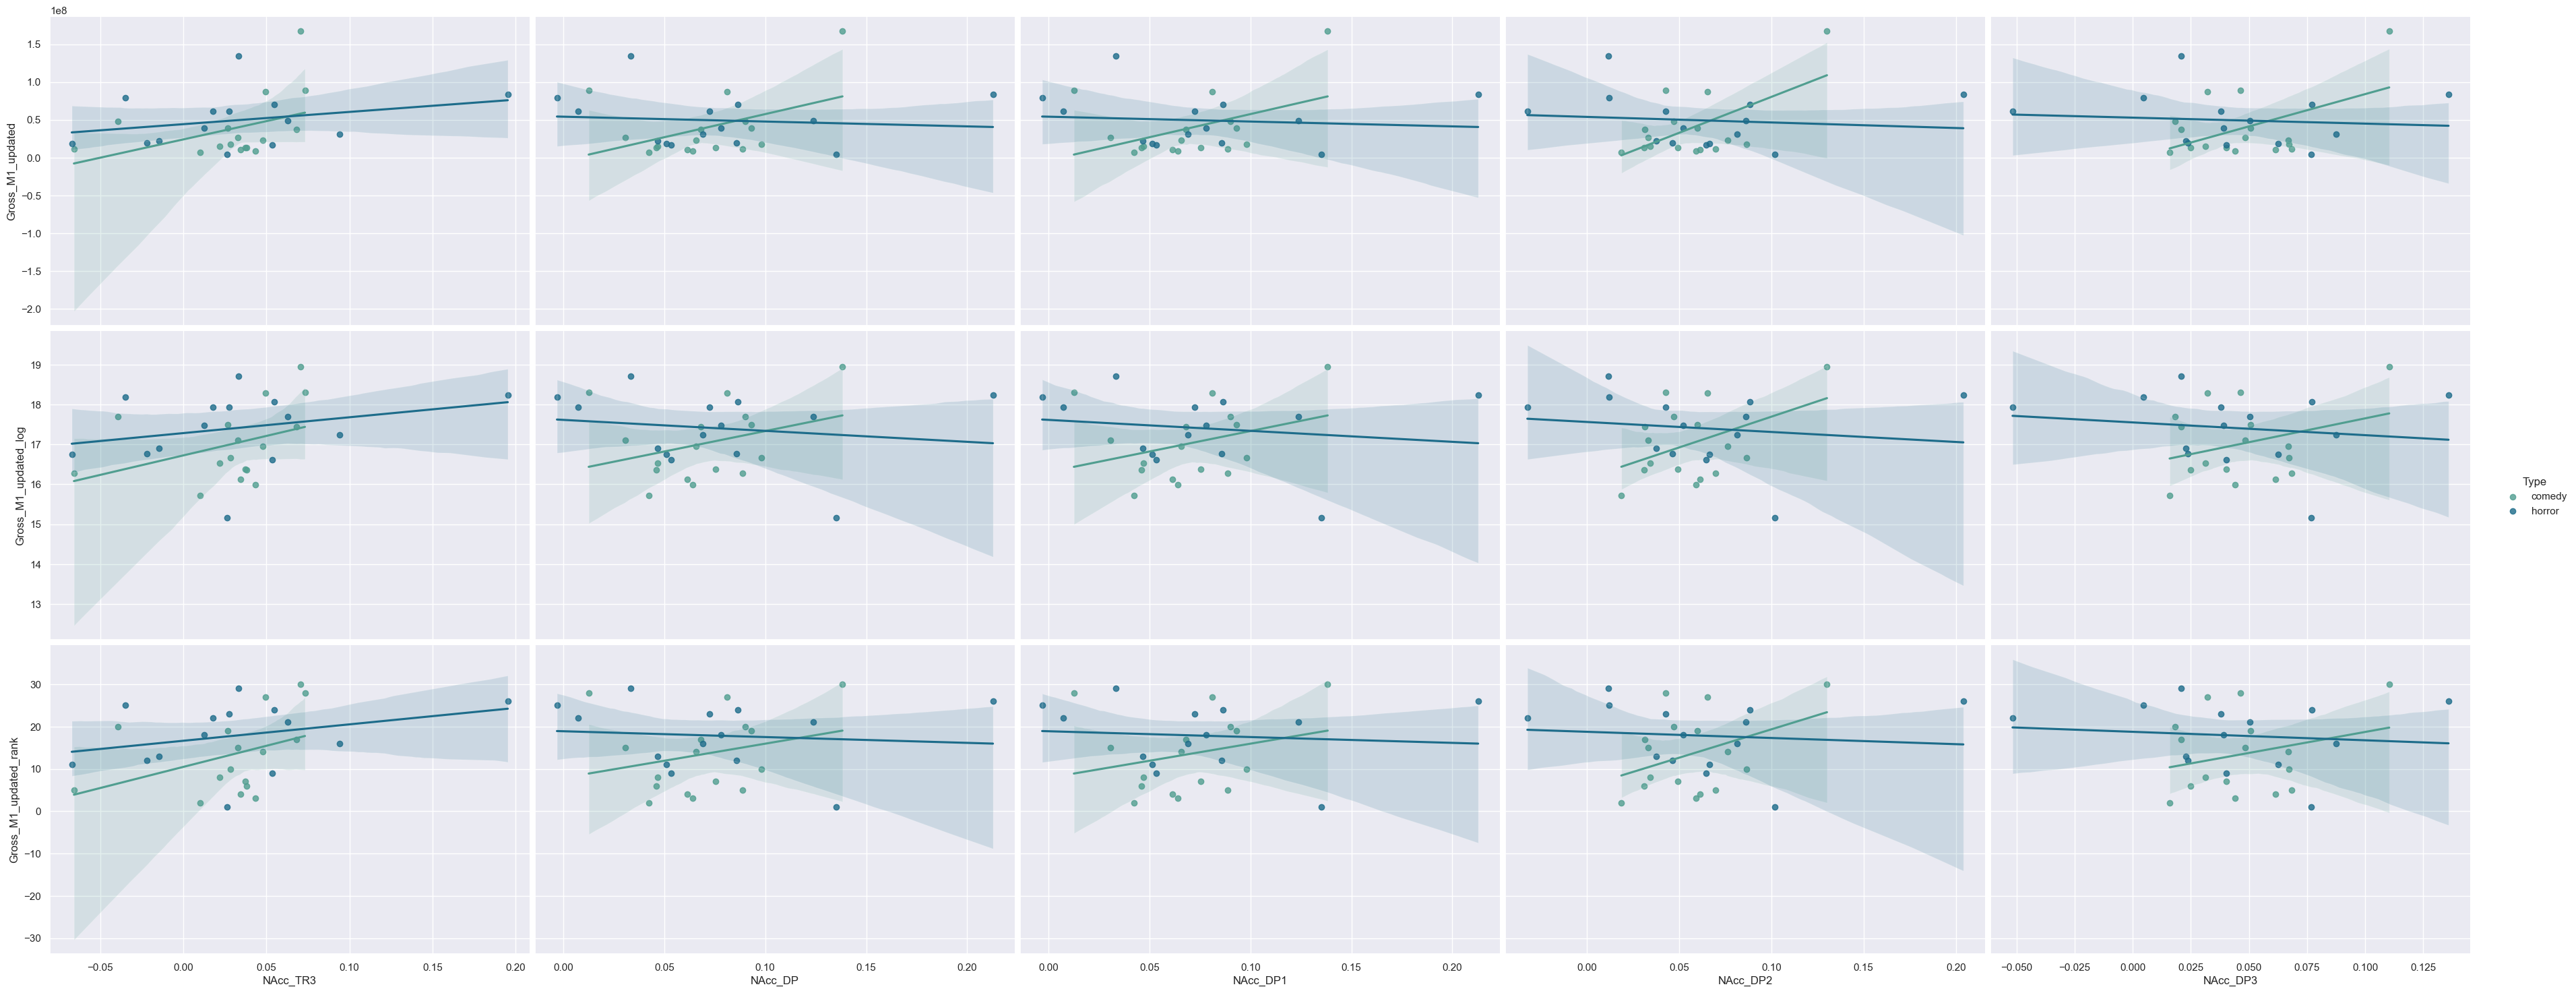

In [813]:
sns.pairplot(
      aggregate_combined_df,
      kind="reg",
      x_vars=["NAcc_TR3", "NAcc_DP","NAcc_DP1", "NAcc_DP2", "NAcc_DP3"],
      y_vars=["Gross_M1_updated", "Gross_M1_updated_log", "Gross_M1_updated_rank"],
      palette="crest",
      hue="Type",
      height=5,
      aspect=1.5)

<Axes: >

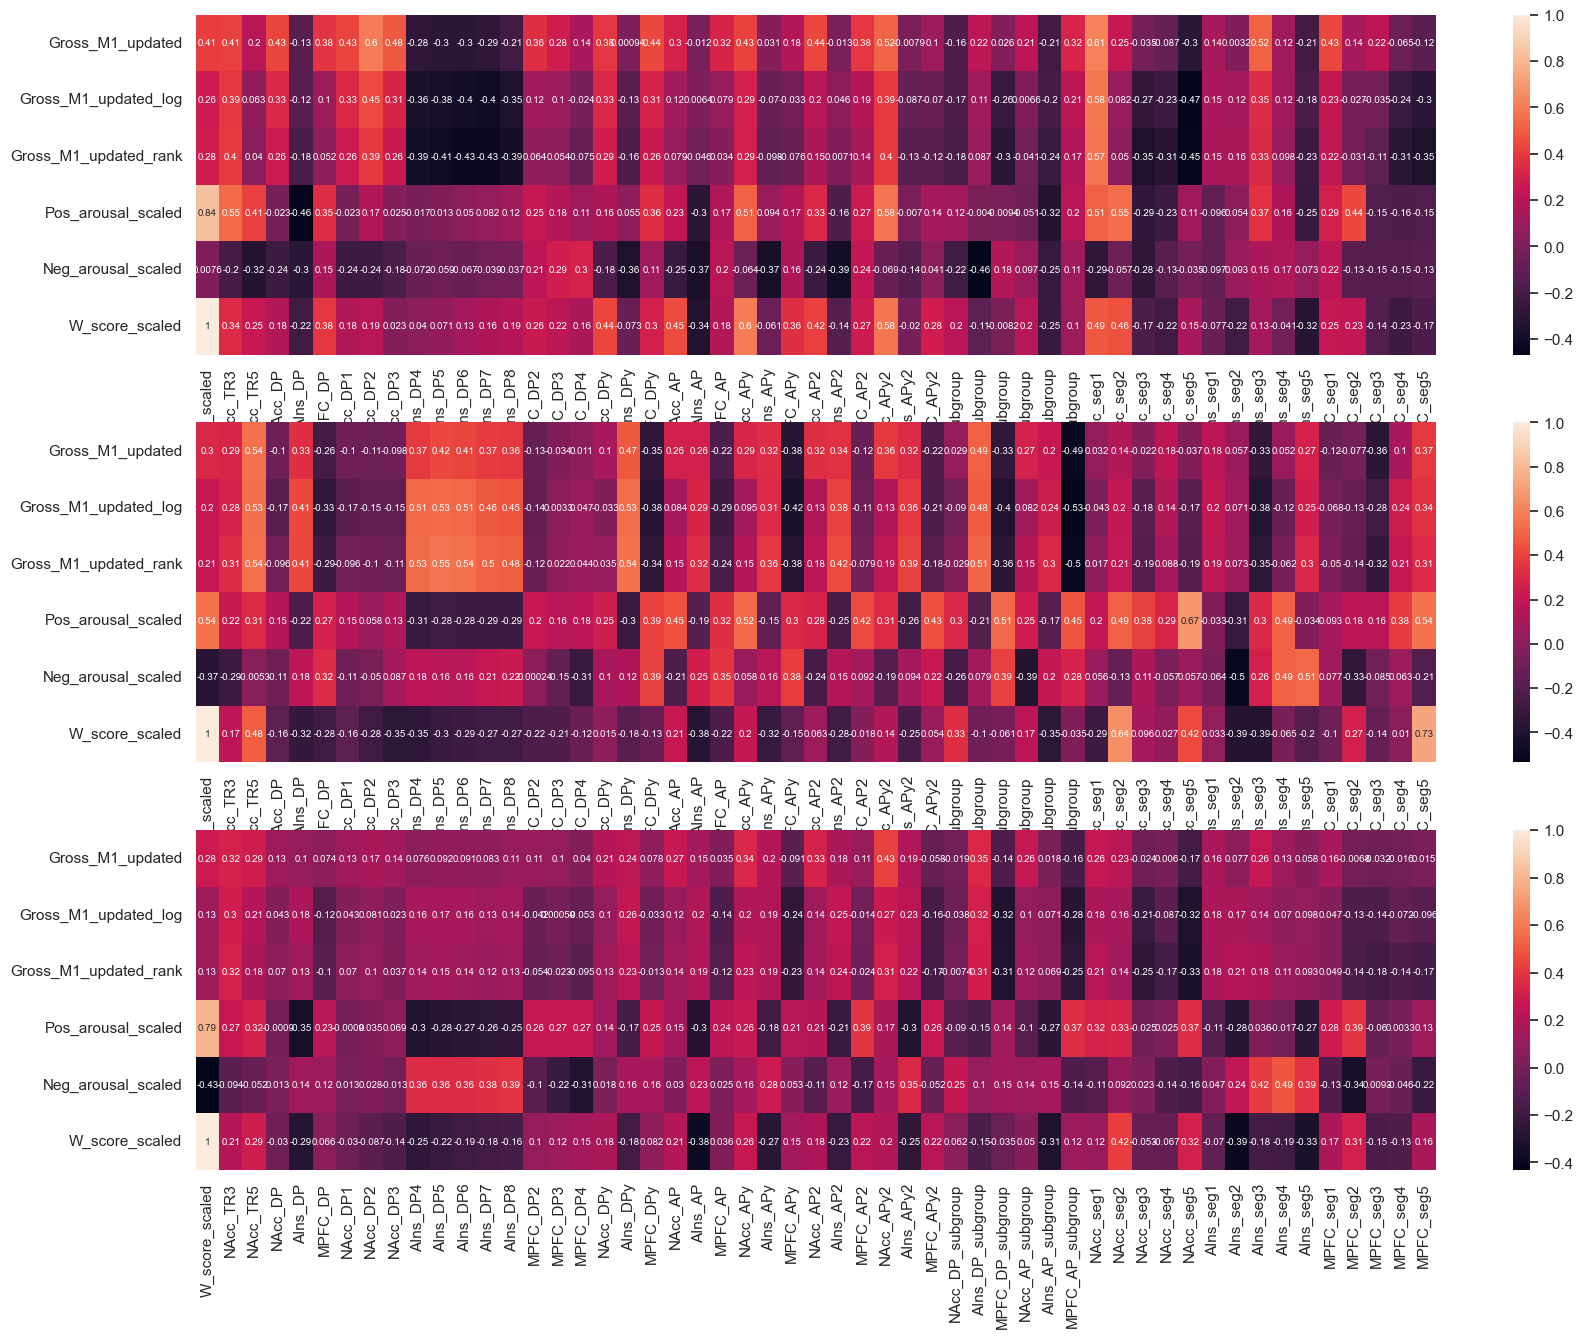

In [814]:


relevant_neuro_cols = ["Gross_M1_updated", "Gross_M1_updated_log", "Gross_M1_updated_rank", 
                        #"DG_WK1", "DG_WK2", "DG_WK3","Gross_US_M1", "Gross_US_M1_rank", #"Gross_US_M1_log" ,
                       #"Gross_Total_US", #"GrossOverTheaters_M1", # These two were calculated with (cummulative gross)/(cummulative theaters)
                        #"GrossW1", "GrossW2", "GrossW3", "GrossM1", 
                        #"GrossTheatersM1", #"GT_AVG_W2", "GT_AVG_W3", "GT_AVG_M1",
                        #"GT_AVG_Total", "GT_AVG_Total_log", "GT_Total", 
                        "Pos_arousal_scaled", "Neg_arousal_scaled", "W_score_scaled", #"IMDb_rating",
                        #"GrossTheatersW1", "GrossTheatersW2", "GrossTheatersW3", 
                         #'NAcc_onset', 'AIns_onset', 'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
                         #'NAcc_offset', 'AIns_offset', 'MPFC_offset',
                         #'NAcc_whole', 'AIns_whole', 'MPFC_whole', 
                         #'NAcc_ISC', 'AIns_ISC', 'MPFC_ISC',
                        "NAcc_TR3", "NAcc_TR5", #"NAcc_TR5", "NAcc_TR6",
                         #"NAcc_TR7", "NAcc_TR8", "NAcc_TR9", "NAcc_TR10", "NAcc_TR11", "NAcc_TR12", "NAcc_TR13", 
                         #'NAcc_ind_peaks_pos', 'AIns_ind_peaks_pos', 'MPFC_ind_peaks_pos',
                         #'NAcc_ind_peaks_neg', 'AIns_ind_peaks_neg', 'MPFC_ind_peaks_neg', 
                         #'NAcc_trailer_peak_pos', 'AIns_trailer_peak_pos', 'MPFC_trailer_peak_pos', 
                         #"NAcc_trailer_peak_pos_yes", "AIns_trailer_peak_pos_yes", "MPFC_trailer_peak_pos_yes",
                         #"NAcc_trailer_peak_neg", "AIns_trailer_peak_neg", "MPFC_trailer_peak_neg", 

                        "NAcc_DP", "AIns_DP", "MPFC_DP",
                        "NAcc_DP1", "NAcc_DP2", "NAcc_DP3",
                        "AIns_DP4", "AIns_DP5", "AIns_DP6", "AIns_DP7", "AIns_DP8", 
                        "MPFC_DP2", "MPFC_DP3", "MPFC_DP4",
                        "NAcc_DPy", "AIns_DPy", "MPFC_DPy",
                        #"NAcc_DS", "AIns_DS", "MPFC_DS",
                        #"NAcc_DSy", "AIns_DSy", "MPFC_DSy",
                        "NAcc_AP", "AIns_AP", "MPFC_AP",
                        # AIns_AP4,AIns_AP5,AIns_AP6,AIns_AP7,AIns_AP8,
                        "NAcc_APy", "AIns_APy", "MPFC_APy",
                        "NAcc_AP2", "AIns_AP2", "MPFC_AP2", 
                        "NAcc_APy2", "AIns_APy2", "MPFC_APy2",

                        "NAcc_DP_subgroup", "AIns_DP_subgroup", "MPFC_DP_subgroup",
                        "NAcc_AP_subgroup", "AIns_AP_subgroup", "MPFC_AP_subgroup",

                         #'AIns_avg_peak_pos4', 'AIns_avg_peak_pos5', 'AIns_avg_peak_pos6', 'AIns_avg_peak_pos7', 'AIns_avg_peak_pos8',
                         #'MPFC_dem_peak_pos2', 'MPFC_dem_peak_pos3', 'MPFC_dem_peak_pos4'
                         "NAcc_seg1", "NAcc_seg2", "NAcc_seg3", "NAcc_seg4", "NAcc_seg5",
                         "AIns_seg1", "AIns_seg2", "AIns_seg3", "AIns_seg4", "AIns_seg5",
                         "MPFC_seg1", "MPFC_seg2", "MPFC_seg3", "MPFC_seg4", "MPFC_seg5"
                         ]
                         
aggregate_comedy_filtered_df = aggregate_combined_comedy_df[relevant_neuro_cols]
aggregate_comedy_filtered_df = aggregate_comedy_filtered_df.dropna()
aggregate_comedy_filtered_df = aggregate_comedy_filtered_df.corr()

aggregate_horror_filtered_df = aggregate_combined_horror_df[relevant_neuro_cols]
aggregate_horror_filtered_df = aggregate_horror_filtered_df.dropna()
aggregate_horror_filtered_df = aggregate_horror_filtered_df.corr()

aggregate_combined_filtered_df = aggregate_combined_df[relevant_neuro_cols]
aggregate_combined_filtered_df = aggregate_combined_filtered_df.dropna()
aggregate_combined_filtered_df = aggregate_combined_filtered_df.corr()

fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex=False) 

sns.heatmap(aggregate_comedy_filtered_df.iloc[0:6, 5:], ax=axs[0], annot=True, annot_kws={'size': 7})
sns.heatmap(aggregate_horror_filtered_df.iloc[0:6, 5:], ax=axs[1], annot=True, annot_kws={'size': 7})
sns.heatmap(aggregate_combined_filtered_df.iloc[0:6, 5:], ax=axs[2], annot=True, annot_kws={'size': 7})

<Axes: >

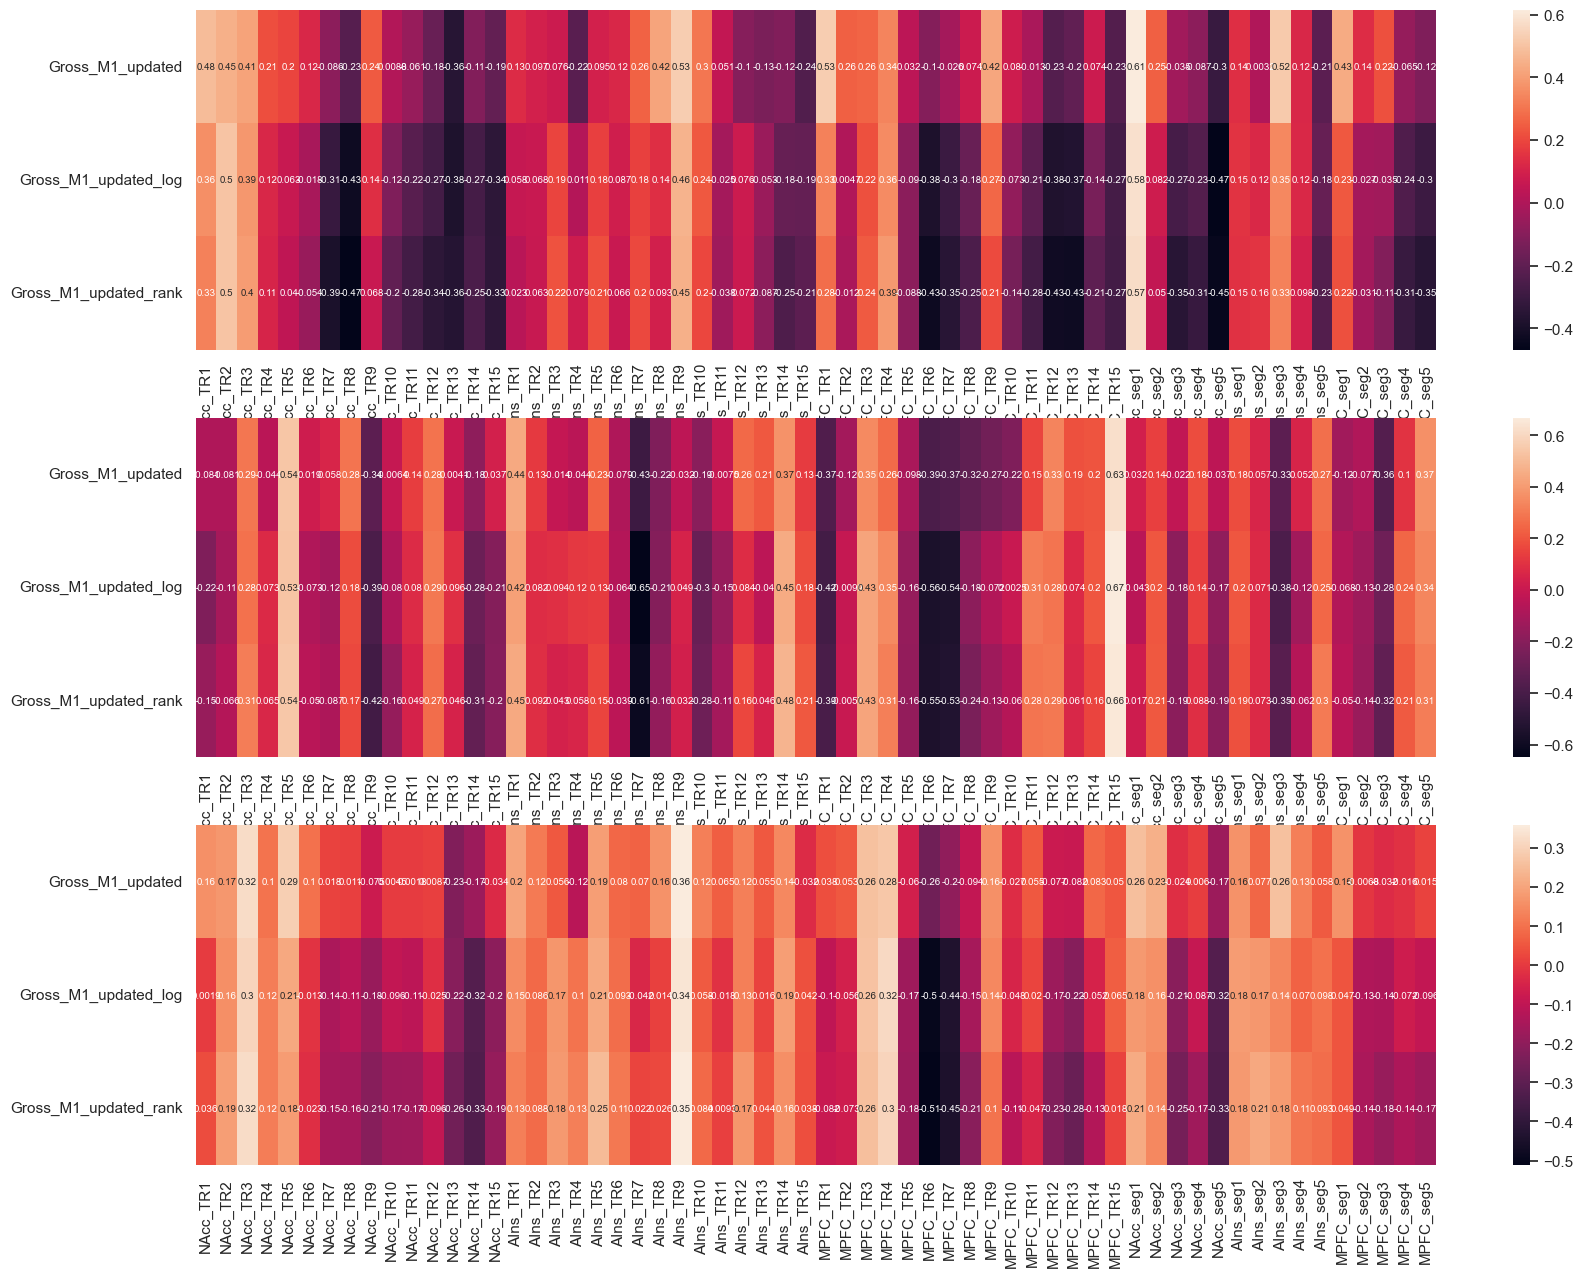

In [815]:


relevant_neuro_cols = ["Gross_M1_updated", "Gross_M1_updated_log", "Gross_M1_updated_rank", 
                        
                        "NAcc_TR1", "NAcc_TR2", "NAcc_TR3", "NAcc_TR4", "NAcc_TR5", "NAcc_TR6", "NAcc_TR7", "NAcc_TR8", "NAcc_TR9", "NAcc_TR10", "NAcc_TR11", "NAcc_TR12", "NAcc_TR13", "NAcc_TR14", "NAcc_TR15",
                        "AIns_TR1", "AIns_TR2", "AIns_TR3", "AIns_TR4", "AIns_TR5", "AIns_TR6", "AIns_TR7", "AIns_TR8", "AIns_TR9", "AIns_TR10", "AIns_TR11", "AIns_TR12", "AIns_TR13", "AIns_TR14", "AIns_TR15",
                        "MPFC_TR1", "MPFC_TR2", "MPFC_TR3", "MPFC_TR4", "MPFC_TR5", "MPFC_TR6", "MPFC_TR7", "MPFC_TR8", "MPFC_TR9", "MPFC_TR10", "MPFC_TR11", "MPFC_TR12", "MPFC_TR13", "MPFC_TR14", "MPFC_TR15",

                         "NAcc_seg1", "NAcc_seg2", "NAcc_seg3", "NAcc_seg4", "NAcc_seg5",
                         "AIns_seg1", "AIns_seg2", "AIns_seg3", "AIns_seg4", "AIns_seg5",
                         "MPFC_seg1", "MPFC_seg2", "MPFC_seg3", "MPFC_seg4", "MPFC_seg5"
                         ]
                         

aggregate_comedy_filtered_df = aggregate_combined_comedy_df[relevant_neuro_cols]
aggregate_comedy_filtered_df = aggregate_comedy_filtered_df.dropna()
aggregate_comedy_filtered_df = aggregate_comedy_filtered_df.corr()

aggregate_horror_filtered_df = aggregate_combined_horror_df[relevant_neuro_cols]
aggregate_horror_filtered_df = aggregate_horror_filtered_df.dropna()
aggregate_horror_filtered_df = aggregate_horror_filtered_df.corr()

aggregate_combined_filtered_df = aggregate_combined_df[relevant_neuro_cols]
aggregate_combined_filtered_df = aggregate_combined_filtered_df.dropna()
aggregate_combined_filtered_df = aggregate_combined_filtered_df.corr()

fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex=False) 

sns.heatmap(aggregate_comedy_filtered_df.iloc[0:3, 3:], ax=axs[0], annot=True, annot_kws={'size': 7})
sns.heatmap(aggregate_horror_filtered_df.iloc[0:3, 3:], ax=axs[1], annot=True, annot_kws={'size': 7})
sns.heatmap(aggregate_combined_filtered_df.iloc[0:3, 3:], ax=axs[2], annot=True, annot_kws={'size': 7})

<Axes: >

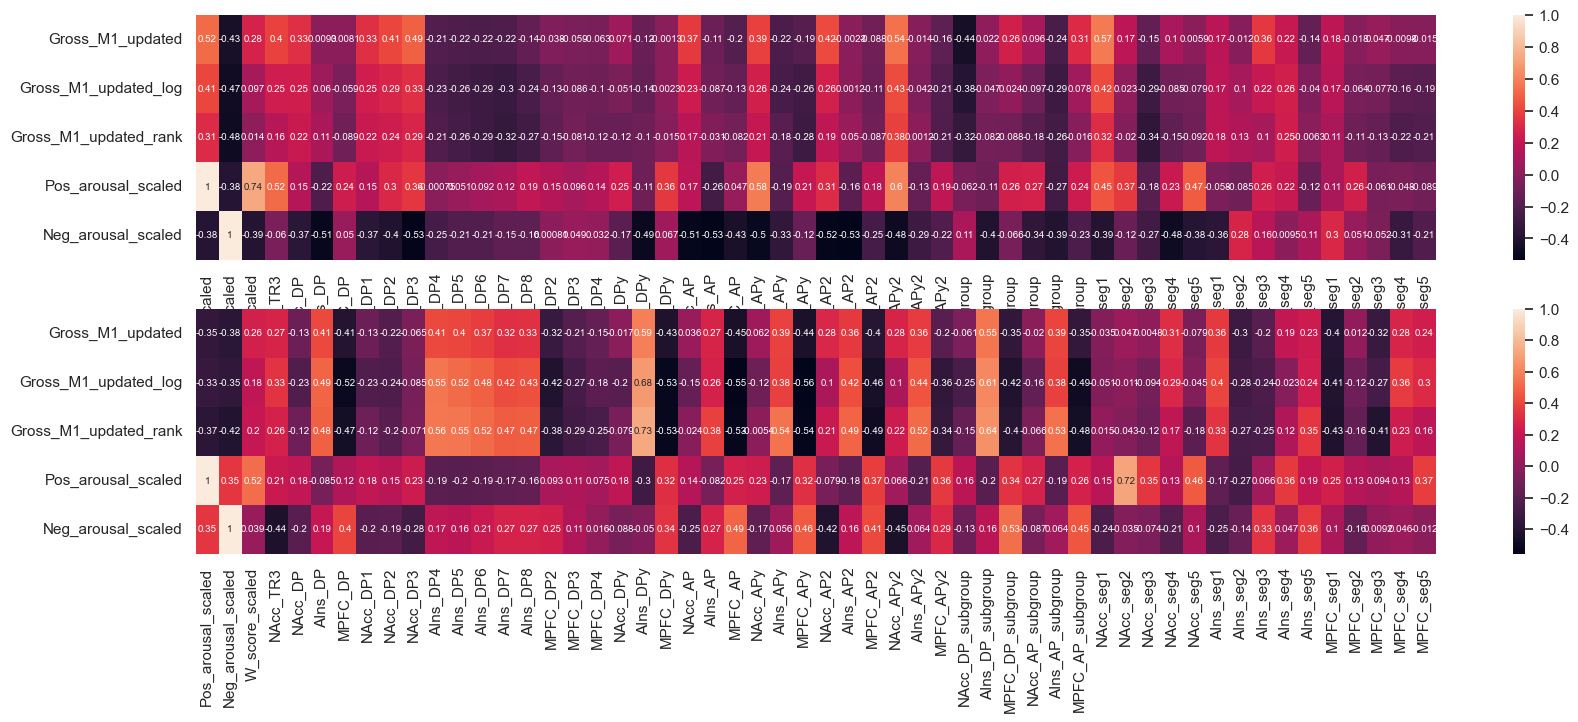

In [816]:
# LC_aggregate_combined_df["GrossOverTheaters_M1"] = LC_aggregate_combined_df["Gross_US_M1"] / LC_aggregate_combined_df["Theaters_US_M1"]
# LH_aggregate_combined_df["GrossOverTheaters_M1"] = LH_aggregate_combined_df["Gross_US_M1"] / LH_aggregate_combined_df["Theaters_US_M1"]

# LC_aggregate_combined_df["GrossTheatersM1"] = (LC_aggregate_combined_df["DG_WK1"] / LC_aggregate_combined_df["NumT_WK1"]) + (LC_aggregate_combined_df["DG_WK2"] / LC_aggregate_combined_df["NumT_WK2"]) + (LC_aggregate_combined_df["DG_WK3"] / LC_aggregate_combined_df["NumT_WK3"]) + (LC_aggregate_combined_df["DG_WK4"] / LC_aggregate_combined_df["NumT_WK4"])
# LH_aggregate_combined_df["GrossTheatersM1"] = (LH_aggregate_combined_df["DG_WK1"] / LH_aggregate_combined_df["NumT_WK1"]) + (LH_aggregate_combined_df["DG_WK2"] / LH_aggregate_combined_df["NumT_WK2"]) + (LH_aggregate_combined_df["DG_WK3"] / LH_aggregate_combined_df["NumT_WK3"]) + (LH_aggregate_combined_df["DG_WK4"] / LH_aggregate_combined_df["NumT_WK4"])

# LC_aggregate_combined_df["GrossM1"] = (LC_aggregate_combined_df["DG_WK1"]) + (LC_aggregate_combined_df["DG_WK2"]) + (LC_aggregate_combined_df["DG_WK3"]) + (LC_aggregate_combined_df["DG_WK4"])
# LH_aggregate_combined_df["GrossM1"] = (LH_aggregate_combined_df["DG_WK1"]) + (LH_aggregate_combined_df["DG_WK2"]) + (LH_aggregate_combined_df["DG_WK3"]) + (LH_aggregate_combined_df["DG_WK4"])


# #LH_aggregate_combined_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_LH.csv", index=True)

# LC_aggregate_combined_df["Gross_US_M1_rank"] = LC_aggregate_combined_df["Gross_US_M1"].rank()
# LH_aggregate_combined_df["Gross_US_M1_rank"] = LH_aggregate_combined_df["Gross_US_M1"].rank()

# LC_aggregate_combined_df["Gross_US_M1_log"] = np.log(LC_aggregate_combined_df["Gross_US_M1"])
# LH_aggregate_combined_df["Gross_US_M1_log"] = np.log(LH_aggregate_combined_df["Gross_US_M1"])



relevant_neuro_cols = [#"Gross_US_M1", "GrossOverTheaters_M1", "GrossM1", 
                        #"GrossTheatersM1", "Gross_US_M1_rank", "Gross_US_M1_log",
                        "Gross_M1_updated", "Gross_M1_updated_log", "Gross_M1_updated_rank", 
                        #"IMDb_rating", 
                        "Pos_arousal_scaled", "Neg_arousal_scaled", "W_score_scaled",
                        #'NAcc_onset', 'AIns_onset', 'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
                         #'NAcc_offset', 'AIns_offset', 'MPFC_offset',
                         #'NAcc_whole', 'AIns_whole', 'MPFC_whole', 
                         #'NAcc_ISC', 'AIns_ISC', 'MPFC_ISC', 
                         "NAcc_TR3",
                         #'NAcc_ind_peaks_pos', 'AIns_ind_peaks_pos', 'MPFC_ind_peaks_pos',
                         #'NAcc_ind_peaks_neg', 'AIns_ind_peaks_neg', 'MPFC_ind_peaks_neg', 
                         #'NAcc_trailer_peak_pos', 'AIns_trailer_peak_pos', 'MPFC_trailer_peak_pos', 
                         #"NAcc_trailer_peak_pos_yes", "AIns_trailer_peak_pos_yes", "MPFC_trailer_peak_pos_yes",

                        "NAcc_DP", "AIns_DP", "MPFC_DP",
                        "NAcc_DP1", "NAcc_DP2", "NAcc_DP3",
                        "AIns_DP4", "AIns_DP5", "AIns_DP6", "AIns_DP7", "AIns_DP8", 
                        "MPFC_DP2", "MPFC_DP3", "MPFC_DP4",
                        "NAcc_DPy", "AIns_DPy", "MPFC_DPy",
                        #"NAcc_DS", "AIns_DS", "MPFC_DS",
                        #"NAcc_DSy", "AIns_DSy", "MPFC_DSy",
                        "NAcc_AP", "AIns_AP", "MPFC_AP",
                        # AIns_AP4,AIns_AP5,AIns_AP6,AIns_AP7,AIns_AP8,
                        "NAcc_APy", "AIns_APy", "MPFC_APy",
                        "NAcc_AP2", "AIns_AP2", "MPFC_AP2", 
                        "NAcc_APy2", "AIns_APy2", "MPFC_APy2",

                        "NAcc_DP_subgroup", "AIns_DP_subgroup", "MPFC_DP_subgroup",
                        "NAcc_AP_subgroup", "AIns_AP_subgroup", "MPFC_AP_subgroup",

                         #'AIns_dem_peak_pos8', 
                         #'AIns_avg_peak_pos4', 'AIns_avg_peak_pos5', 'AIns_avg_peak_pos6', 'AIns_avg_peak_pos7', 'AIns_avg_peak_pos8',
                         #'MPFC_dem_peak_pos2', 'MPFC_dem_peak_pos3', 'MPFC_dem_peak_pos4'
                         "NAcc_seg1", "NAcc_seg2", "NAcc_seg3", "NAcc_seg4", "NAcc_seg5",
                         "AIns_seg1", "AIns_seg2", "AIns_seg3", "AIns_seg4", "AIns_seg5",
                         "MPFC_seg1", "MPFC_seg2", "MPFC_seg3", "MPFC_seg4", "MPFC_seg5"]

LC_aggregate_filtered_df = LC_aggregate_combined_df[relevant_neuro_cols]
LC_aggregate_filtered_df = LC_aggregate_filtered_df.dropna()
LC_aggregate_filtered_df = LC_aggregate_filtered_df.corr()

LH_aggregate_filtered_df = LH_aggregate_combined_df[relevant_neuro_cols]
LH_aggregate_filtered_df = LH_aggregate_filtered_df.dropna()
LH_aggregate_filtered_df = LH_aggregate_filtered_df.corr()

fig, axs = plt.subplots(2, 1, figsize=(20, 7), sharex=False)

sns.heatmap(LC_aggregate_filtered_df.iloc[0:5, 3:], ax=axs[0], annot=True, annot_kws={'size': 7})
sns.heatmap(LH_aggregate_filtered_df.iloc[0:5, 3:], ax=axs[1], annot=True, annot_kws={'size': 7})


In [817]:
"""
# Filter data and append aggregate metrics.
Aggregate_comedy_df <- filter(Individual_comedy_df,
                       ("NAcc_onset_z" < filtering_threshold) | ("NAcc_onset_z" > -filtering_threshold)  |
                       ("AIns_onset_z" < filtering_threshold) | ("AIns_onset_z" > -filtering_threshold)  |
                       ("MPFC_onset_z" < filtering_threshold) | ("MPFC_onset_z" > -filtering_threshold)  |
                       ("NAcc_middle_z" < filtering_threshold) | ("NAcc_middle_z" > -filtering_threshold) |
                       ("AIns_middle_z" < filtering_threshold) | ("AIns_middle_z" > -filtering_threshold) |
                       ("MPFC_middle_z" < filtering_threshold) | ("MPFC_middle_z" > -filtering_threshold) |
                       ("NAcc_offset_z" < filtering_threshold) | ("NAcc_offset_z" > -filtering_threshold) |
                       ("AIns_offset_z" < filtering_threshold) | ("AIns_offset_z" > -filtering_threshold) |
                       ("MPFC_offset_z" < filtering_threshold) | ("MPFC_offset_z" > -filtering_threshold) |
                       ("NAcc_ind_peaks_pos_z" < filtering_threshold) | ("NAcc_ind_peaks_pos_z" > -filtering_threshold) |
                       ("AIns_ind_peaks_pos_z" < filtering_threshold) | ("AIns_ind_peaks_pos_z" > -filtering_threshold) |
                       ("MPFC_ind_peaks_pos_z" < filtering_threshold) | ("MPFC_ind_peaks_pos_z" > -filtering_threshold) |
                       ("NAcc_dem_peak_pos_z" < filtering_threshold) | ("NAcc_dem_peak_pos_z" > -filtering_threshold) |
                       ("AIns_dem_peak_pos_z" < filtering_threshold) | ("AIns_dem_peak_pos_z" > -filtering_threshold) |
                       ("MPFC_dem_peak_pos_z" < filtering_threshold) | ("MPFC_dem_peak_pos_z" > -filtering_threshold) |
                       ("NAcc_dem_peak_pos_yes_z" < filtering_threshold) | ("NAcc_dem_peak_pos_yes_z" > -filtering_threshold) |
                       ("AIns_dem_peak_pos_yes_z" < filtering_threshold) | ("AIns_dem_peak_pos_yes_z" > -filtering_threshold) |
                       ("MPFC_dem_peak_pos_yes_z" < filtering_threshold) | ("MPFC_dem_peak_pos_yes_z" > -filtering_threshold) |
                       ("NAcc_avg_peak_pos_z" < filtering_threshold) | ("NAcc_avg_peak_pos_z" > -filtering_threshold) |
                       ("AIns_avg_peak_pos_z" < filtering_threshold) | ("AIns_avg_peak_pos_z" > -filtering_threshold) |
                       ("MPFC_avg_peak_pos_z" < filtering_threshold) | ("MPFC_avg_peak_pos_z" > -filtering_threshold) |
                       ("NAcc_avg_peak_yes_pos" < filtering_threshold) | ("NAcc_avg_peak_yes_pos" > -filtering_threshold) |
                       ("AIns_avg_peak_yes_pos" < filtering_threshold) | ("AIns_avg_peak_yes_pos" > -filtering_threshold) |
                       ("MPFC_avg_peak_yes_pos" < filtering_threshold) | ("MPFC_avg_peak_yes_pos" > -filtering_threshold)) %>% 
                       group_by(Trailer) %>%
                       summarise_if(is.numeric, mean, na.rm = TRUE) #%>%
        
Aggregate_comedy_df <- merge(x = Aggregate_comedy_df, y = Aggregate_metrics_comedy_df, by = "Trailer")


relevant_cols = ["Trailer", 'Pos_arousal_scaled', 'Neg_arousal_scaled', 'W_score_scaled',
         'NAcc_onset', 'AIns_onset', 'MPFC_onset', 'NAcc_middle', 'AIns_middle', 'MPFC_middle',
         'NAcc_offset', 'AIns_offset', 'MPFC_offset', "NAcc_ISC", "AIns_ISC", "MPFC_ISC",
         "NAcc_LC_ISC", "AIns_LC_ISC", "MPFC_LC_ISC", "NAcc_DC_ISC", "AIns_DC_ISC", "MPFC_DC_ISC",
         "NAcc_dem_peak_pos", "AIns_dem_peak_pos", "MPFC_dem_peak_pos",
         #"NAcc_dem_peak_neg", "AIns_dem_peak_neg", "MPFC_dem_peak_neg", 
         "NAcc_dem_peak_pos_yes" , "AIns_dem_peak_pos_yes", "MPFC_dem_peak_pos_yes", 
         "NAcc_dem_peak_pos_no" , "AIns_dem_peak_pos_no", "MPFC_dem_peak_pos_no", 
         'AIns_dem_peak_pos4', 'AIns_dem_peak_pos5', 'AIns_dem_peak_pos6', 'AIns_dem_peak_pos7',
         'AIns_dem_peak_pos8']

NAcc_TRs_keys = ['NAcc_TR1', 'NAcc_TR2', 'NAcc_TR3', 'NAcc_TR4', 'NAcc_TR5', 
                'NAcc_TR6', 'NAcc_TR7', 'NAcc_TR8', 'NAcc_TR9', 'NAcc_TR10',
                'NAcc_TR11', 'NAcc_TR12', 'NAcc_TR13', 'NAcc_TR14', 'NAcc_TR15']

AIns_TRs_keys = ['AIns_TR1', 'AIns_TR2', 'AIns_TR3', 'AIns_TR4', 'AIns_TR5',
                'AIns_TR6', 'AIns_TR7', 'AIns_TR8', 'AIns_TR9', 'AIns_TR10',
                'AIns_TR11', 'AIns_TR12', 'AIns_TR13', 'AIns_TR14', 'AIns_TR15']

MPFC_TRs_keys = ['MPFC_TR1', 'MPFC_TR2', 'MPFC_TR3', 'MPFC_TR4', 'MPFC_TR5',
                'MPFC_TR6', 'MPFC_TR7', 'MPFC_TR8', 'MPFC_TR9', 'MPFC_TR10',
                'MPFC_TR11', 'MPFC_TR12', 'MPFC_TR13', 'MPFC_TR14', 'MPFC_TR15']

# LC_df = LC_df[relevant_cols + NAcc_TRs_keys + AIns_TRs_keys + MPFC_TRs_keys]
# Like_comedy_aggregate_df = LC_df.groupby("Trailer", as_index=False, dropna=False).mean()
# Like_comedy_aggregate_df.reset_index(inplace=True)
# Like_comedy_aggregate_df["Type"] = "comedy"
"""

'\n# Filter data and append aggregate metrics.\nAggregate_comedy_df <- filter(Individual_comedy_df,\n                       ("NAcc_onset_z" < filtering_threshold) | ("NAcc_onset_z" > -filtering_threshold)  |\n                       ("AIns_onset_z" < filtering_threshold) | ("AIns_onset_z" > -filtering_threshold)  |\n                       ("MPFC_onset_z" < filtering_threshold) | ("MPFC_onset_z" > -filtering_threshold)  |\n                       ("NAcc_middle_z" < filtering_threshold) | ("NAcc_middle_z" > -filtering_threshold) |\n                       ("AIns_middle_z" < filtering_threshold) | ("AIns_middle_z" > -filtering_threshold) |\n                       ("MPFC_middle_z" < filtering_threshold) | ("MPFC_middle_z" > -filtering_threshold) |\n                       ("NAcc_offset_z" < filtering_threshold) | ("NAcc_offset_z" > -filtering_threshold) |\n                       ("AIns_offset_z" < filtering_threshold) | ("AIns_offset_z" > -filtering_threshold) |\n                       ("MPFC_